In [ ]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from scipy.fftpack import fft, ifft, fftfreq,rfft,irfft
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, \
    recall_score, \
    accuracy_score, f1_score

# Lets import some modules for basic computation
import time


import pickle

# Some modules for plotting and visualizing
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# And some Machine Learning modules from scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from scipy import signal


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f_AD_HC = pd.read_csv("/content/drive/MyDrive/Dati Fourier/ADvsHCFourier.csv", sep=",")

f_CASE_HC = pd.read_csv("/content/drive/MyDrive/Dati Fourier/CASEVsHCFourier.csv", sep=",")
f_MCI_AD = pd.read_csv("/content/drive/MyDrive/Dati Fourier/MCIvsADFourier.csv", sep=",")
f_MCI_HC = pd.read_csv("/content/drive/MyDrive/Dati Fourier/MCIvsHCFourier.csv", sep=",")


In [ ]:
f_AD_HC

experiment    Four_1    Four_2  ...  Four_303  Four_304     class
0    Patient_1_Control   -30.094  -157.137  ...   -18.036    -7.389   Control
1   Patient_10_Control   -62.918   -47.004  ...    -4.525   -12.120   Control
2   Patient_11_Control   -23.621   -13.152  ...    20.633    33.470   Control
3   Patient_12_Control  -348.344   -18.930  ...     4.022     8.098   Control
4   Patient_13_Control   -31.156  -193.656  ...   -10.238   -12.087   Control
..                 ...       ...       ...  ...       ...       ...       ...
67  Patient_19_Control  -183.449  -348.000  ...    -5.180    -0.957   Control
68  Patient_20_Control  1020.508 -3868.750  ...   -17.677    -9.583   Control
69  Patient_21_Control  -702.875   175.895  ...    12.698     9.992   Control
70  Patient_22_Control   800.555    74.148  ...     7.612    -8.260   Control
71  Patient_23_Control    -9.859   -30.340  ...    -1.173     0.490   Control

[72 rows x 306 columns]

In [ ]:
df_AD=f_AD_HC[f_AD_HC['class']==' AD']
df_HC=f_AD_HC[f_AD_HC['class']==' Control']
df_MCI=f_MCI_AD[f_MCI_AD['class']==' MCI']


## prova 1 segnale paziente come media dei segnali singoli elettrodi, e segnale totale classe come media dei segnali

In [ ]:
pazientiAD=df_AD.loc[:, "Four_1":"Four_304"]
pazientiMCI=df_MCI.loc[:, "Four_1":"Four_304"]
pazientiHC=df_HC.loc[:, "Four_1":"Four_304"]

In [ ]:
pazienteAD=pazientiAD.iloc[0,]
pazienteMCI=pazientiMCI.iloc[0,]
pazienteHC=pazientiHC.iloc[0,]

In [ ]:
n=len(pazientiHC)
n

23

In [ ]:
matriceAD = np.zeros((len(pazientiAD),16))
matriceMCI = np.zeros((len(pazientiMCI),16))
matriceHC = np.zeros((len(pazientiHC),16))


In [ ]:
segnalemedioAD=np.arange(0,16,1.0)
segnalemedioMCI=np.arange(0,16,1.0)
segnalemedioHC=np.arange(0,16,1.0)

In [ ]:
def media_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")
    if ntest==2:
       dati=pazientiMCI   
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
    
    n=len(dati)
    if n==304:
       n=1 

    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()
        e=19
        i=0
        f=16
        indice=0
        matricesegnale = np.zeros((19,16))
        for elettrodo in range(e):
            vettore=np.array(pvettore[i:f])
            #print("indici", i,f,elettrodo,len(vettore)) 
            #print(vettore)  
            matricesegnale[elettrodo,]=vettore
            i=f
            f=f+16
            indice=indice+1
    
        signmedio=np.arange(0,16,1.0)
        
        for k in range(len(signmedio)):
              signmedio[k]=np.mean(matricesegnale[:,k])    

        if ntest==1:
               matriceAD[riga,]=signmedio
        if ntest==2:
               matriceMCI[riga,]=signmedio
        if ntest==3:
               matriceHC[riga,]=signmedio

    
    if ntest==1:
       for z in range(len(segnalemedioAD)):
             segnalemedioAD[z]=np.mean(matriceAD[:,z])    
    if ntest==2:
       for z in range(len(segnalemedioMCI)):
             segnalemedioMCI[z]=np.mean(matriceMCI[:,z])       
    if ntest==3:
       for z in range(len(segnalemedioHC)):
             segnalemedioHC[z]=np.mean(matriceHC[:,z])        
   

In [ ]:
matriceADtot = np.zeros((len(pazientiAD)*19,16))
matriceMCItot = np.zeros((len(pazientiMCI)*19,16))
matriceHCtot = np.zeros((len(pazientiHC)*19,16))

In [ ]:
def elab_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")
    if ntest==2:
       dati=pazientiMCI   
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
    
    n=len(dati)
    if n==304:
       n=1 

    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()
        e=19
        i=0
        f=16
        indice=0
        matricesegnale = np.zeros((19,16))
        for elettrodo in range(e):
            vettore=np.array(pvettore[i:f])
            #print("indici", i,f,elettrodo,len(vettore)) 
            #print(vettore)  
            matricesegnale[elettrodo,]=vettore
            i=f
            f=f+16
            indice=indice+1
    
        
        if ntest==1:
               for k in range(19):
                   matriceADtot[((riga*19)+k),]=matricesegnale[k]
        if ntest==2:
               for k in range(19):
                   matriceADtot[((riga*19)+k),]=matricesegnale[k]
               
        if ntest==3:
               for k in range(19):
                   matriceADtot[((riga*19)+k),]=matricesegnale[k]
              

    
        
   

In [ ]:
media_Fourier(1)


AD


In [ ]:
media_Fourier(2)

MCI


In [ ]:
media_Fourier(3)

HC


In [ ]:
segnalemedioAD,segnalemedioMCI,segnalemedioHC

(array([-16.55822234,  -0.13421697,  -1.26108056,   1.91110204,
          5.69780881,   0.88489151,   0.22754135,   0.3643072 ,
         -0.21499463,   0.75720408,   0.5991869 ,   1.36316004,
          2.44557895,   0.64204834,   1.69034157,   1.30857895]),
 array([ 11.18542105,  10.12737269,  25.7300697 ,   0.96691323,
          0.06551209,  -0.11961309,  -5.77233001,   3.43851209,
          2.86366145,   7.13874395,  -0.95074822, -15.05276814,
          1.83545661,   7.58314225,   2.40221337,   1.69973684]),
 array([  6.28523341,  25.97974142,  20.97004805,   7.96026087,
         14.59130435,  21.00577574,   5.77844394,  -4.00970481,
         13.96572082,  11.73233867,  11.20293364, -12.4819611 ,
         19.41878032, -10.62983524,   2.80478719,  21.49124027]))

In [ ]:
matriceAD[0,:]

array([ 3.02989474,  3.03373684, -0.43268421,  0.32005263,  5.45663158,
        0.96731579,  2.26231579,  0.89147368,  5.05994737,  5.43994737,
       11.02589474,  0.75621053,  3.18452632,  2.063     ,  3.46768421,
        7.72057895])

In [ ]:
ad1=pazienteAD.loc["Four_1":"Four_16"]
ad2=pazienteAD.loc["Four_17":"Four_32"]
ad3=pazienteAD.loc["Four_33":"Four_48"]
ad4=pazienteAD.loc["Four_49":"Four_64"]
ad5=pazienteAD.loc["Four_65":"Four_80"]
ad6=pazienteAD.loc["Four_81":"Four_96"]
ad7=pazienteAD.loc["Four_97":"Four_112"]
ad8=pazienteAD.loc["Four_113":"Four_128"]
ad9=pazienteAD.loc["Four_129":"Four_144"]
ad10=pazienteAD.loc["Four_145":"Four_160"]
ad11=pazienteAD.loc["Four_161":"Four_176"]
ad12=pazienteAD.loc["Four_177":"Four_192"]
ad13=pazienteAD.loc["Four_193":"Four_208"]
ad14=pazienteAD.loc["Four_209":"Four_224"]
ad15=pazienteAD.loc["Four_225":"Four_240"]
ad16=pazienteAD.loc["Four_241":"Four_256"]
ad17=pazienteAD.loc["Four_257":"Four_272"]
ad18=pazienteAD.loc["Four_273":"Four_288"]
ad19=pazienteAD.loc["Four_289":"Four_304"]

In [ ]:
ad1

Four_1     -186.840
Four_2    -1114.781
Four_3    -1657.664
Four_4     -284.555
Four_5     -327.762
Four_6     -296.820
Four_7     -192.312
Four_8     -362.617
Four_9     -311.352
Four_10     306.539
Four_11    -195.941
Four_12     119.059
Four_13    2128.125
Four_14    -227.094
Four_15     234.125
Four_16      12.855
Name: 5, dtype: float64

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



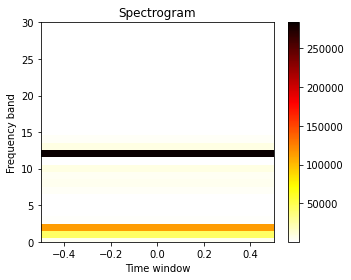

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad1)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

array([[  3928.98563984],
       [ 44387.75760547],
       [113497.95668453],
       [  2170.27482053],
       [   981.68836646],
       [   553.5558166 ],
       [   649.50052854],
       [  2870.81673632],
       [  5415.39525287],
       [  4165.40469558],
       [  8791.17582798],
       [   316.73254358],
       [283552.38549591],
       [  8516.99439536],
       [  3567.22973653],
       [  1038.02383709]])

In [ ]:
ad2

Four_17    -55.883
Four_18    -74.855
Four_19   -268.918
Four_20     17.043
Four_21     25.200
Four_22     40.300
Four_23      1.104
Four_24     25.406
Four_25     21.191
Four_26     21.182
Four_27     21.670
Four_28    -50.526
Four_29     34.788
Four_30     15.124
Four_31     23.561
Four_32     13.674
Name: 5, dtype: float64

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



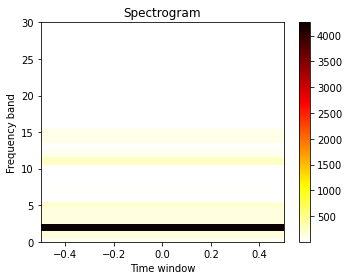

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad2)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
ad3

Four_33    38.507
Four_34    54.235
Four_35    36.360
Four_36    37.144
Four_37    42.482
Four_38    44.253
Four_39    -6.221
Four_40    -3.991
Four_41    -5.482
Four_42   -14.262
Four_43     0.059
Four_44    -5.055
Four_45     9.174
Four_46    -1.662
Four_47   -47.027
Four_48    -1.767
Name: 5, dtype: float64

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



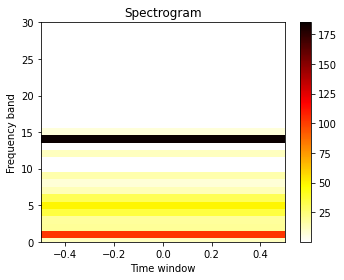

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad3)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
ad4

Four_49    -3.889
Four_50    -1.336
Four_51     5.737
Four_52   -12.033
Four_53     3.991
Four_54     5.061
Four_55     1.433
Four_56     2.373
Four_57    -0.587
Four_58    -2.443
Four_59    -2.505
Four_60   -19.551
Four_61    -1.765
Four_62     0.685
Four_63    -4.828
Four_64    -8.357
Name: 5, dtype: float64

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



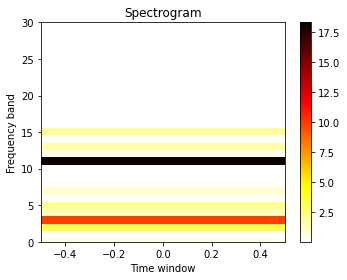

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad4)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
ad5

Four_65    -3.307
Four_66   -36.977
Four_67    -7.566
Four_68     6.573
Four_69     0.201
Four_70     3.044
Four_71    -6.057
Four_72     1.935
Four_73     6.133
Four_74     3.509
Four_75     3.654
Four_76     2.492
Four_77     7.590
Four_78    11.832
Four_79    -2.395
Four_80   -15.426
Name: 5, dtype: float64

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



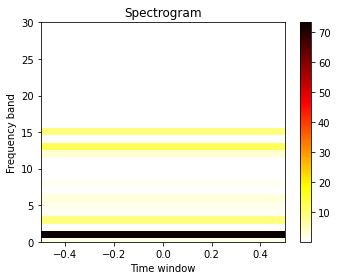

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad5)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
ad6

Four_81    17.816
Four_82     8.211
Four_83    14.035
Four_84    10.656
Four_85   -30.371
Four_86     3.367
Four_87     8.031
Four_88    15.488
Four_89    17.379
Four_90   -12.219
Four_91    16.113
Four_92    27.875
Four_93    16.914
Four_94    18.414
Four_95    18.988
Four_96     0.442
Name: 5, dtype: float64

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



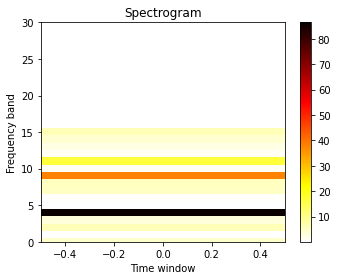

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad6)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



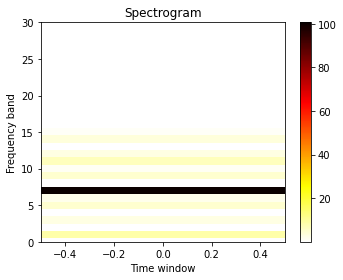

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad7)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



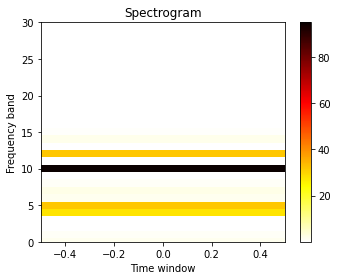

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad8)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



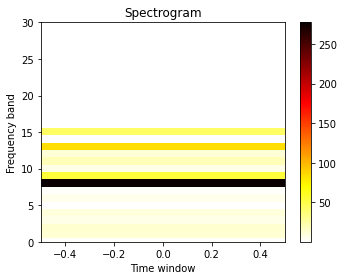

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad9)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



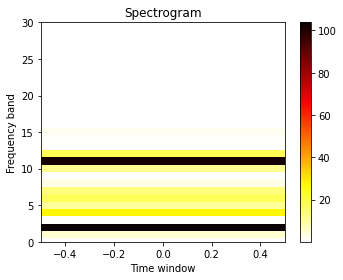

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad10)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



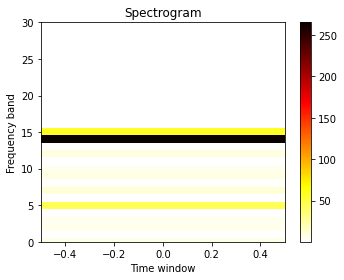

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad11)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



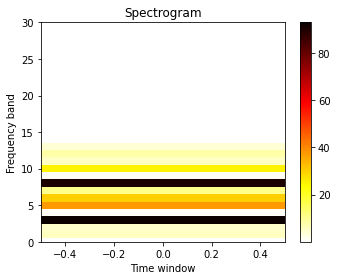

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad12)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



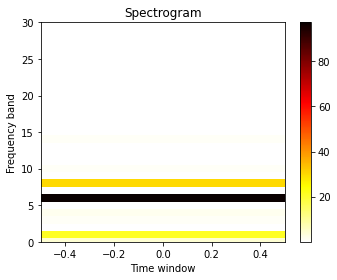

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad13)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



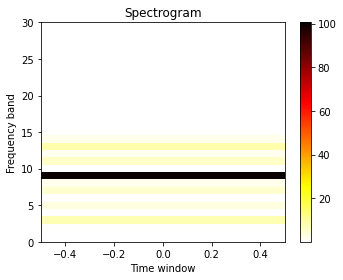

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad14)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



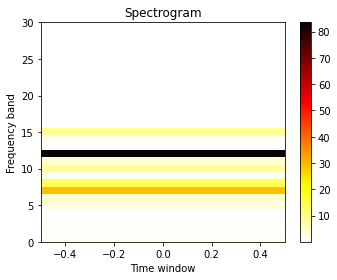

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad15)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



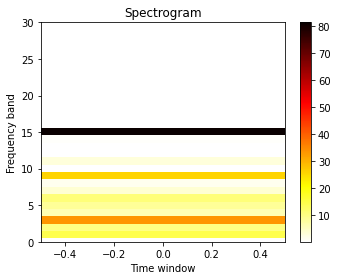

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad16)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



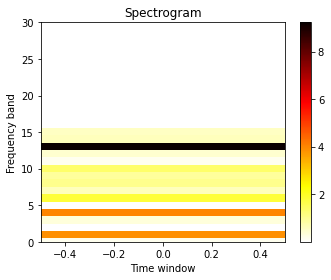

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad17)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



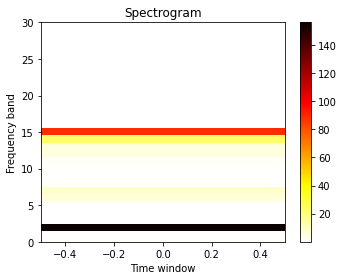

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad18)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



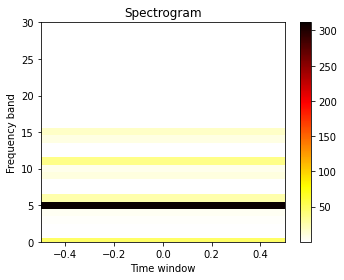

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(np.array(ad19)))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



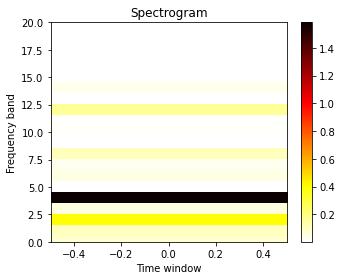

In [ ]:

freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioAD))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



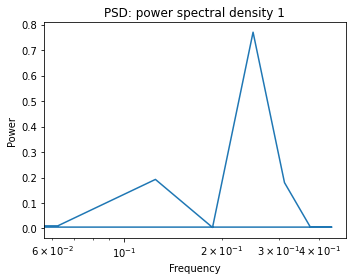

In [ ]:
freqs, psd = signal.welch(ifft(segnalemedioAD))

#print(freqs, psd)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



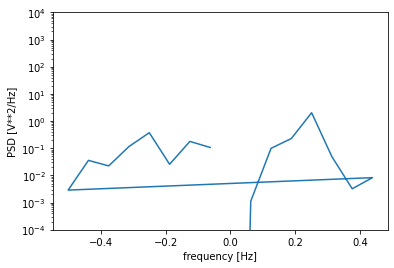

In [ ]:
f, Pxx_den = signal.periodogram(ifft(segnalemedioAD))
plt.semilogy(f, Pxx_den)
plt.ylim([1e-4, 1e4])
#plt.xlim(0,40)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



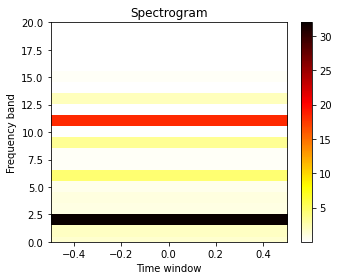

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioMCI))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



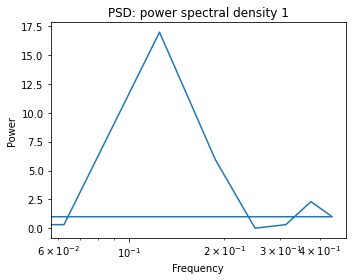

In [ ]:
freqs, psd = signal.welch(ifft(segnalemedioMCI))

#print(freqs, psd)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



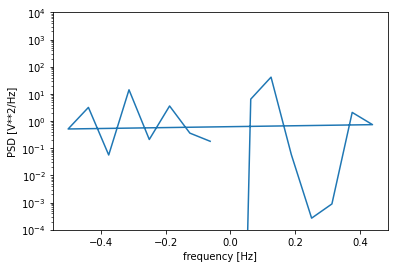

In [ ]:
f, Pxx_den = signal.periodogram(ifft(segnalemedioMCI))
plt.semilogy(f, Pxx_den)
plt.ylim([1e-4, 1e4])
#plt.xlim(0,40)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



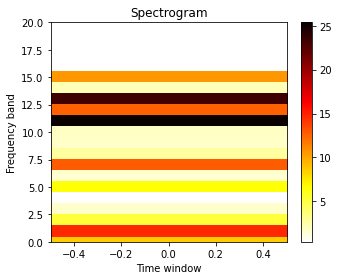

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioHC))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



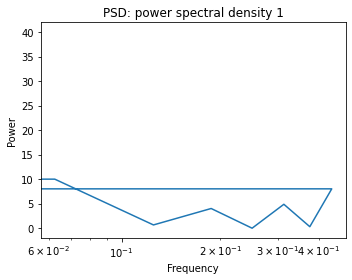

In [ ]:
freqs, psd = signal.welch(ifft(segnalemedioHC))

#print(freqs, psd)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



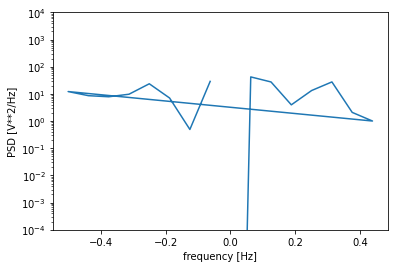

In [ ]:
f, Pxx_den = signal.periodogram(ifft(segnalemedioHC))
plt.semilogy(f, Pxx_den)
plt.ylim([1e-4, 1e4])
#plt.xlim(0,40)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
ADpaziente=pazienteAD.to_numpy()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



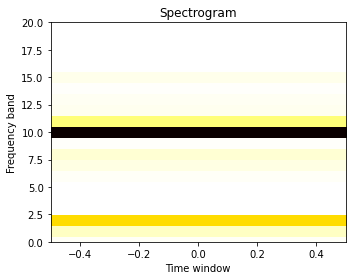

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(ADpaziente))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
#colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



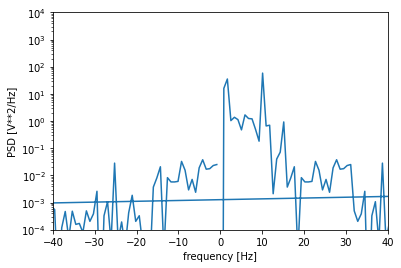

In [ ]:
f, Pxx_den = signal.periodogram(ifft(ADpaziente),256)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-4, 1e4])
plt.xlim(-40,40)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
MCIpaziente=pazienteMCI.to_numpy()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



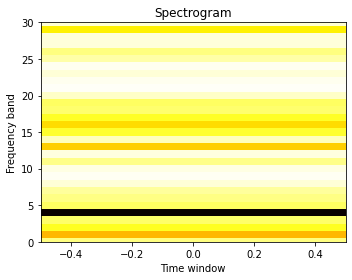

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(MCIpaziente))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
#colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



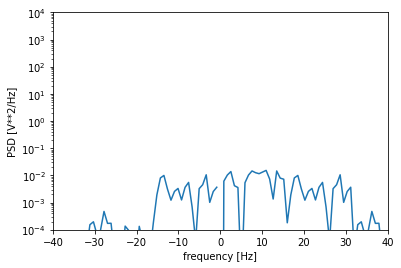

In [ ]:
f, Pxx_den = signal.periodogram(ifft(MCIpaziente),256)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-4, 1e4])
plt.xlim(-40,40)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
HCpaziente=pazienteHC.to_numpy()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



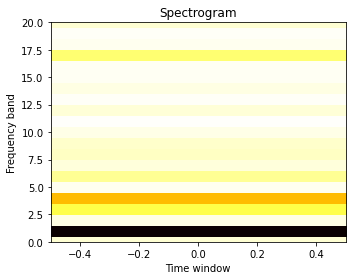

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(HCpaziente))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
#colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



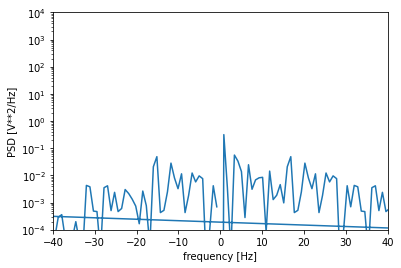

In [ ]:
f, Pxx_den = signal.periodogram(ifft(HCpaziente),256)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-4, 1e4])
plt.xlim(-40,40)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
energiaAD=0
for i in range(len(segnalemedioAD)):
         energiaAD=energiaAD+pow(abs(segnalemedioAD[i]),2) 
energiaAD            

326.6674563784595

In [ ]:
energiaMCI=0
for i in range(len(segnalemedioMCI)):
         energiaMCI=energiaMCI+pow(abs(segnalemedioMCI[i]),2) 
energiaMCI   

1291.9951426899045

In [ ]:
energiaHC=0
for i in range(len(segnalemedioHC)):
         energiaHC=energiaHC+pow(abs(segnalemedioHC[i]),2) 
energiaHC   

3494.9935857418213

In [ ]:
elab_Fourier(1)

AD


In [ ]:
matriceADtot[0:19,]

array([[-1.868400e+02, -1.114781e+03, -1.657664e+03, -2.845550e+02,
        -3.277620e+02, -2.968200e+02, -1.923120e+02, -3.626170e+02,
        -3.113520e+02,  3.065390e+02, -1.959410e+02,  1.190590e+02,
         2.128125e+03, -2.270940e+02,  2.341250e+02,  1.285500e+01],
       [-5.588300e+01, -7.485500e+01, -2.689180e+02,  1.704300e+01,
         2.520000e+01,  4.030000e+01,  1.104000e+00,  2.540600e+01,
         2.119100e+01,  2.118200e+01,  2.167000e+01, -5.052600e+01,
         3.478800e+01,  1.512400e+01,  2.356100e+01,  1.367400e+01],
       [ 3.850700e+01,  5.423500e+01,  3.636000e+01,  3.714400e+01,
         4.248200e+01,  4.425300e+01, -6.221000e+00, -3.991000e+00,
        -5.482000e+00, -1.426200e+01,  5.900000e-02, -5.055000e+00,
         9.174000e+00, -1.662000e+00, -4.702700e+01, -1.767000e+00],
       [-3.889000e+00, -1.336000e+00,  5.737000e+00, -1.203300e+01,
         3.991000e+00,  5.061000e+00,  1.433000e+00,  2.373000e+00,
        -5.870000e-01, -2.443000e+00, -2.5050

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



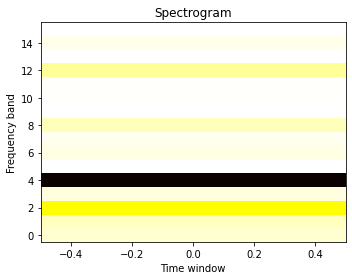

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioAD))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]), array([8.]), array([[18.81261506],
        [ 0.24929889],
        [16.93460021],
        [ 7.12322675],
        [ 7.19992284],
        [ 2.84093051],
        [ 7.5540646 ],
        [ 0.0672248 ],
        [ 0.52984349]]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



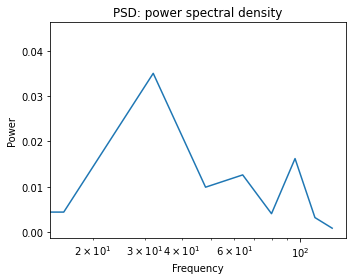

In [ ]:
freqs, psd = signal.welch(segnalemedioAD,256)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([11.28702747,  1.13309103,  8.96534752,  2.53880381,  3.23210169,
         1.04343454,  4.15328606,  0.82374543,  0.22406338]))

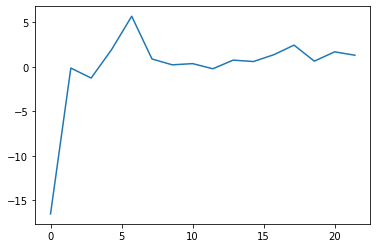

In [ ]:

t0,tf,n=0.0,0.7,32
T=(tf-t0)/n
xf=fftfreq(n,T)
xfl=xf[:n//2]

plt.figure(1)
plt.plot(xfl,segnalemedioAD)
#plt.xlim(0.7)

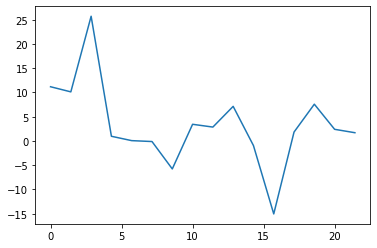

In [ ]:
t0,tf,n=0.0,0.7,32
T=(tf-t0)/n
xf=fftfreq(n,T)
xfl=xf[:n//2]

plt.figure(1)
plt.plot(xfl,segnalemedioMCI)
#plt.xlim(0.7)

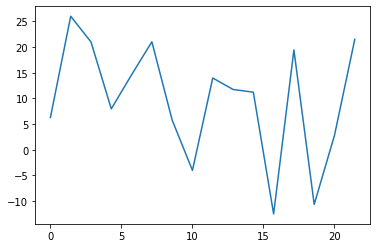

In [ ]:
t0,tf,n=0.0,0.7,32
T=(tf-t0)/n
xf=fftfreq(n,T)
xfl=xf[:n//2]

plt.figure(1)
plt.plot(xfl,segnalemedioHC)
#plt.xlim(0.7)

In [ ]:
freqs, psd 

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([11.28702747,  1.13309103,  8.96534752,  2.53880381,  3.23210169,
         1.04343454,  4.15328606,  0.82374543,  0.22406338]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



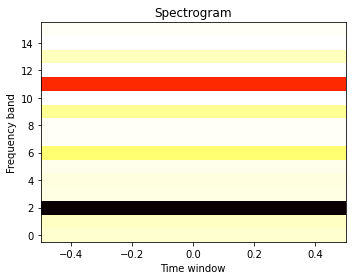

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioMCI))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
         0.4375, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625]), array([8.]), array([[1.58327363e+00],
        [1.97132157e+00],
        [3.19651472e+01],
        [9.72106651e-01],
        [1.10212297e+00],
        [7.47969613e-01],
        [4.62214046e+00],
        [3.47918758e-01],
        [3.72471087e-01],
        [3.48881241e+00],
        [1.13611864e-01],
        [1.82764568e+01],
        [1.95526382e-02],
        [2.15737304e+00],
        [3.79007056e-02],
        [3.82863943e-01]]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



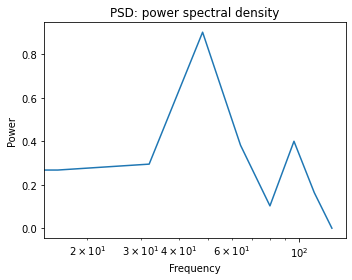

In [ ]:
freqs, psd = signal.welch(segnalemedioMCI,256)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([7.77640302e+01, 6.85844721e+01, 7.55521392e+01, 2.31007640e+02,
        9.78182876e+01, 2.63729036e+01, 1.02486076e+02, 4.19302787e+01,
        5.58839393e-02]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



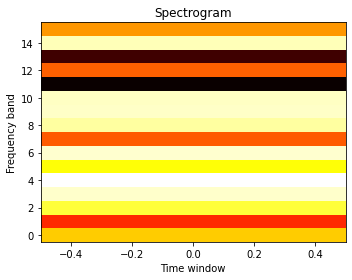

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioHC))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
         0.4375, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625]), array([8.]), array([[ 8.66572049],
        [14.78236614],
        [ 5.30068586],
        [ 1.65634375],
        [ 0.36861669],
        [ 6.58742491],
        [ 1.61886981],
        [12.85713632],
        [ 2.71963818],
        [ 1.75172922],
        [ 1.84535891],
        [25.39429791],
        [12.62821301],
        [23.40856056],
        [ 2.21178474],
        [10.54912355]]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



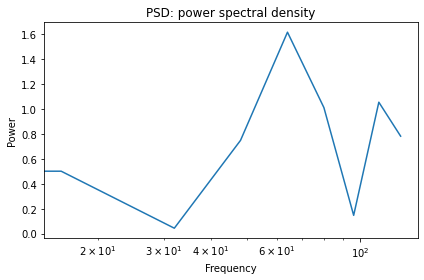

In [ ]:
freqs, psd = signal.welch(segnalemedioHC,256)

#plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd

(array([  0.,  16.,  32.,  48.,  64.,  80.,  96., 112., 128.]),
 array([0.14224185, 0.50064513, 0.04389775, 0.74759036, 1.61448919,
        1.01037786, 0.14691242, 1.05352132, 0.78132468]))

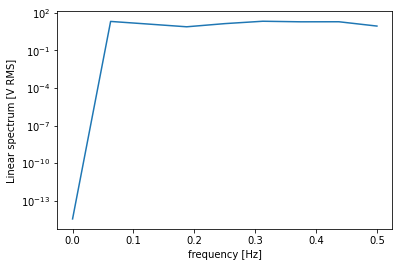

In [ ]:
f, Pxx_spec = signal.periodogram(segnalemedioHC)
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
#plt.ylim([1e-4, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

In [ ]:
freqs, psd

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([ 36.41391251, 128.16515325,  11.23782486, 191.38313323,
        413.30923249, 258.65673247,  37.60957946, 269.70145666,
        200.01911934]))

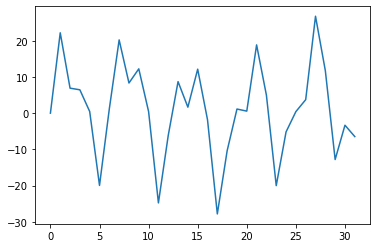

(0.7, 22.500000000000004)

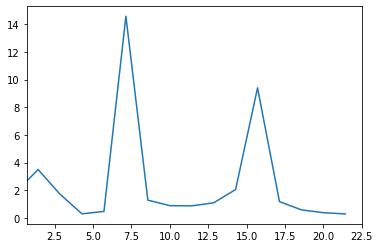

In [ ]:
f= lambda t: 4*np.sin(2*np.pi*2*t)+ 15*np.sin(7*np.pi*2*t)+10*np.sin(15*np.pi*2*t)
t0,tf,n = 0,0.7,32

T=(tf-t0)/n
t= np.linspace(t0,tf,n)
plt.plot(f(t))
plt.show()

y=f(t)

fy=fft(y)

#per 2 perchè ci sono i due lati e il modulo perche ci sono le ampiezze negative
fyl=2*abs(fy[:n//2]/n)  
#fyy=fftshift(fy)
#plt.plot(fyy)
xf=fftfreq(n,T)
xfl=xf[:n//2]

plt.figure(1)
plt.plot(xfl,fyl)
plt.xlim(0.7)

In [ ]:
energiesegnaliAD=np.arange(0,len(pazientiAD),1.0)
energiesegnaliMCI=np.arange(0,len(pazientiMCI),1.0)
energiesegnaliHC=np.arange(0,len(pazientiHC),1.0)

In [ ]:
for i in range(len(energiesegnaliAD)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceAD[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliAD[i]=energia

In [ ]:
for i in range(len(energiesegnaliMCI)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceMCI[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliMCI[i]=energia

In [ ]:
for i in range(len(energiesegnaliHC)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceHC[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliHC[i]=energia

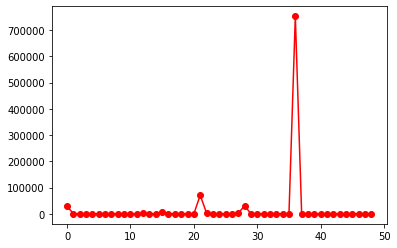

In [ ]:
x=np.arange(0,len(energiesegnaliAD),1)
plt.plot(x,energiesegnaliAD, color="red", marker="o")
#plt.ylim(0,2000)
plt.show()

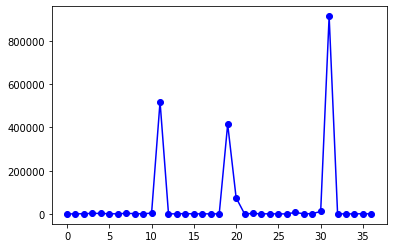

In [ ]:
x=np.arange(0,len(energiesegnaliMCI),1)
plt.plot(x,energiesegnaliMCI, color="blue", marker="o")
#plt.ylim(0,2000)
plt.show()

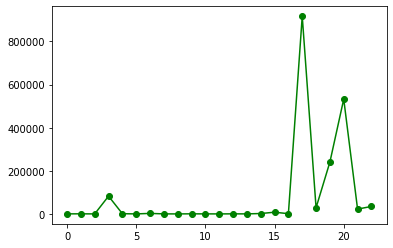

In [ ]:
x=np.arange(0,len(energiesegnaliHC),1)
plt.plot(x,energiesegnaliHC, color="green", marker="o")
#plt.ylim(0,2000)
plt.show()

In [ ]:
def spettro(f):
    N = len(f)                       # Lunghezza del vettore di partenza
    Nf = int( N / 2 )                # Frequenza di Nyquist
    om = np.linspace(0.0, Nf, Nf+1)  # Vettore di output contenente le frequenze
    sp = np.zeros(Nf+1)              # Vettore di output contenente lo spettro
    ak = np.fft.rfft(f) / N          # Trasformata del vettore di partenza (normalizzata!)
    for n in range(Nf+1):
        if n == 0:
            sp[n] = np.square(np.abs(ak[n]))
        else:
            sp[n] = 2.0 * np.square(np.abs(ak[n]))
    return om, sp



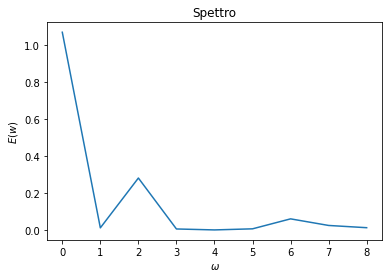

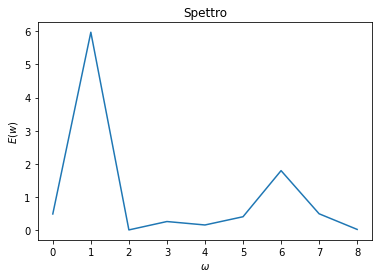

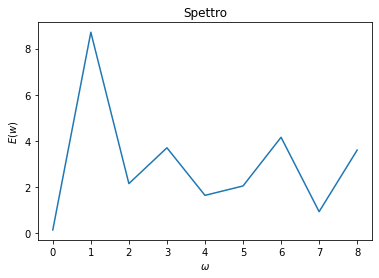

In [ ]:
y1=irfft(segnalemedioAD)
y2=irfft(segnalemedioMCI)
y3=irfft(segnalemedioHC)

w, Ew = spettro(y1)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y2)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y3)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()

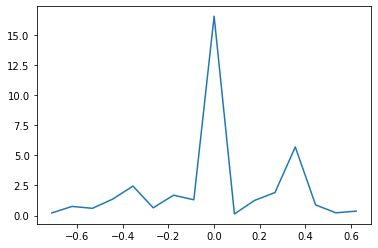

In [ ]:
ps = np.abs(segnalemedioAD)

time_step = 180/256
freqs = fftfreq(16, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

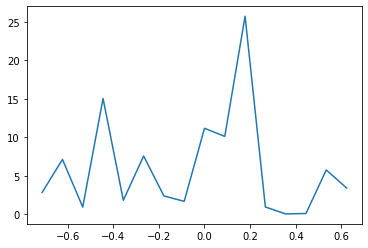

In [ ]:
ps = np.abs(segnalemedioMCI)

time_step = 180/256
freqs = fftfreq(16, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

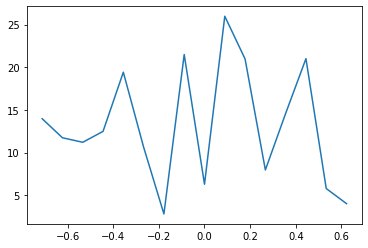

In [ ]:
ps = np.abs(segnalemedioHC)

time_step = 180/256
freqs = fftfreq(16, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

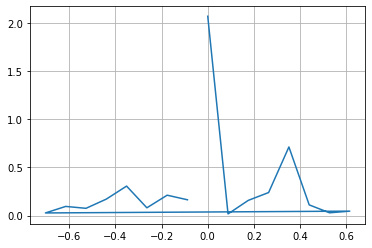

In [ ]:

# Number of sample points
N = 16
# sample spacing
T = 1.0 / 180.0
T = 128.0 / 180.0
x = np.linspace(0.0, N*T, N, endpoint=False)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = segnalemedioAD
#xf = fftfreq(N, T)[:N//2]
xf = fftfreq(N, T)

#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf))
plt.grid()
plt.show()

## prova 1 bis segnale paziente come media dei segnali singoli elettrodi, e segnale totale classe come media dei segnali

In [ ]:
pazientiAD=df_AD.loc[:, "Four_1":"Four_304"]
pazientiMCI=df_MCI.loc[:, "Four_1":"Four_304"]
pazientiHC=df_HC.loc[:, "Four_1":"Four_304"]

NameError: ignored

In [ ]:
pazienteAD=pazientiAD.iloc[0,]
pazienteMCI=pazientiMCI.iloc[0,]
pazienteHC=pazientiHC.iloc[0,]

NameError: ignored

In [ ]:
pazienteAD

In [ ]:
matriceAD = np.zeros((len(pazientiAD),16))
matriceMCI = np.zeros((len(pazientiMCI),16))
matriceHC = np.zeros((len(pazientiHC),16))


In [ ]:
segnalemedioAD=np.arange(0,16,1.0)
segnalemedioMCI=np.arange(0,16,1.0)
segnalemedioHC=np.arange(0,16,1.0)

In [ ]:
def media_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")
    if ntest==2:
       dati=pazientiMCI   
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
    
    n=len(dati)
    if n==304:
       n=1 

    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()
        e=19
        i=0
        f=16
        indice=0
        matricesegnale = np.zeros((19,16))
        for elettrodo in range(e):
            vettore=np.array(pvettore[i:f])
            #print("indici", i,f,elettrodo,len(vettore)) 
            #print(vettore)  
            matricesegnale[elettrodo,]=vettore
            i=f
            f=f+16
            indice=indice+1
    
        signmedio=np.arange(0,16,1.0)
        
        for k in range(len(signmedio)):
              signmedio[k]=np.mean(matricesegnale[:,k])    

        if ntest==1:
               matriceAD[riga,]=signmedio
        if ntest==2:
               matriceMCI[riga,]=signmedio
        if ntest==3:
               matriceHC[riga,]=signmedio

    
    if ntest==1:
       for z in range(len(segnalemedioAD)):
             segnalemedioAD[z]=np.mean(matriceAD[:,z])    
    if ntest==2:
       for z in range(len(segnalemedioMCI)):
             segnalemedioMCI[z]=np.mean(matriceMCI[:,z])       
    if ntest==3:
       for z in range(len(segnalemedioHC)):
             segnalemedioHC[z]=np.mean(matriceHC[:,z])        
   

In [ ]:
segnalemedioADtot=np.arange(0,304,1.0)
segnalemedioMCItot=np.arange(0,304,1.0)
segnalemedioHCtot=np.arange(0,304,1.0)


In [ ]:
def mediatot_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")

    if ntest==2:
       dati=pazientiMCI 
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
 
    n=len(dati)
    if n==304:
       n=1 
    segnalemediotot=np.arange(0,304,1.0)

    for colonna in range(304):
        #print("riga", riga)
        segnalemediotot[colonna]=np.mean(dati.iloc[:,colonna])
        
    
    if ntest==1:
       segnalemedioADtot=segnalemediotot
       print(segnalemedioADtot)   
    if ntest==2:
       segnalemedioMCItot=segnalemediotot
       print(segnalemedioMCItot) 
    if ntest==3:
       segnalemedioHCtot=segnalemediotot
       print(segnalemedioHCtot) 

In [ ]:
matriceADtot = np.zeros((len(pazientiAD)*19,16))
matriceMCItot = np.zeros((len(pazientiMCI)*19,16))
matriceHCtot = np.zeros((len(pazientiHC)*19,16))

In [ ]:
def elab_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")
    if ntest==2:
       dati=pazientiMCI   
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
    
    n=len(dati)
    if n==304:
       n=1 

    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()
        e=19
        i=0
        f=16
        indice=0
        matricesegnale = np.zeros((19,16))
        for elettrodo in range(e):
            vettore=np.array(pvettore[i:f])
            #print("indici", i,f,elettrodo,len(vettore)) 
            #print(vettore)  
            matricesegnale[elettrodo,]=vettore
            i=f
            f=f+16
            indice=indice+1
    
        
        if ntest==1:
               for k in range(19):
                   matriceADtot[((riga*19)+k),]=matricesegnale[k]
        if ntest==2:
               for k in range(19):
                   matriceMCItot[((riga*19)+k),]=matricesegnale[k]
               
        if ntest==3:
               for k in range(19):
                   matriceHCtot[((riga*19)+k),]=matricesegnale[k]
              

    
        
   

In [ ]:
elab_Fourier(1)


In [ ]:
elab_Fourier(2)

In [ ]:
elab_Fourier(3)

In [ ]:
media_Fourier(1)
media_Fourier(2)
media_Fourier(3)

In [ ]:
mediatot_Fourier(1)
mediatot_Fourier(2)
mediatot_Fourier(3)

In [ ]:
for colonna in range(304):
        #print("riga", riga)
        segnalemedioADtot[colonna]=np.mean(pazientiAD.iloc[:,colonna])
for colonna in range(304):
        #print("riga", riga)
        segnalemedioMCItot[colonna]=np.mean(pazientiMCI.iloc[:,colonna]) 
for colonna in range(304):
        #print("riga", riga)
        segnalemedioHCtot[colonna]=np.mean(pazientiHC.iloc[:,colonna])    

In [ ]:
segnalemedioADtot

In [ ]:
freqs, psd = signal.welch(segnalemedioAD,256)

print(freqs, psd)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()


freqs, psd = signal.welch(segnalemedioMCI,256)

print(freqs, psd)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
freqs, psd

freqs, psd = signal.welch(segnalemedioHC,256)
print(freqs, psd)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()


In [ ]:
segnale=matriceADtot[0:19,]

In [ ]:
matriceHCtot[0,]

In [ ]:
freqs, psd = signal.welch(matriceADtot[0,],256)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

freqs, psd = signal.welch(matriceADtot[1,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 2')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceADtot[2,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 3')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceADtot[3,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 4')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceADtot[4,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 5')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceADtot[5,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 6')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceADtot[6,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 7')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceADtot[7,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 8')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()


freqs, psd = signal.welch(matriceADtot[8,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 9')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



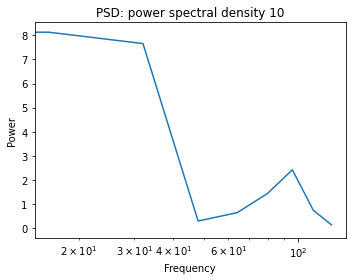

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



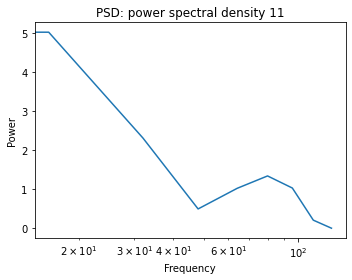

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



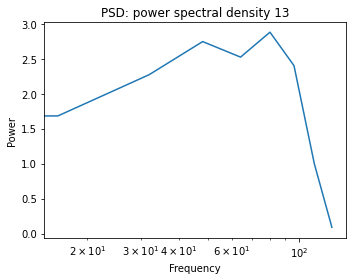

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



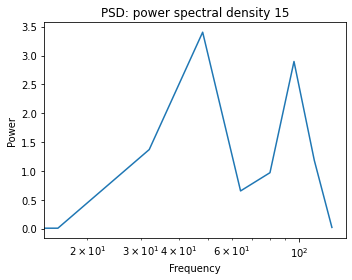

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



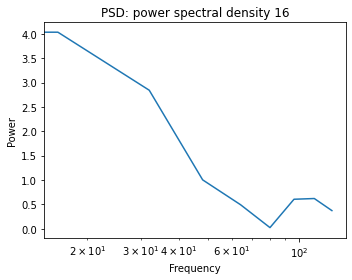

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



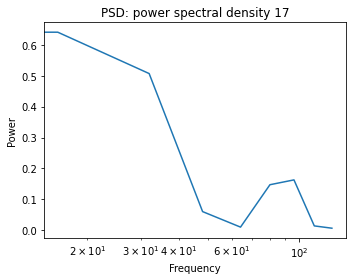

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



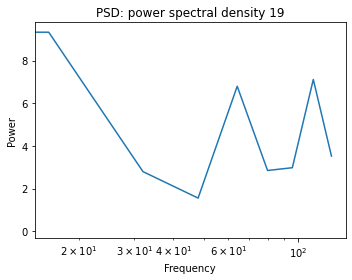

In [ ]:
freqs, psd = signal.welch(matriceADtot[9,],256)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 10')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

freqs, psd = signal.welch(matriceADtot[10,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 11')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceADtot[12,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 13')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceADtot[14,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 15')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceADtot[15,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 16')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceADtot[16,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 17')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceADtot[18,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 19')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()






In [ ]:
freqs, psd = signal.welch(matriceHCtot[0,],256)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

freqs, psd = signal.welch(matriceHCtot[1,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 2')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceHCtot[2,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 3')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceHCtot[3,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 4')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceHCtot[4,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 5')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceHCtot[5,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 6')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceHCtot[6,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 7')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceHCtot[7,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 8')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()


freqs, psd = signal.welch(matriceHCtot[8,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 9')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

In [ ]:
freqs, psd = signal.welch(matriceHCtot[9,],256)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 10')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

freqs, psd = signal.welch(matriceHCtot[10,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 11')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceHCtot[12,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 13')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceHCtot[14,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 15')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceHCtot[15,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 16')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceHCtot[16,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 17')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()

freqs, psd = signal.welch(matriceHCtot[18,],256)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 19')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
plt.show()






In [ ]:
freqs,psd

## calcolo energia totale per tipologia


## psd da fft

ValueError: ignored

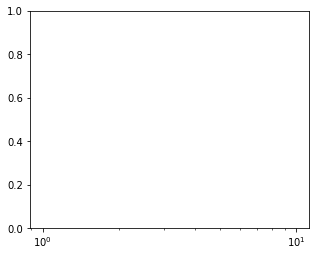

In [ ]:
#rng default
Fs = 256;
#t = 0:1/Fs:1-1/Fs;
# x = cos(2*pi*100*t) + randn(size(t));

#N = length(x);
N=16
#xdft = fft(x);
xdft=segnalemedioAD
#xdft = xdft(1:N/2+1);
psdx = (1/(Fs*N)) * pow(abs(xdft),2)
psdx[2:14] = 2*psdx[2:14]


freq = np.arange(0,Fs/N,Fs/2, dtype=int)



plt.figure(figsize=(5, 4))
plt.semilogx(freq, psdx)

plt.tight_layout()


plt.title('Periodogram Using FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()

In [ ]:
segnalemedioAD

array([-16.55822234,  -0.13421697,  -1.26108056,   1.91110204,
         5.69780881,   0.88489151,   0.22754135,   0.3643072 ,
        -0.21499463,   0.75720408,   0.5991869 ,   1.36316004,
         2.44557895,   0.64204834,   1.69034157,   1.30857895])

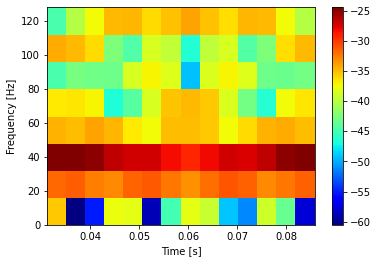

In [ ]:
from scipy.signal import spectrogram
from pylab import *
#Fs = 1 / dt                # Define the sampling frequency,
Fs=256
#interval = int(Fs)        # ... the interval size,
#overlap = int(Fs * 0.95)  # ... and the overlap intervals
interval = int(16)        # ... the interval size,
overlap = int(16*0.95)          # ... and the overlap intervals
EEG=irfft(segnalemedioAD)
                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * np.log10(Sxx),cmap='jet')
#pcolormesh(t, f, Sxx,cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
#plt.ylim([0, 70])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')
#savefig('imgs/3-14')
show()

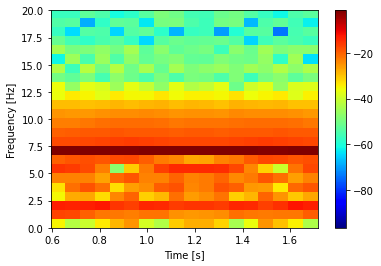

In [ ]:
from scipy.signal import spectrogram
from pylab import *
#Fs = 1 / dt                # Define the sampling frequency,
Fs=256
#interval = int(Fs)        # ... the interval size,
#overlap = int(Fs * 0.95)  # ... and the overlap intervals
interval = int(304)        # ... the interval size,
overlap = int(304*0.95)          # ... and the overlap intervals
EEG=irfft(segnalemedioADtot)
                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * np.log10(Sxx),cmap='jet')
#pcolormesh(t, f, Sxx,cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
plt.ylim([0, 20])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')
#savefig('imgs/3-14')
show()

In [ ]:
SxxAD=Sxx

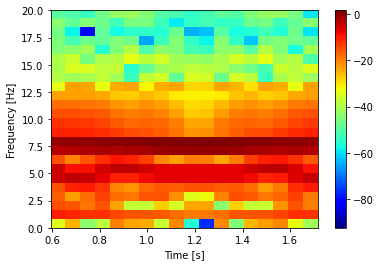

In [ ]:
from scipy.signal import spectrogram
from pylab import *
#Fs = 1 / dt                # Define the sampling frequency,
Fs=256
#interval = int(Fs)        # ... the interval size,
#overlap = int(Fs * 0.95)  # ... and the overlap intervals
interval = int(304)        # ... the interval size,
overlap = int(304*0.95)          # ... and the overlap intervals
EEG=irfft(segnalemedioMCItot)
                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * np.log10(Sxx),cmap='jet')
#pcolormesh(t, f, Sxx,cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
plt.ylim([0, 20])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')
#savefig('imgs/3-14')
show()

In [ ]:
SxxMCI=Sxx

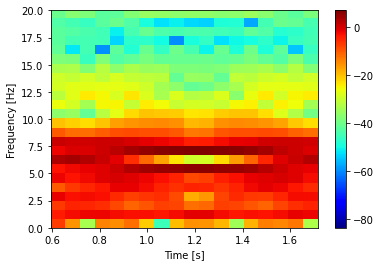

In [ ]:
from scipy.signal import spectrogram
from pylab import *
#Fs = 1 / dt                # Define the sampling frequency,
Fs=256
#interval = int(Fs)        # ... the interval size,
#overlap = int(Fs * 0.95)  # ... and the overlap intervals
interval = int(304)        # ... the interval size,
overlap = int(304*0.95)          # ... and the overlap intervals
EEG=irfft(segnalemedioHCtot)
                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * np.log10(Sxx),cmap='jet')
#pcolormesh(t, f, Sxx,cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
plt.ylim([0, 20])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')
#savefig('imgs/3-14')
show()

In [ ]:
SxxHC=Sxx

In [ ]:
SxxAD

In [ ]:
f

array([  0.,  16.,  32.,  48.,  64.,  80.,  96., 112., 128.])

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



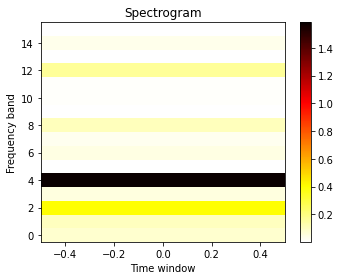

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioAD))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
colorbar() 
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



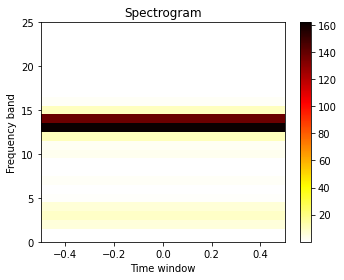

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioADtot))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
colorbar() 
plt.ylim([0, 25])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



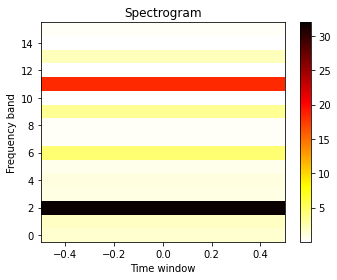

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioMCI))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
colorbar() 
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



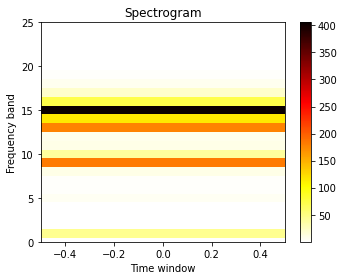

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioMCItot))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
colorbar() 
plt.ylim([0, 25])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



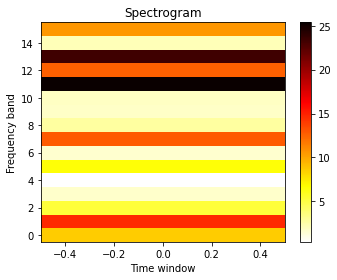

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioHC))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
colorbar() 
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



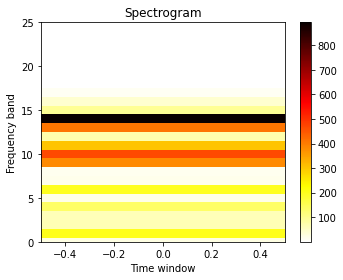

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioHCtot))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
colorbar() 
plt.ylim([0, 25])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
spectrogram,freqs

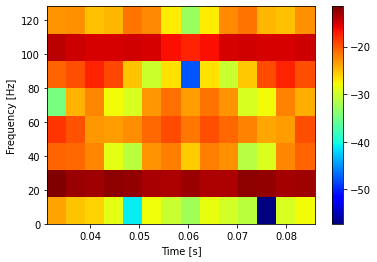

In [ ]:
from scipy.signal import spectrogram
from pylab import *
#Fs = 1 / dt                # Define the sampling frequency,
Fs=256
#interval = int(Fs)        # ... the interval size,
#overlap = int(Fs * 0.95)  # ... and the overlap intervals
interval = int(16)        # ... the interval size,
overlap = int(16*0.95)          # ... and the overlap intervals
EEG=irfft(segnalemedioMCI)
                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * np.log10(Sxx),cmap='jet')
#pcolormesh(t, f, Sxx,cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
#plt.ylim([0, 70])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')
#savefig('imgs/3-14')
show()

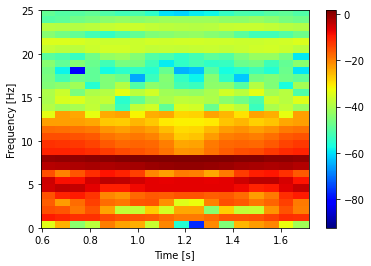

In [ ]:
from scipy.signal import spectrogram
from pylab import *
#Fs = 1 / dt                # Define the sampling frequency,
Fs=256
#interval = int(Fs)        # ... the interval size,
#overlap = int(Fs * 0.95)  # ... and the overlap intervals
interval = int(304)        # ... the interval size,
overlap = int(304*0.95)          # ... and the overlap intervals
EEG=irfft(segnalemedioMCItot)
                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * np.log10(Sxx),cmap='jet')
#pcolormesh(t, f, Sxx,cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
plt.ylim([0, 25])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')
#savefig('imgs/3-14')
show()

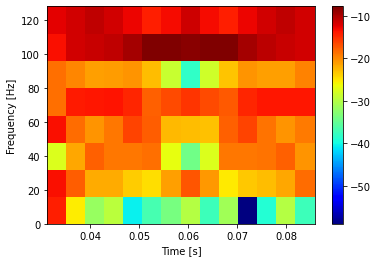

In [ ]:
from scipy.signal import spectrogram
from pylab import *
#Fs = 1 / dt                # Define the sampling frequency,
Fs=256
#interval = int(Fs)        # ... the interval size,
#overlap = int(Fs * 0.95)  # ... and the overlap intervals
interval = int(16)        # ... the interval size,
overlap = int(16*0.95)          # ... and the overlap intervals
EEG=irfft(segnalemedioHC)
                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * np.log10(Sxx),cmap='jet')
#pcolormesh(t, f, Sxx,cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
#plt.ylim([0, 70])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')
#savefig('imgs/3-14')
show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



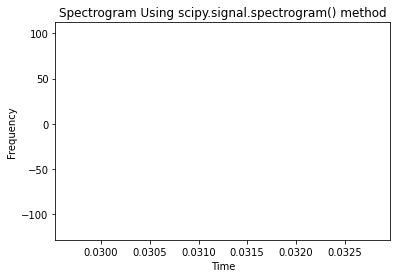

In [ ]:


f, t, Sxx = signal.spectrogram(ifft(segnalemedioAD), fs=256, nfft=16)
pcolormesh(t, f, Sxx)
ylabel('Frequency')
xlabel('Time')
title('Spectrogram Using scipy.signal.spectrogram() method')  

show()


In [ ]:

dt = 0.004                            # Define the sampling interval
N = 16                                # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = segnalemedioAD                   # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
#Sxx = Sxx[:int(len(x) / 2)]           # Ignore negative frequencies

df = 1 / T.max()                      # Determine frequency resolution
fNQ = 128                             # Determine Nyquist frequency
faxis = arange(0,fNQ,df)              # Construct frequency axis

plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
xlim([0, 100])                        # Select frequency range
xlabel('Frequency [Hz]')              # Label the axes
ylabel('Power [$\mu V^2$/Hz]')
show()

NameError: ignored

## prova 2 segnale paziente come media dei segnali singoli elettrodi , e segnale totale classe come media dei segnali, con valori assoluti

In [ ]:
pazientiAD=df_AD.loc[:, "Four_1":"Four_304"]
pazientiMCI=df_MCI.loc[:, "Four_1":"Four_304"]
pazientiHC=df_HC.loc[:, "Four_1":"Four_304"]

In [ ]:
pazienteAD=pazientiAD.iloc[0,]
pazienteMCI=pazientiMCI.iloc[0,]
pazienteHC=pazientiHC.iloc[0,]

In [ ]:
n=len(pazientiHC)
n

23

In [ ]:
matriceAD = np.zeros((len(pazientiAD),16))
matriceMCI = np.zeros((len(pazientiMCI),16))
matriceHC = np.zeros((len(pazientiHC),16))


In [ ]:
segnalemedioAD=np.arange(0,16,1.0)
segnalemedioMCI=np.arange(0,16,1.0)
segnalemedioHC=np.arange(0,16,1.0)

In [ ]:
devAD=np.arange(0,16,1.0)
devMCI=np.arange(0,16,1.0)
devHC=np.arange(0,16,1.0)

In [ ]:
def media_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")
    if ntest==2:
       dati=pazientiMCI   
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
    
    n=len(dati)
    if n==304:
       n=1 

    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()
        e=19
        i=0
        f=16
        indice=0
        matricesegnale = np.zeros((19,16))
        for elettrodo in range(e):
            vettore=np.array(abs(pvettore[i:f]))
            #print("indici", i,f,elettrodo,len(vettore)) 
            #print(vettore)  
            matricesegnale[elettrodo,]=vettore
            i=f
            f=f+16
            indice=indice+1
    
        signmedio=np.arange(0,16,1.0)
        
        for k in range(len(signmedio)):
              signmedio[k]=np.mean(matricesegnale[:,k])    

        if ntest==1:
               matriceAD[riga,]=signmedio
        if ntest==2:
               matriceMCI[riga,]=signmedio
        if ntest==3:
               matriceHC[riga,]=signmedio

    
    if ntest==1:
       for z in range(len(segnalemedioAD)):
             segnalemedioAD[z]=np.mean(matriceAD[:,z]) 
             devAD[z]=np.std(matriceAD[:,z])    
    if ntest==2:
       for z in range(len(segnalemedioMCI)):
             segnalemedioMCI[z]=np.mean(matriceMCI[:,z])   
             devMCI[z]=np.std(matriceMCI[:,z])    
    if ntest==3:
       for z in range(len(segnalemedioHC)):
             segnalemedioHC[z]=np.mean(matriceHC[:,z])  
             devHC[z]=np.std(matriceHC[:,z])      
   

In [ ]:
energiasegnale=np.arange(0,16,1.0)
energiaAD=np.arange(0,(len(pazientiAD)),1.0)
energiaMCI=np.arange(0,(len(pazientiMCI)),1.0)
energiaHC=np.arange(0,(len(pazientiHC)),1.0)

energiapaziente=np.arange(0,19,1.0)

In [ ]:
def energia_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")
    if ntest==2:
       dati=pazientiMCI   
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
    
    n=len(dati)
    if n==304:
       n=1 
    
    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()
        e=19
        i=0
        f=16
        indice=0
        matricesegnale = np.zeros((19,16))
        for elettrodo in range(e):
            vettore=np.array(abs(pvettore[i:f]))
            #print("indici", i,f,elettrodo,len(vettore)) 
            #print(vettore)
            vettore **=2   
            matricesegnale[elettrodo,]=vettore
            energiapaziente[indice]=np.sum(vettore)
            i=f
            f=f+16
            indice=indice+1
            
        #print ("segnale ",energiapaziente)
        print("energia media", sp.stats.mode(energiapaziente))
        
        signmedio=np.arange(0,16,1.0)
        
       # for k in range(len(signmedio)):
       #       signmedio[k]=np.mean(matricesegnale[:,k])    

       # if ntest==1:
       #        matriceAD[riga,]=signmedio
       # if ntest==2:
       #        matriceMCI[riga,]=signmedio
       # if ntest==3:
       #        matriceHC[riga,]=signmedio

    
    #if ntest==1:
     #  for z in range(len(energiaAD)):
     #        energiasegnale=matriceAD[z,:]
             #print("AD paziente :",z)
             #print("segnale AD",energiasegnale)
     #        energiasegnale **=2  
             #print("segnale AD **2",energiasegnale)
     #        energiaAD[z]=np.sum(energiasegnale)
             #print("energia AD", energiaAD[z])

    if ntest==2:
       for z in range(len(energiaMCI)):
             energiasegnale=(matriceMCI[z,:]) 
             energiasegnale **=2  
             energiaMCI[z]=np.sum(energiasegnale)
                 
    if ntest==3:
       for z in range(len(energiaHC)):
             energiasegnale=(matriceHC[z,:])
             energiasegnale **=2  
             energiaHC[z]=np.sum(energiasegnale)
            
                   
   

In [ ]:
energia_Fourier(1)

AD
energia media ModeResult(mode=array([533.317442]), count=array([1]))
energia media ModeResult(mode=array([617.741752]), count=array([1]))
energia media ModeResult(mode=array([429.584857]), count=array([1]))
energia media ModeResult(mode=array([620.541548]), count=array([1]))
energia media ModeResult(mode=array([231.800031]), count=array([1]))
energia media ModeResult(mode=array([442.081476]), count=array([1]))
energia media ModeResult(mode=array([342.546118]), count=array([1]))
energia media ModeResult(mode=array([306.205484]), count=array([1]))
energia media ModeResult(mode=array([451.492949]), count=array([1]))
energia media ModeResult(mode=array([368.830181]), count=array([1]))
energia media ModeResult(mode=array([98.374889]), count=array([1]))
energia media ModeResult(mode=array([209.674995]), count=array([1]))
energia media ModeResult(mode=array([1318.315756]), count=array([1]))
energia media ModeResult(mode=array([598.16537]), count=array([1]))
energia media ModeResult(mode=ar

In [ ]:
energia_Fourier(2)

MCI
energia media ModeResult(mode=array([8.631866]), count=array([1]))
energia media ModeResult(mode=array([154.859867]), count=array([1]))
energia media ModeResult(mode=array([573.38768]), count=array([1]))
energia media ModeResult(mode=array([354.025143]), count=array([1]))
energia media ModeResult(mode=array([2115.747738]), count=array([1]))
energia media ModeResult(mode=array([231.971096]), count=array([1]))
energia media ModeResult(mode=array([565.253641]), count=array([1]))
energia media ModeResult(mode=array([502.032674]), count=array([1]))
energia media ModeResult(mode=array([565.665258]), count=array([1]))
energia media ModeResult(mode=array([526.532044]), count=array([1]))
energia media ModeResult(mode=array([215.260327]), count=array([1]))
energia media ModeResult(mode=array([748.291849]), count=array([1]))
energia media ModeResult(mode=array([402.471896]), count=array([1]))
energia media ModeResult(mode=array([178.936969]), count=array([1]))
energia media ModeResult(mode=ar

In [ ]:
energia_Fourier(3)

HC
energia media ModeResult(mode=array([103.863114]), count=array([1]))
energia media ModeResult(mode=array([243.881349]), count=array([1]))
energia media ModeResult(mode=array([114.894294]), count=array([1]))
energia media ModeResult(mode=array([298.940485]), count=array([1]))
energia media ModeResult(mode=array([33.727873]), count=array([1]))
energia media ModeResult(mode=array([33.93175]), count=array([1]))
energia media ModeResult(mode=array([2097.017843]), count=array([1]))
energia media ModeResult(mode=array([226.446475]), count=array([1]))
energia media ModeResult(mode=array([8.894986]), count=array([1]))
energia media ModeResult(mode=array([66.746654]), count=array([1]))
energia media ModeResult(mode=array([19.188412]), count=array([1]))
energia media ModeResult(mode=array([12.442154]), count=array([1]))
energia media ModeResult(mode=array([281.100137]), count=array([1]))
energia media ModeResult(mode=array([366.762615]), count=array([1]))
energia media ModeResult(mode=array([7

In [ ]:
for i in range(len(energiaAD)):
      print("paziente :", i, " energia: ",energiaAD[i]) 
      

paziente : 0  energia:  42283.16327140444
paziente : 1  energia:  10233.302761689753
paziente : 2  energia:  1878.4649245983383
paziente : 3  energia:  2855.221825936288
paziente : 4  energia:  3228.9421941828255
paziente : 5  energia:  1874.646142504155
paziente : 6  energia:  1741.1644858531859
paziente : 7  energia:  1695.5408285844876
paziente : 8  energia:  2831.6845913628804
paziente : 9  energia:  1823.9639373905816
paziente : 10  energia:  3321.8169483241
paziente : 11  energia:  2207.329803806094
paziente : 12  energia:  9469.035631290859
paziente : 13  energia:  3578.66317596676
paziente : 14  energia:  1087.8470913739611
paziente : 15  energia:  15714.648511119112
paziente : 16  energia:  510.0810843628809
paziente : 17  energia:  1598.7564385540165
paziente : 18  energia:  5300.444698717451
paziente : 19  energia:  886.9236247174515
paziente : 20  energia:  2171.7897216481997
paziente : 21  energia:  92717.41706165098
paziente : 22  energia:  9383.052704429363
paziente : 23

In [ ]:
for i in range(len(energiaMCI)):
      print("paziente :", i, " energia: ",energiaMCI[i]) 

paziente : 0  energia:  351.5331007451524
paziente : 1  energia:  2001.2158732382272
paziente : 2  energia:  3641.6386738919664
paziente : 3  energia:  4661.384602387811
paziente : 4  energia:  9771.693239202217
paziente : 5  energia:  3958.055023925207
paziente : 6  energia:  3643.6594358864263
paziente : 7  energia:  7368.753545759003
paziente : 8  energia:  4020.916548831024
paziente : 9  energia:  3442.5413267479225
paziente : 10  energia:  9245.389821720222
paziente : 11  energia:  577788.2398701358
paziente : 12  energia:  2956.8291374542937
paziente : 13  energia:  1351.546349373961
paziente : 14  energia:  2034.8752653379497
paziente : 15  energia:  2099.2336494847646
paziente : 16  energia:  5787.202728728533
paziente : 17  energia:  1075.308546038781
paziente : 18  energia:  1102.3852737922437
paziente : 19  energia:  418485.7294547811
paziente : 20  energia:  79970.19293426315
paziente : 21  energia:  491.28996785872573
paziente : 22  energia:  9974.872114531852
paziente : 2

In [ ]:
for i in range(len(energiaHC)):
      print("paziente :", i, " energia: ",energiaHC[i])

paziente : 0  energia:  1552.4784723434905
paziente : 1  energia:  2272.479324088643
paziente : 2  energia:  745.3494286204987
paziente : 3  energia:  86670.45212529642
paziente : 4  energia:  1790.283208191136
paziente : 5  energia:  296.18954321329636
paziente : 6  energia:  5961.945906825485
paziente : 7  energia:  2039.8736025761773
paziente : 8  energia:  156.83976353739612
paziente : 9  energia:  1775.7487601828257
paziente : 10  energia:  275.83843978116346
paziente : 11  energia:  236.1860162963989
paziente : 12  energia:  1744.872775833795
paziente : 13  energia:  769.7503128448755
paziente : 14  energia:  2792.755902371191
paziente : 15  energia:  10327.636113307479
paziente : 16  energia:  9139.029110387812
paziente : 17  energia:  984189.2738552853
paziente : 18  energia:  34433.670402686985
paziente : 19  energia:  373970.60665406636
paziente : 20  energia:  590896.094537701
paziente : 21  energia:  26307.896934634333
paziente : 22  energia:  37300.59207685873


In [ ]:
media_Fourier(1)


AD


In [ ]:
media_Fourier(2)

MCI


In [ ]:
media_Fourier(3)

HC


In [ ]:
segnalemedioAD,segnalemedioMCI,segnalemedioHC

(array([34.15036627, 17.32807304, 17.39347798, 13.51720945, 15.59014393,
        13.40228786, 12.5925145 , 12.71568851, 12.74801289, 12.07863265,
        11.99173899, 13.13404726, 14.66112782, 12.86480236, 13.08340924,
        12.57017508]),
 array([44.04738407, 24.21047084, 39.71131294, 13.34105832, 12.10764865,
        17.54842105, 19.24651209, 13.978899  , 14.53747653, 18.19272404,
        14.90098435, 29.7723101 , 13.1009303 , 20.02045661, 14.03615932,
        13.18313087]),
 array([41.40046911, 56.43321053, 59.13693135, 48.44436156, 23.17198627,
        42.21965217, 36.67946911, 20.95191076, 25.53417849, 21.89272311,
        23.64353318, 24.07896339, 29.66003432, 19.8690389 , 12.91432494,
        33.82556979]))

In [ ]:
devAD,devMCI,devHC

(array([124.08971829,  17.28521107,  21.42381929,  13.39730446,
         25.69588295,   8.09240267,   8.10714277,   9.37322439,
          9.26527428,   9.03187509,   8.86459315,   9.42621234,
         18.57470049,   9.23483982,   9.49067246,   9.15839596]),
 array([107.83976154,  39.22666491, 148.94008292,   9.18906236,
          7.92253968,  15.3250682 ,  33.24044069,  13.82806846,
         11.95469329,  36.35577535,  18.8741169 ,  94.28757606,
          9.04047474,  38.88832222,  10.86009406,  11.60268652]),
 array([ 70.33428188, 118.11502553, 121.14024961, 105.97943392,
         52.89839106,  73.88363453,  58.73441562,  31.1963616 ,
         56.87776917,  28.15062783,  41.63022457,  34.93940681,
         57.38246451,  29.32085   ,  14.61882814,  77.83968153]))

In [ ]:
energiaAD=0
for i in range(len(segnalemedioAD)):
         energiaAD=energiaAD+pow(abs(segnalemedioAD[i]),2) 
energiaAD            

4029.0386313490303

In [ ]:
energiaMCI=0
for i in range(len(segnalemedioMCI)):
         energiaMCI=energiaMCI+pow(abs(segnalemedioMCI[i]),2) 
energiaMCI   

7895.676217484413

In [ ]:
energiaHC=0
for i in range(len(segnalemedioHC)):
         energiaHC=energiaHC+pow(abs(segnalemedioHC[i]),2) 
energiaHC   

19702.088943512033

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



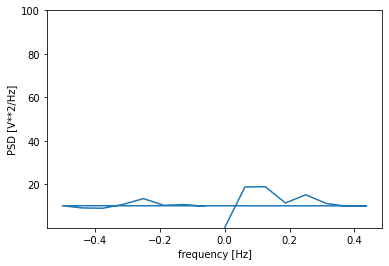

In [ ]:
f, Pxx_den = signal.periodogram(ifft(segnalemedioAD))
#plt.semilogy(f, Pxx_den)
plt.plot(f,Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



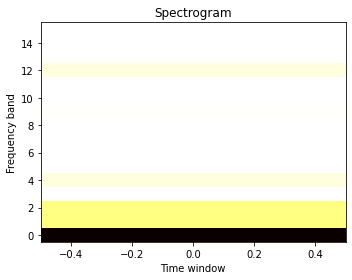

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioAD))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
         0.4375, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625]), array([8.]), array([[0.07764371],
        [0.10310788],
        [0.40013972],
        [0.05194327],
        [1.58247506],
        [0.00250928],
        [0.05063408],
        [0.03323141],
        [0.11140532],
        [0.00400014],
        [0.01029922],
        [0.01195177],
        [0.16360272],
        [0.00778512],
        [0.03728581],
        [0.00700407]]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



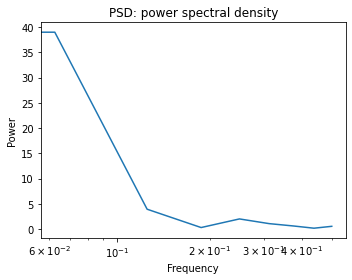

In [ ]:
freqs, psd = signal.welch(segnalemedioAD)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([11.28702747,  1.13309103,  8.96534752,  2.53880381,  3.23210169,
         1.04343454,  4.15328606,  0.82374543,  0.22406338]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



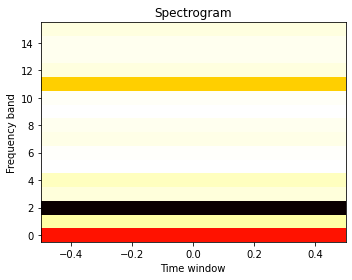

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioMCI))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
         0.4375, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625]), array([8.]), array([[1.58327363e+00],
        [1.97132157e+00],
        [3.19651472e+01],
        [9.72106651e-01],
        [1.10212297e+00],
        [7.47969613e-01],
        [4.62214046e+00],
        [3.47918758e-01],
        [3.72471087e-01],
        [3.48881241e+00],
        [1.13611864e-01],
        [1.82764568e+01],
        [1.95526382e-02],
        [2.15737304e+00],
        [3.79007056e-02],
        [3.82863943e-01]]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



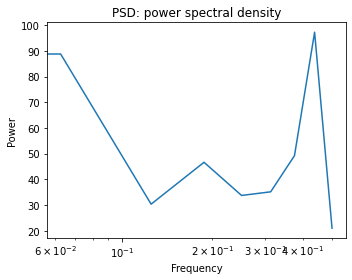

In [ ]:
freqs, psd = signal.welch(segnalemedioMCI)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([7.77640302e+01, 6.85844721e+01, 7.55521392e+01, 2.31007640e+02,
        9.78182876e+01, 2.63729036e+01, 1.02486076e+02, 4.19302787e+01,
        5.58839393e-02]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



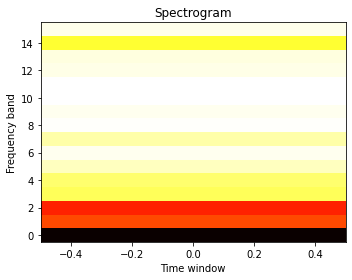

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioHC))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
         0.4375, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625]), array([8.]), array([[ 8.66572049],
        [14.78236614],
        [ 5.30068586],
        [ 1.65634375],
        [ 0.36861669],
        [ 6.58742491],
        [ 1.61886981],
        [12.85713632],
        [ 2.71963818],
        [ 1.75172922],
        [ 1.84535891],
        [25.39429791],
        [12.62821301],
        [23.40856056],
        [ 2.21178474],
        [10.54912355]]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



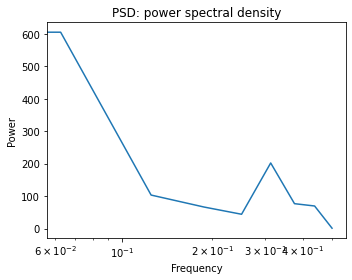

In [ ]:
freqs, psd = signal.welch(segnalemedioHC)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([ 36.41391251, 128.16515325,  11.23782486, 191.38313323,
        413.30923249, 258.65673247,  37.60957946, 269.70145666,
        200.01911934]))

In [ ]:
energiesegnaliAD=np.arange(0,len(pazientiAD),1.0)
energiesegnaliMCI=np.arange(0,len(pazientiMCI),1.0)
energiesegnaliHC=np.arange(0,len(pazientiHC),1.0)

In [ ]:
for i in range(len(energiesegnaliAD)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceAD[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliAD[i]=energia

In [ ]:
for i in range(len(energiesegnaliMCI)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceMCI[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliMCI[i]=energia

In [ ]:
for i in range(len(energiesegnaliHC)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceHC[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliHC[i]=energia

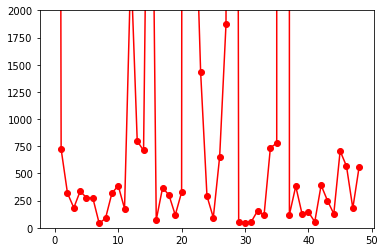

In [ ]:
x=np.arange(0,len(energiesegnaliAD),1)
plt.plot(x,energiesegnaliAD, color="red", marker="o")
#plt.ylim(0,2000)
plt.show()

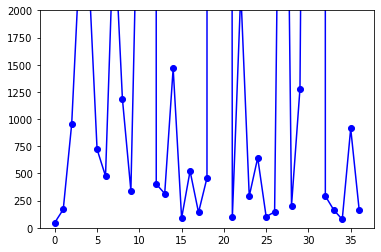

In [ ]:
x=np.arange(0,len(energiesegnaliMCI),1)
plt.plot(x,energiesegnaliMCI, color="blue", marker="o")
#plt.ylim(0,2000)
plt.show()

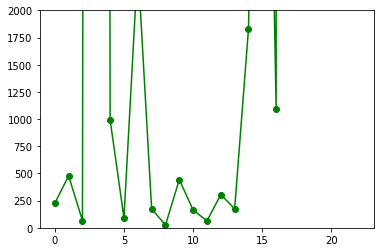

In [ ]:
x=np.arange(0,len(energiesegnaliHC),1)
plt.plot(x,energiesegnaliHC, color="green", marker="o")
#plt.ylim(0,2000)
plt.show()

In [ ]:
plt.magnitude_spectrum(2*fadp11,n)
plt.xlim(0,xmax)
plt.title("1 FP1")
plt.show()

NameError: ignored

In [ ]:
def spettro(f):
    N = len(f)                       # Lunghezza del vettore di partenza
    Nf = int( N / 2 )                # Frequenza di Nyquist
    om = np.linspace(0.0, Nf, Nf+1)  # Vettore di output contenente le frequenze
    sp = np.zeros(Nf+1)              # Vettore di output contenente lo spettro
    ak = np.fft.rfft(f) / N          # Trasformata del vettore di partenza (normalizzata!)
    for n in range(Nf+1):
        if n == 0:
            sp[n] = np.square(np.abs(ak[n]))
        else:
            sp[n] = 2.0 * np.square(np.abs(ak[n]))
    return om, sp



/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



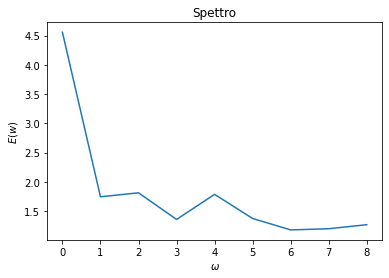

/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



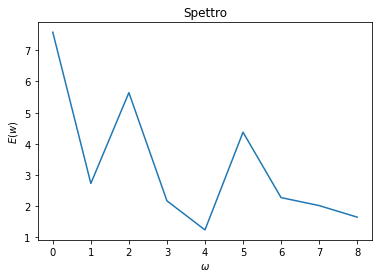

/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



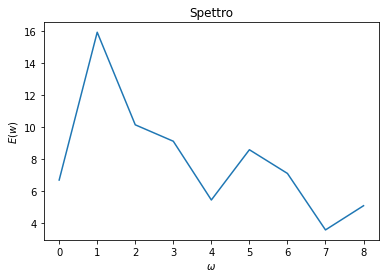

In [ ]:
y1=ifft(segnalemedioAD)
y2=ifft(segnalemedioMCI)
y3=ifft(segnalemedioHC)

w, Ew = spettro(y1)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y2)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y3)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()

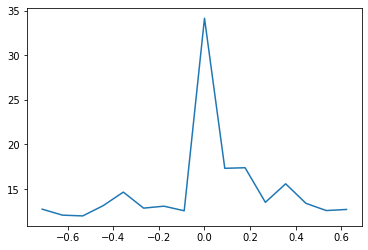

In [ ]:
ps = np.abs(segnalemedioAD)

time_step = 180/256
freqs = fftfreq(16, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

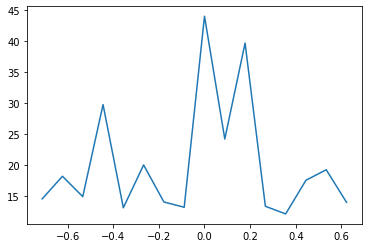

In [ ]:
ps = np.abs(segnalemedioMCI)

time_step = 180/256
freqs = fftfreq(16, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

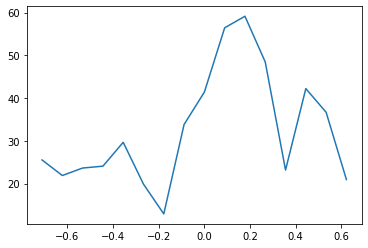

In [ ]:
ps = np.abs(segnalemedioHC)

time_step = 180/256
freqs = fftfreq(16, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

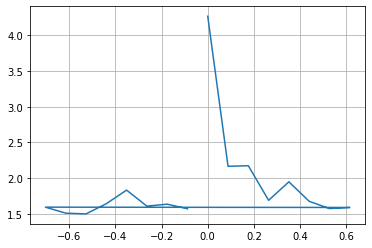

In [ ]:

# Number of sample points
N = 16
# sample spacing
T = 1.0 / 180.0
T = 128.0 / 180.0
x = np.linspace(0.0, N*T, N, endpoint=False)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = segnalemedioAD
#xf = fftfreq(N, T)[:N//2]
xf = fftfreq(N, T)

#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf))
plt.grid()
plt.show()

In [ ]:
pazientiAD=df_AD.loc[:, "Four_1":"Four_304"]
pazientiMCI=df_MCI.loc[:, "Four_1":"Four_304"]
pazientiHC=df_HC.loc[:, "Four_1":"Four_304"]

In [ ]:
pazienteAD=pazientiAD.iloc[0,]
pazienteMCI=pazientiMCI.iloc[0,]
pazienteHC=pazientiHC.iloc[0,]

In [ ]:
n=len(pazientiHC)
n

23

In [ ]:
matriceAD = np.zeros((len(pazientiAD),304))
matriceMCI = np.zeros((len(pazientiMCI),304))
matriceHC = np.zeros((len(pazientiHC),304))


In [ ]:
segnaleAD=np.arange(0,304,1.0)
segnaleMCI=np.arange(0,304,1.0)
segnaleHC=np.arange(0,304,1.0)

304

In [ ]:
def media_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")
    if ntest==2:
       dati=pazientiMCI   
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
    
    n=len(dati)
    if n==304:
       n=1 

    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()

        if ntest==1:
               matriceAD[riga,]=abs(pvettore)
        if ntest==2:
               matriceMCI[riga,]=abs(pvettore)
        if ntest==3:
               matriceHC[riga,]=abs(pvettore)

        
        
    
    if ntest==1:
       for z in range(len(segnaleAD)):
             segnaleAD[z]=np.mean(matriceAD[:,z])    
    if ntest==2:
       for z in range(len(segnaleMCI)):
             segnaleMCI[z]=np.mean(matriceMCI[:,z])       
    if ntest==3:
       for z in range(len(segnaleHC)):
             segnaleHC[z]=np.mean(matriceHC[:,z])        
   

array([ 81.90081633, 105.49183673, 105.04467347, 100.46483673,
       131.11320408, 100.50320408,  87.49063265,  89.01442857,
        86.39310204,  83.04281633,  78.08706122,  96.41428571,
       130.49534694,  81.97138776,  73.80830612,  77.65957143,
       431.11957143,  80.45718367,  84.20697959,  13.82030612,
        13.24326531,  13.30191837,  13.56134694,  11.44840816,
        14.50408163,  16.0485102 ,  12.68797959,  12.5155102 ,
        12.54530612,  11.55265306,  15.02632653,  11.98967347,
        12.50822449,   9.80093878,  10.6174898 ,  16.07755102,
        13.72357143,  11.60561224,   7.45426531,   6.87846939,
         6.06857143,   6.41218367,   6.15234694,   7.97955102,
         8.86585714,   6.77789796,   7.08022449,   7.54306122,
         6.34236735,   7.99902041,   6.14046939,   6.85214286,
         6.15087755,   5.5164898 ,  11.47787755,   7.52734694,
         6.28546939,   4.85583673,   4.32402041,   4.66579592,
         4.94457143,   4.18636735,   5.86046939,   7.69

In [ ]:
media_Fourier(1)


AD


In [ ]:
media_Fourier(2)

MCI


In [ ]:
media_Fourier(3)

HC


In [ ]:
segnaleAD,segnaleMCI,segnaleHC

In [ ]:
energiaAD=0
for i in range(len(segnaleAD)):
         energiaAD=energiaAD+pow(segnaleAD[i],2) 
energiaAD            

370578.84168975154

In [ ]:
energiaMCI=0
for i in range(len(segnaleMCI)):
         energiaMCI=energiaMCI+pow(segnaleMCI[i],2) 
energiaMCI   

877487.2279242593

In [ ]:
energiaHC=0
for i in range(len(segnaleHC)):
         energiaHC=energiaHC+pow(segnaleHC[i],2) 
energiaHC   

3895974.758966754

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



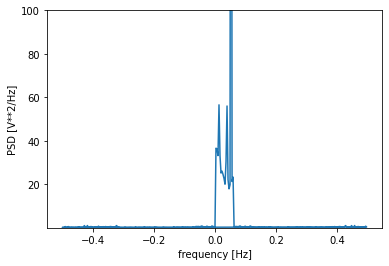

In [ ]:
f, Pxx_den = signal.periodogram(ifft(segnaleAD))
#plt.semilogy(f, Pxx_den)
plt.plot(f,Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



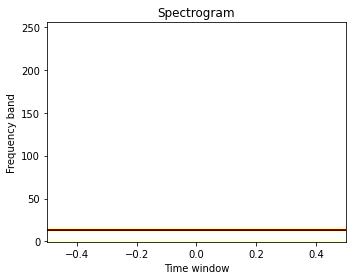

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnaleAD))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.        ,  0.00390625,  0.0078125 ,  0.01171875,  0.015625  ,
         0.01953125,  0.0234375 ,  0.02734375,  0.03125   ,  0.03515625,
         0.0390625 ,  0.04296875,  0.046875  ,  0.05078125,  0.0546875 ,
         0.05859375,  0.0625    ,  0.06640625,  0.0703125 ,  0.07421875,
         0.078125  ,  0.08203125,  0.0859375 ,  0.08984375,  0.09375   ,
         0.09765625,  0.1015625 ,  0.10546875,  0.109375  ,  0.11328125,
         0.1171875 ,  0.12109375,  0.125     ,  0.12890625,  0.1328125 ,
         0.13671875,  0.140625  ,  0.14453125,  0.1484375 ,  0.15234375,
         0.15625   ,  0.16015625,  0.1640625 ,  0.16796875,  0.171875  ,
         0.17578125,  0.1796875 ,  0.18359375,  0.1875    ,  0.19140625,
         0.1953125 ,  0.19921875,  0.203125  ,  0.20703125,  0.2109375 ,
         0.21484375,  0.21875   ,  0.22265625,  0.2265625 ,  0.23046875,
         0.234375  ,  0.23828125,  0.2421875 ,  0.24609375,  0.25      ,
         0.25390625,  0.2578125 ,  0.26171875,  0.2

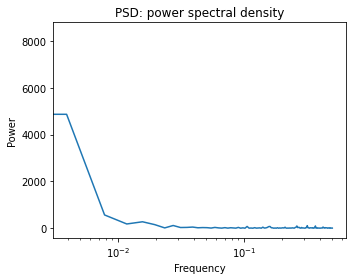

In [ ]:
freqs, psd = signal.welch(segnaleAD)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

(array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
        0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
        0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
        0.05859375, 0.0625    , 0.06640625, 0.0703125 , 0.07421875,
        0.078125  , 0.08203125, 0.0859375 , 0.08984375, 0.09375   ,
        0.09765625, 0.1015625 , 0.10546875, 0.109375  , 0.11328125,
        0.1171875 , 0.12109375, 0.125     , 0.12890625, 0.1328125 ,
        0.13671875, 0.140625  , 0.14453125, 0.1484375 , 0.15234375,
        0.15625   , 0.16015625, 0.1640625 , 0.16796875, 0.171875  ,
        0.17578125, 0.1796875 , 0.18359375, 0.1875    , 0.19140625,
        0.1953125 , 0.19921875, 0.203125  , 0.20703125, 0.2109375 ,
        0.21484375, 0.21875   , 0.22265625, 0.2265625 , 0.23046875,
        0.234375  , 0.23828125, 0.2421875 , 0.24609375, 0.25      ,
        0.25390625, 0.2578125 , 0.26171875, 0.265625  , 0.26953125,
        0.2734375 , 0.27734375, 0.28125   , 0.28

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



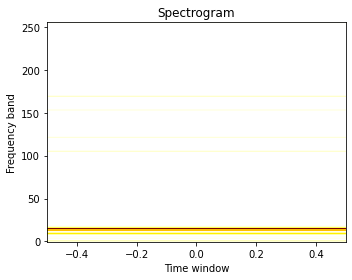

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnaleMCI))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
         0.4375, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625]), array([8.]), array([[1.58327363e+00],
        [1.97132157e+00],
        [3.19651472e+01],
        [9.72106651e-01],
        [1.10212297e+00],
        [7.47969613e-01],
        [4.62214046e+00],
        [3.47918758e-01],
        [3.72471087e-01],
        [3.48881241e+00],
        [1.13611864e-01],
        [1.82764568e+01],
        [1.95526382e-02],
        [2.15737304e+00],
        [3.79007056e-02],
        [3.82863943e-01]]))

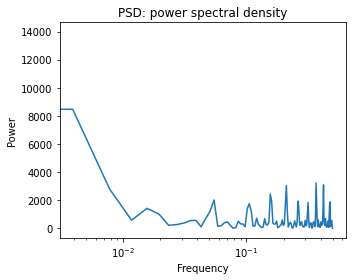

In [ ]:
freqs, psd = signal.welch(segnaleMCI)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([7.77640302e+01, 6.85844721e+01, 7.55521392e+01, 2.31007640e+02,
        9.78182876e+01, 2.63729036e+01, 1.02486076e+02, 4.19302787e+01,
        5.58839393e-02]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



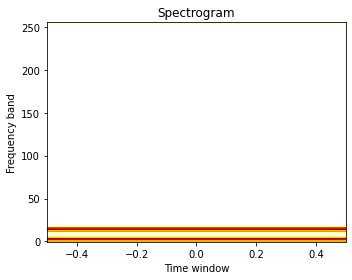

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnaleHC))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
         0.4375, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625]), array([8.]), array([[ 8.66572049],
        [14.78236614],
        [ 5.30068586],
        [ 1.65634375],
        [ 0.36861669],
        [ 6.58742491],
        [ 1.61886981],
        [12.85713632],
        [ 2.71963818],
        [ 1.75172922],
        [ 1.84535891],
        [25.39429791],
        [12.62821301],
        [23.40856056],
        [ 2.21178474],
        [10.54912355]]))

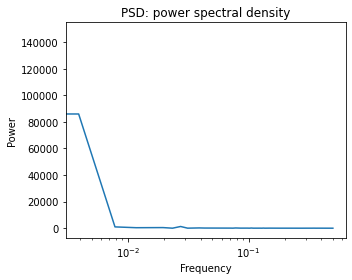

In [ ]:
freqs, psd = signal.welch(segnaleHC)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([ 36.41391251, 128.16515325,  11.23782486, 191.38313323,
        413.30923249, 258.65673247,  37.60957946, 269.70145666,
        200.01911934]))

In [ ]:
energiesegnaliAD=np.arange(0,len(pazientiAD),1.0)
energiesegnaliMCI=np.arange(0,len(pazientiMCI),1.0)
energiesegnaliHC=np.arange(0,len(pazientiHC),1.0)

In [ ]:
for i in range(len(energiesegnaliAD)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceAD[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliAD[i]=energia

In [ ]:
for i in range(len(energiesegnaliMCI)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceMCI[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliMCI[i]=energia

In [ ]:
for i in range(len(energiesegnaliHC)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceHC[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliHC[i]=energia

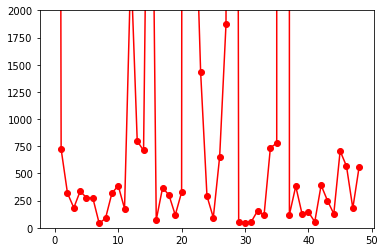

In [ ]:
x=np.arange(0,len(energiesegnaliAD),1)
plt.plot(x,energiesegnaliAD, color="red", marker="o")
#plt.ylim(0,2000)
plt.show()

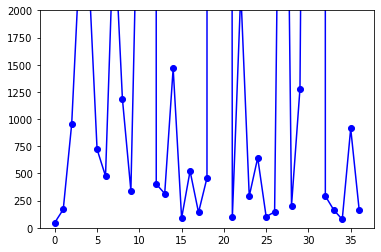

In [ ]:
x=np.arange(0,len(energiesegnaliMCI),1)
plt.plot(x,energiesegnaliMCI, color="blue", marker="o")
#plt.ylim(0,2000)
plt.show()

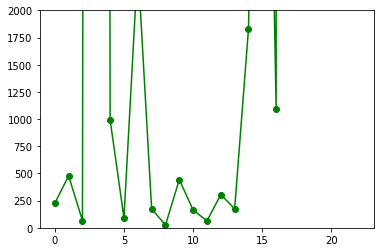

In [ ]:
x=np.arange(0,len(energiesegnaliHC),1)
plt.plot(x,energiesegnaliHC, color="green", marker="o")
#plt.ylim(0,2000)
plt.show()

In [ ]:
plt.magnitude_spectrum(2*fadp11,n)
plt.xlim(0,xmax)
plt.title("1 FP1")
plt.show()

NameError: ignored

In [ ]:
def spettro(f):
    N = len(f)                       # Lunghezza del vettore di partenza
    Nf = int( N / 2 )                # Frequenza di Nyquist
    om = np.linspace(0.0, Nf, Nf+1)  # Vettore di output contenente le frequenze
    sp = np.zeros(Nf+1)              # Vettore di output contenente lo spettro
    ak = np.fft.rfft(f) / N          # Trasformata del vettore di partenza (normalizzata!)
    for n in range(Nf+1):
        if n == 0:
            sp[n] = np.square(np.abs(ak[n]))
        else:
            sp[n] = 2.0 * np.square(np.abs(ak[n]))
    return om, sp



/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



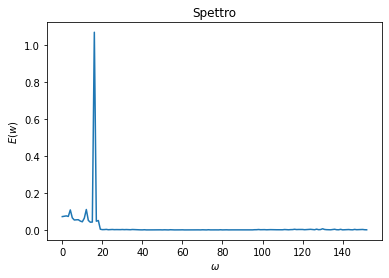

/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



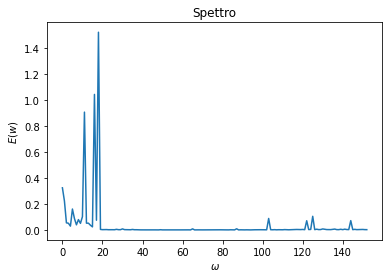

/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



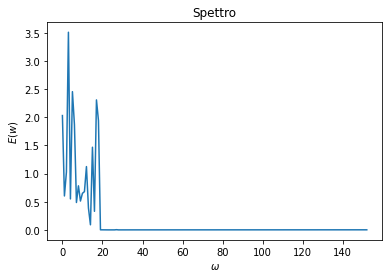

In [ ]:
y1=ifft(segnaleAD)
y2=ifft(segnaleMCI)
y3=ifft(segnaleHC)

w, Ew = spettro(y1)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y2)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y3)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()

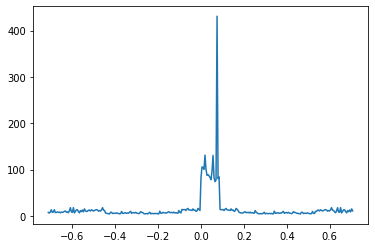

In [ ]:
ps = np.abs(segnaleAD)

time_step = 180/256
freqs = fftfreq(304, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

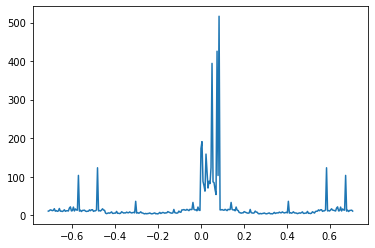

In [ ]:
ps = np.abs(segnaleMCI)

time_step = 180/256
freqs = fftfreq(304, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

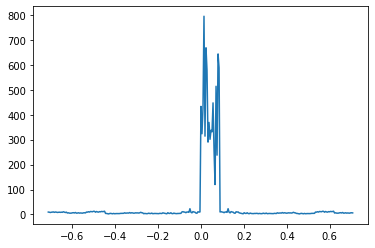

In [ ]:
ps = np.abs(segnaleHC)

time_step = 180/256
freqs = fftfreq(304, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

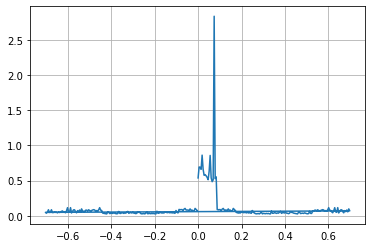

In [ ]:

# Number of sample points
N = 304
# sample spacing
T = 1.0 / 180.0
T = 128.0 / 180.0
x = np.linspace(0.0, N*T, N, endpoint=False)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = segnaleAD
#xf = fftfreq(N, T)[:N//2]
xf = fftfreq(N, T)

#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf))
plt.grid()
plt.show()

## prova 3 segnale paziente, come media delle energie dei segnali singoli elettrodi

In [ ]:
pazientiAD=df_AD.loc[:, "Four_1":"Four_304"]
pazientiMCI=df_MCI.loc[:, "Four_1":"Four_304"]
pazientiHC=df_HC.loc[:, "Four_1":"Four_304"]

In [ ]:
pazienteAD=pazientiAD.iloc[0,]
pazienteMCI=pazientiMCI.iloc[0,]
pazienteHC=pazientiHC.iloc[0,]

In [ ]:
n=len(pazientiHC)
n

23

In [ ]:
matriceAD = np.zeros((len(pazientiAD),16))
matriceMCI = np.zeros((len(pazientiMCI),16))
matriceHC = np.zeros((len(pazientiHC),16))


In [ ]:
segnalemedioAD=np.arange(0,16,1.0)
segnalemedioMCI=np.arange(0,16,1.0)
segnalemedioHC=np.arange(0,16,1.0)

In [ ]:
devAD=np.arange(0,16,1.0)
devMCI=np.arange(0,16,1.0)
devHC=np.arange(0,16,1.0)

In [ ]:
def media_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")
    if ntest==2:
       dati=pazientiMCI   
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
    
    n=len(dati)
    if n==304:
       n=1 

    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()
        e=19
        i=0
        f=16
        indice=0
        matricesegnale = np.zeros((19,16))
        for elettrodo in range(e):
            vettore=np.array(abs(pvettore[i:f]))
            #print("indici", i,f,elettrodo,len(vettore)) 
            #print(vettore)  
            matricesegnale[elettrodo,]=vettore
            i=f
            f=f+16
            indice=indice+1
    
        signmedio=np.arange(0,16,1.0)
        
        for k in range(len(signmedio)):
              signmedio[k]=np.mean(matricesegnale[:,k])    

        if ntest==1:
               matriceAD[riga,]=signmedio
        if ntest==2:
               matriceMCI[riga,]=signmedio
        if ntest==3:
               matriceHC[riga,]=signmedio

    
    if ntest==1:
       for z in range(len(segnalemedioAD)):
             segnalemedioAD[z]=np.mean(matriceAD[:,z]) 
             devAD[z]=np.std(matriceAD[:,z])    
    if ntest==2:
       for z in range(len(segnalemedioMCI)):
             segnalemedioMCI[z]=np.mean(matriceMCI[:,z])   
             devMCI[z]=np.std(matriceMCI[:,z])    
    if ntest==3:
       for z in range(len(segnalemedioHC)):
             segnalemedioHC[z]=np.mean(matriceHC[:,z])  
             devHC[z]=np.std(matriceHC[:,z])      
   

In [ ]:
energiasegnale=np.arange(0,19,1.0)
energiaAD=np.arange(0,(len(pazientiAD)),1.0)
energiaMCI=np.arange(0,(len(pazientiMCI)),1.0)
energiaHC=np.arange(0,(len(pazientiHC)),1.0)

In [ ]:
def energia_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")
    if ntest==2:
       dati=pazientiMCI   
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
    
    n=len(dati)
    if n==304:
       n=1 
     
    n=1 
    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()
        e=19
        i=0
        f=16
        indice=0
        matricesegnale = np.zeros((19,16))
        for elettrodo in range(e):
            vettore=np.array(abs(pvettore[i:f]))
            #print("indici", i,f,elettrodo,len(vettore)) 
            #print(vettore)  
            matricesegnale[elettrodo,]=vettore
            i=f
            f=f+16
            indice=indice+1
    
        signmedio=np.arange(0,19,1.0)
        
        for k in range(len(signmedio)):
              signmedio[k]=np.sum(matricesegnale[:,k])    

        if ntest==1:
               matriceAD[riga,]=signmedio
        if ntest==2:
               matriceMCI[riga,]=signmedio
        if ntest==3:
               matriceHC[riga,]=signmedio

    
    if ntest==1:
       for z in range(len(energiaAD)):
             energiasegnale=matriceAD[z,:]
             #print("AD paziente :",z)
             #print("segnale AD",energiasegnale)
             energiasegnale **=2  
             #print("segnale AD **2",energiasegnale)
             energiaAD[z]=np.sum(energiasegnale)
             #print("energia AD", energiaAD[z])

    if ntest==2:
       for z in range(len(energiaMCI)):
             energiasegnale=(matriceMCI[z,:]) 
             energiasegnale **=2  
             energiaMCI[z]=np.sum(energiasegnale)
                 
    if ntest==3:
       for z in range(len(energiaHC)):
             energiasegnale=(matriceHC[z,:])
             energiasegnale **=2  
             energiaHC[z]=np.sum(energiasegnale)
            
                   
   

In [ ]:
energia_Fourier(1)

AD


In [ ]:
energia_Fourier(2)

MCI


In [ ]:
energia_Fourier(3)

HC


In [ ]:
for i in range(len(energiaAD)):
      print("paziente :", i, " energia: ",energiaAD[i]) 
      

paziente : 0  energia:  42283.16327140444
paziente : 1  energia:  10233.302761689753
paziente : 2  energia:  1878.4649245983383
paziente : 3  energia:  2855.221825936288
paziente : 4  energia:  3228.9421941828255
paziente : 5  energia:  1874.646142504155
paziente : 6  energia:  1741.1644858531859
paziente : 7  energia:  1695.5408285844876
paziente : 8  energia:  2831.6845913628804
paziente : 9  energia:  1823.9639373905816
paziente : 10  energia:  3321.8169483241
paziente : 11  energia:  2207.329803806094
paziente : 12  energia:  9469.035631290859
paziente : 13  energia:  3578.66317596676
paziente : 14  energia:  1087.8470913739611
paziente : 15  energia:  15714.648511119112
paziente : 16  energia:  510.0810843628809
paziente : 17  energia:  1598.7564385540165
paziente : 18  energia:  5300.444698717451
paziente : 19  energia:  886.9236247174515
paziente : 20  energia:  2171.7897216481997
paziente : 21  energia:  92717.41706165098
paziente : 22  energia:  9383.052704429363
paziente : 23

In [ ]:
for i in range(len(energiaMCI)):
      print("paziente :", i, " energia: ",energiaMCI[i]) 

paziente : 0  energia:  351.5331007451524
paziente : 1  energia:  2001.2158732382272
paziente : 2  energia:  3641.6386738919664
paziente : 3  energia:  4661.384602387811
paziente : 4  energia:  9771.693239202217
paziente : 5  energia:  3958.055023925207
paziente : 6  energia:  3643.6594358864263
paziente : 7  energia:  7368.753545759003
paziente : 8  energia:  4020.916548831024
paziente : 9  energia:  3442.5413267479225
paziente : 10  energia:  9245.389821720222
paziente : 11  energia:  577788.2398701358
paziente : 12  energia:  2956.8291374542937
paziente : 13  energia:  1351.546349373961
paziente : 14  energia:  2034.8752653379497
paziente : 15  energia:  2099.2336494847646
paziente : 16  energia:  5787.202728728533
paziente : 17  energia:  1075.308546038781
paziente : 18  energia:  1102.3852737922437
paziente : 19  energia:  418485.7294547811
paziente : 20  energia:  79970.19293426315
paziente : 21  energia:  491.28996785872573
paziente : 22  energia:  9974.872114531852
paziente : 2

In [ ]:
for i in range(len(energiaHC)):
      print("paziente :", i, " energia: ",energiaHC[i])

paziente : 0  energia:  1552.4784723434905
paziente : 1  energia:  2272.479324088643
paziente : 2  energia:  745.3494286204987
paziente : 3  energia:  86670.45212529642
paziente : 4  energia:  1790.283208191136
paziente : 5  energia:  296.18954321329636
paziente : 6  energia:  5961.945906825485
paziente : 7  energia:  2039.8736025761773
paziente : 8  energia:  156.83976353739612
paziente : 9  energia:  1775.7487601828257
paziente : 10  energia:  275.83843978116346
paziente : 11  energia:  236.1860162963989
paziente : 12  energia:  1744.872775833795
paziente : 13  energia:  769.7503128448755
paziente : 14  energia:  2792.755902371191
paziente : 15  energia:  10327.636113307479
paziente : 16  energia:  9139.029110387812
paziente : 17  energia:  984189.2738552853
paziente : 18  energia:  34433.670402686985
paziente : 19  energia:  373970.60665406636
paziente : 20  energia:  590896.094537701
paziente : 21  energia:  26307.896934634333
paziente : 22  energia:  37300.59207685873


In [ ]:
media_Fourier(1)


AD


In [ ]:
media_Fourier(2)

MCI


In [ ]:
media_Fourier(3)

HC


In [ ]:
segnalemedioAD,segnalemedioMCI,segnalemedioHC

(array([34.15036627, 17.32807304, 17.39347798, 13.51720945, 15.59014393,
        13.40228786, 12.5925145 , 12.71568851, 12.74801289, 12.07863265,
        11.99173899, 13.13404726, 14.66112782, 12.86480236, 13.08340924,
        12.57017508]),
 array([44.04738407, 24.21047084, 39.71131294, 13.34105832, 12.10764865,
        17.54842105, 19.24651209, 13.978899  , 14.53747653, 18.19272404,
        14.90098435, 29.7723101 , 13.1009303 , 20.02045661, 14.03615932,
        13.18313087]),
 array([41.40046911, 56.43321053, 59.13693135, 48.44436156, 23.17198627,
        42.21965217, 36.67946911, 20.95191076, 25.53417849, 21.89272311,
        23.64353318, 24.07896339, 29.66003432, 19.8690389 , 12.91432494,
        33.82556979]))

In [ ]:
devAD,devMCI,devHC

(array([124.08971829,  17.28521107,  21.42381929,  13.39730446,
         25.69588295,   8.09240267,   8.10714277,   9.37322439,
          9.26527428,   9.03187509,   8.86459315,   9.42621234,
         18.57470049,   9.23483982,   9.49067246,   9.15839596]),
 array([107.83976154,  39.22666491, 148.94008292,   9.18906236,
          7.92253968,  15.3250682 ,  33.24044069,  13.82806846,
         11.95469329,  36.35577535,  18.8741169 ,  94.28757606,
          9.04047474,  38.88832222,  10.86009406,  11.60268652]),
 array([ 70.33428188, 118.11502553, 121.14024961, 105.97943392,
         52.89839106,  73.88363453,  58.73441562,  31.1963616 ,
         56.87776917,  28.15062783,  41.63022457,  34.93940681,
         57.38246451,  29.32085   ,  14.61882814,  77.83968153]))

In [ ]:
energiaAD=0
for i in range(len(segnalemedioAD)):
         energiaAD=energiaAD+pow(abs(segnalemedioAD[i]),2) 
energiaAD            

4029.0386313490303

In [ ]:
energiaMCI=0
for i in range(len(segnalemedioMCI)):
         energiaMCI=energiaMCI+pow(abs(segnalemedioMCI[i]),2) 
energiaMCI   

7895.676217484413

In [ ]:
energiaHC=0
for i in range(len(segnalemedioHC)):
         energiaHC=energiaHC+pow(abs(segnalemedioHC[i]),2) 
energiaHC   

19702.088943512033

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



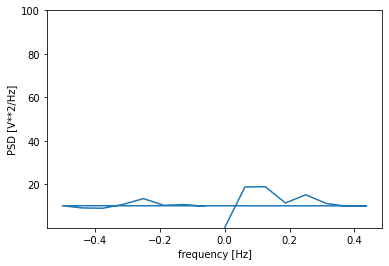

In [ ]:
f, Pxx_den = signal.periodogram(ifft(segnalemedioAD))
#plt.semilogy(f, Pxx_den)
plt.plot(f,Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



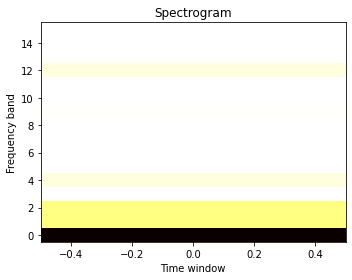

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioAD))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
         0.4375, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625]), array([8.]), array([[0.07764371],
        [0.10310788],
        [0.40013972],
        [0.05194327],
        [1.58247506],
        [0.00250928],
        [0.05063408],
        [0.03323141],
        [0.11140532],
        [0.00400014],
        [0.01029922],
        [0.01195177],
        [0.16360272],
        [0.00778512],
        [0.03728581],
        [0.00700407]]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



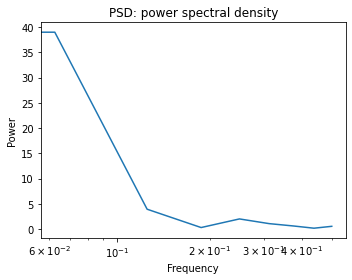

In [ ]:
freqs, psd = signal.welch(segnalemedioAD)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([11.28702747,  1.13309103,  8.96534752,  2.53880381,  3.23210169,
         1.04343454,  4.15328606,  0.82374543,  0.22406338]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



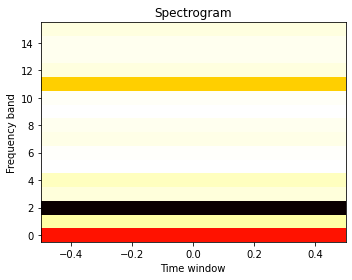

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioMCI))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
         0.4375, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625]), array([8.]), array([[1.58327363e+00],
        [1.97132157e+00],
        [3.19651472e+01],
        [9.72106651e-01],
        [1.10212297e+00],
        [7.47969613e-01],
        [4.62214046e+00],
        [3.47918758e-01],
        [3.72471087e-01],
        [3.48881241e+00],
        [1.13611864e-01],
        [1.82764568e+01],
        [1.95526382e-02],
        [2.15737304e+00],
        [3.79007056e-02],
        [3.82863943e-01]]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



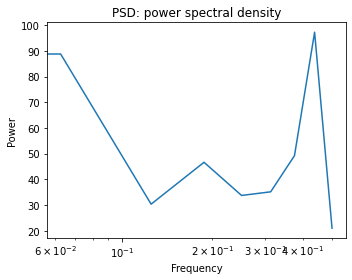

In [ ]:
freqs, psd = signal.welch(segnalemedioMCI)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([7.77640302e+01, 6.85844721e+01, 7.55521392e+01, 2.31007640e+02,
        9.78182876e+01, 2.63729036e+01, 1.02486076e+02, 4.19302787e+01,
        5.58839393e-02]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



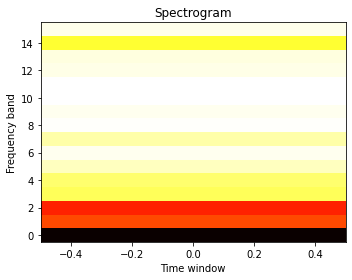

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnalemedioHC))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
         0.4375, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625]), array([8.]), array([[ 8.66572049],
        [14.78236614],
        [ 5.30068586],
        [ 1.65634375],
        [ 0.36861669],
        [ 6.58742491],
        [ 1.61886981],
        [12.85713632],
        [ 2.71963818],
        [ 1.75172922],
        [ 1.84535891],
        [25.39429791],
        [12.62821301],
        [23.40856056],
        [ 2.21178474],
        [10.54912355]]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 16, using nperseg = 16



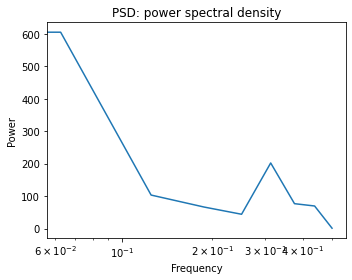

In [ ]:
freqs, psd = signal.welch(segnalemedioHC)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([ 36.41391251, 128.16515325,  11.23782486, 191.38313323,
        413.30923249, 258.65673247,  37.60957946, 269.70145666,
        200.01911934]))

In [ ]:
energiesegnaliAD=np.arange(0,len(pazientiAD),1.0)
energiesegnaliMCI=np.arange(0,len(pazientiMCI),1.0)
energiesegnaliHC=np.arange(0,len(pazientiHC),1.0)

In [ ]:
for i in range(len(energiesegnaliAD)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceAD[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliAD[i]=energia

In [ ]:
for i in range(len(energiesegnaliMCI)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceMCI[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliMCI[i]=energia

In [ ]:
for i in range(len(energiesegnaliHC)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceHC[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliHC[i]=energia

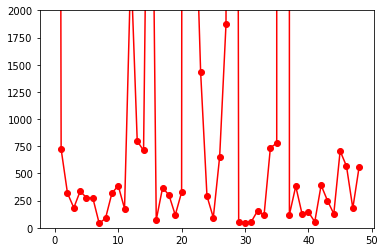

In [ ]:
x=np.arange(0,len(energiesegnaliAD),1)
plt.plot(x,energiesegnaliAD, color="red", marker="o")
#plt.ylim(0,2000)
plt.show()

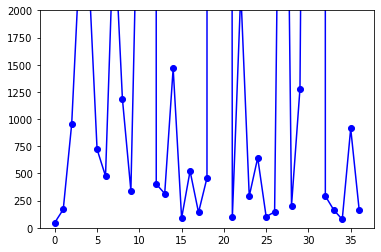

In [ ]:
x=np.arange(0,len(energiesegnaliMCI),1)
plt.plot(x,energiesegnaliMCI, color="blue", marker="o")
#plt.ylim(0,2000)
plt.show()

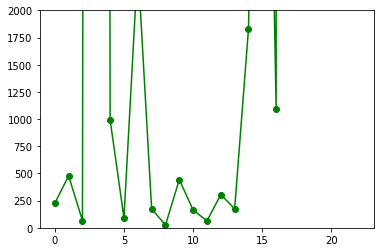

In [ ]:
x=np.arange(0,len(energiesegnaliHC),1)
plt.plot(x,energiesegnaliHC, color="green", marker="o")
#plt.ylim(0,2000)
plt.show()

In [ ]:
plt.magnitude_spectrum(2*fadp11,n)
plt.xlim(0,xmax)
plt.title("1 FP1")
plt.show()

NameError: ignored

In [ ]:
def spettro(f):
    N = len(f)                       # Lunghezza del vettore di partenza
    Nf = int( N / 2 )                # Frequenza di Nyquist
    om = np.linspace(0.0, Nf, Nf+1)  # Vettore di output contenente le frequenze
    sp = np.zeros(Nf+1)              # Vettore di output contenente lo spettro
    ak = np.fft.rfft(f) / N          # Trasformata del vettore di partenza (normalizzata!)
    for n in range(Nf+1):
        if n == 0:
            sp[n] = np.square(np.abs(ak[n]))
        else:
            sp[n] = 2.0 * np.square(np.abs(ak[n]))
    return om, sp



/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



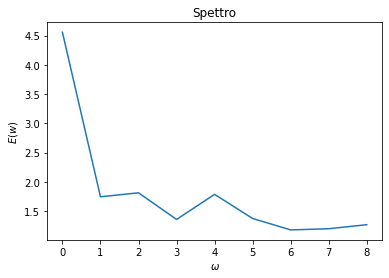

/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



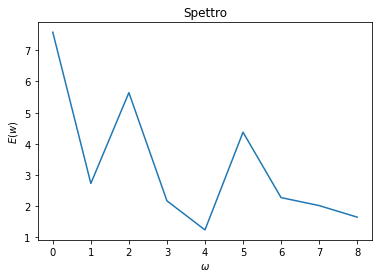

/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



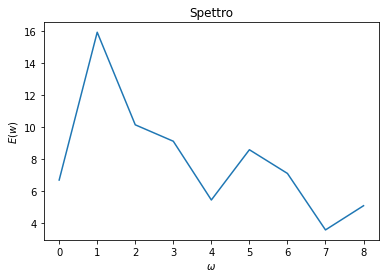

In [ ]:
y1=ifft(segnalemedioAD)
y2=ifft(segnalemedioMCI)
y3=ifft(segnalemedioHC)

w, Ew = spettro(y1)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y2)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y3)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()

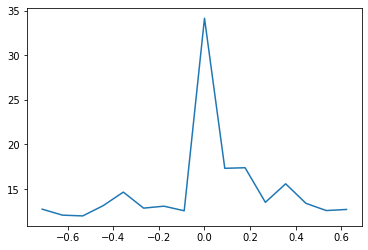

In [ ]:
ps = np.abs(segnalemedioAD)

time_step = 180/256
freqs = fftfreq(16, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

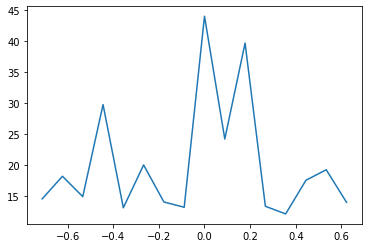

In [ ]:
ps = np.abs(segnalemedioMCI)

time_step = 180/256
freqs = fftfreq(16, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

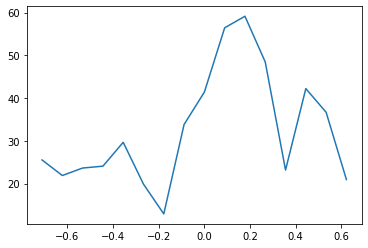

In [ ]:
ps = np.abs(segnalemedioHC)

time_step = 180/256
freqs = fftfreq(16, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

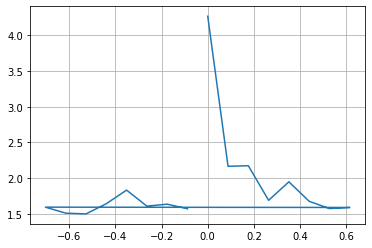

In [ ]:

# Number of sample points
N = 16
# sample spacing
T = 1.0 / 180.0
T = 128.0 / 180.0
x = np.linspace(0.0, N*T, N, endpoint=False)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = segnalemedioAD
#xf = fftfreq(N, T)[:N//2]
xf = fftfreq(N, T)

#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf))
plt.grid()
plt.show()

In [ ]:
pazientiAD=df_AD.loc[:, "Four_1":"Four_304"]
pazientiMCI=df_MCI.loc[:, "Four_1":"Four_304"]
pazientiHC=df_HC.loc[:, "Four_1":"Four_304"]

In [ ]:
pazienteAD=pazientiAD.iloc[0,]
pazienteMCI=pazientiMCI.iloc[0,]
pazienteHC=pazientiHC.iloc[0,]

In [ ]:
n=len(pazientiHC)
n

23

In [ ]:
matriceAD = np.zeros((len(pazientiAD),304))
matriceMCI = np.zeros((len(pazientiMCI),304))
matriceHC = np.zeros((len(pazientiHC),304))


In [ ]:
segnaleAD=np.arange(0,304,1.0)
segnaleMCI=np.arange(0,304,1.0)
segnaleHC=np.arange(0,304,1.0)

304

In [ ]:
def media_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")
    if ntest==2:
       dati=pazientiMCI   
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
    
    n=len(dati)
    if n==304:
       n=1 

    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()

        if ntest==1:
               matriceAD[riga,]=abs(pvettore)
        if ntest==2:
               matriceMCI[riga,]=abs(pvettore)
        if ntest==3:
               matriceHC[riga,]=abs(pvettore)

        
        
    
    if ntest==1:
       for z in range(len(segnaleAD)):
             segnaleAD[z]=np.mean(matriceAD[:,z])    
    if ntest==2:
       for z in range(len(segnaleMCI)):
             segnaleMCI[z]=np.mean(matriceMCI[:,z])       
    if ntest==3:
       for z in range(len(segnaleHC)):
             segnaleHC[z]=np.mean(matriceHC[:,z])        
   

array([ 81.90081633, 105.49183673, 105.04467347, 100.46483673,
       131.11320408, 100.50320408,  87.49063265,  89.01442857,
        86.39310204,  83.04281633,  78.08706122,  96.41428571,
       130.49534694,  81.97138776,  73.80830612,  77.65957143,
       431.11957143,  80.45718367,  84.20697959,  13.82030612,
        13.24326531,  13.30191837,  13.56134694,  11.44840816,
        14.50408163,  16.0485102 ,  12.68797959,  12.5155102 ,
        12.54530612,  11.55265306,  15.02632653,  11.98967347,
        12.50822449,   9.80093878,  10.6174898 ,  16.07755102,
        13.72357143,  11.60561224,   7.45426531,   6.87846939,
         6.06857143,   6.41218367,   6.15234694,   7.97955102,
         8.86585714,   6.77789796,   7.08022449,   7.54306122,
         6.34236735,   7.99902041,   6.14046939,   6.85214286,
         6.15087755,   5.5164898 ,  11.47787755,   7.52734694,
         6.28546939,   4.85583673,   4.32402041,   4.66579592,
         4.94457143,   4.18636735,   5.86046939,   7.69

In [ ]:
media_Fourier(1)


AD


In [ ]:
media_Fourier(2)

MCI


In [ ]:
media_Fourier(3)

HC


In [ ]:
segnaleAD,segnaleMCI,segnaleHC

In [ ]:
energiaAD=0
for i in range(len(segnaleAD)):
         energiaAD=energiaAD+pow(segnaleAD[i],2) 
energiaAD            

370578.84168975154

In [ ]:
energiaMCI=0
for i in range(len(segnaleMCI)):
         energiaMCI=energiaMCI+pow(segnaleMCI[i],2) 
energiaMCI   

877487.2279242593

In [ ]:
energiaHC=0
for i in range(len(segnaleHC)):
         energiaHC=energiaHC+pow(segnaleHC[i],2) 
energiaHC   

3895974.758966754

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



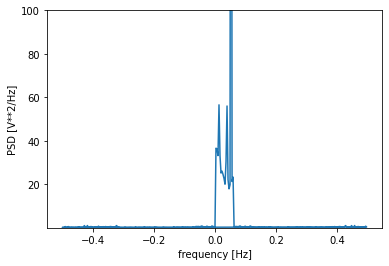

In [ ]:
f, Pxx_den = signal.periodogram(ifft(segnaleAD))
#plt.semilogy(f, Pxx_den)
plt.plot(f,Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



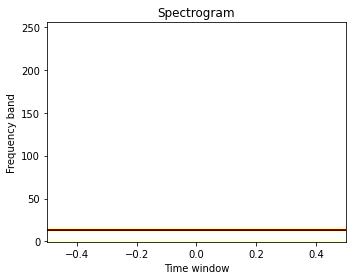

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnaleAD))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.        ,  0.00390625,  0.0078125 ,  0.01171875,  0.015625  ,
         0.01953125,  0.0234375 ,  0.02734375,  0.03125   ,  0.03515625,
         0.0390625 ,  0.04296875,  0.046875  ,  0.05078125,  0.0546875 ,
         0.05859375,  0.0625    ,  0.06640625,  0.0703125 ,  0.07421875,
         0.078125  ,  0.08203125,  0.0859375 ,  0.08984375,  0.09375   ,
         0.09765625,  0.1015625 ,  0.10546875,  0.109375  ,  0.11328125,
         0.1171875 ,  0.12109375,  0.125     ,  0.12890625,  0.1328125 ,
         0.13671875,  0.140625  ,  0.14453125,  0.1484375 ,  0.15234375,
         0.15625   ,  0.16015625,  0.1640625 ,  0.16796875,  0.171875  ,
         0.17578125,  0.1796875 ,  0.18359375,  0.1875    ,  0.19140625,
         0.1953125 ,  0.19921875,  0.203125  ,  0.20703125,  0.2109375 ,
         0.21484375,  0.21875   ,  0.22265625,  0.2265625 ,  0.23046875,
         0.234375  ,  0.23828125,  0.2421875 ,  0.24609375,  0.25      ,
         0.25390625,  0.2578125 ,  0.26171875,  0.2

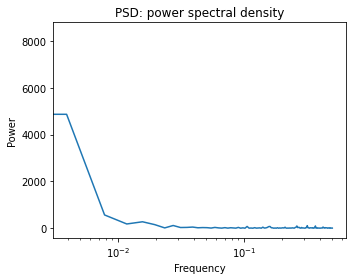

In [ ]:
freqs, psd = signal.welch(segnaleAD)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

(array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
        0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
        0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
        0.05859375, 0.0625    , 0.06640625, 0.0703125 , 0.07421875,
        0.078125  , 0.08203125, 0.0859375 , 0.08984375, 0.09375   ,
        0.09765625, 0.1015625 , 0.10546875, 0.109375  , 0.11328125,
        0.1171875 , 0.12109375, 0.125     , 0.12890625, 0.1328125 ,
        0.13671875, 0.140625  , 0.14453125, 0.1484375 , 0.15234375,
        0.15625   , 0.16015625, 0.1640625 , 0.16796875, 0.171875  ,
        0.17578125, 0.1796875 , 0.18359375, 0.1875    , 0.19140625,
        0.1953125 , 0.19921875, 0.203125  , 0.20703125, 0.2109375 ,
        0.21484375, 0.21875   , 0.22265625, 0.2265625 , 0.23046875,
        0.234375  , 0.23828125, 0.2421875 , 0.24609375, 0.25      ,
        0.25390625, 0.2578125 , 0.26171875, 0.265625  , 0.26953125,
        0.2734375 , 0.27734375, 0.28125   , 0.28

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



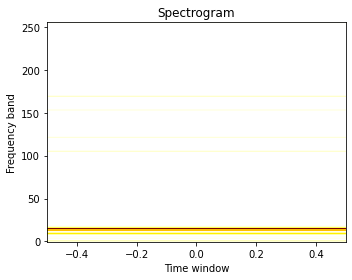

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnaleMCI))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
         0.4375, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625]), array([8.]), array([[1.58327363e+00],
        [1.97132157e+00],
        [3.19651472e+01],
        [9.72106651e-01],
        [1.10212297e+00],
        [7.47969613e-01],
        [4.62214046e+00],
        [3.47918758e-01],
        [3.72471087e-01],
        [3.48881241e+00],
        [1.13611864e-01],
        [1.82764568e+01],
        [1.95526382e-02],
        [2.15737304e+00],
        [3.79007056e-02],
        [3.82863943e-01]]))

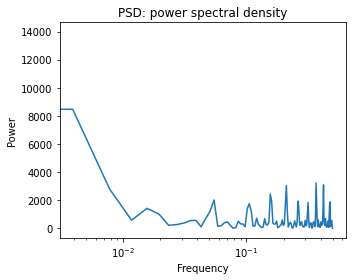

In [ ]:
freqs, psd = signal.welch(segnaleMCI)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([7.77640302e+01, 6.85844721e+01, 7.55521392e+01, 2.31007640e+02,
        9.78182876e+01, 2.63729036e+01, 1.02486076e+02, 4.19302787e+01,
        5.58839393e-02]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



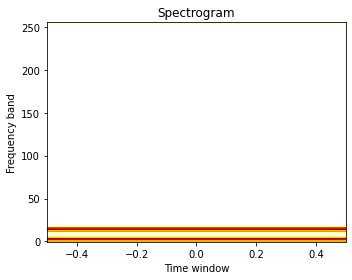

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnaleHC))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

(array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
         0.4375, -0.5   , -0.4375, -0.375 , -0.3125, -0.25  , -0.1875,
        -0.125 , -0.0625]), array([8.]), array([[ 8.66572049],
        [14.78236614],
        [ 5.30068586],
        [ 1.65634375],
        [ 0.36861669],
        [ 6.58742491],
        [ 1.61886981],
        [12.85713632],
        [ 2.71963818],
        [ 1.75172922],
        [ 1.84535891],
        [25.39429791],
        [12.62821301],
        [23.40856056],
        [ 2.21178474],
        [10.54912355]]))

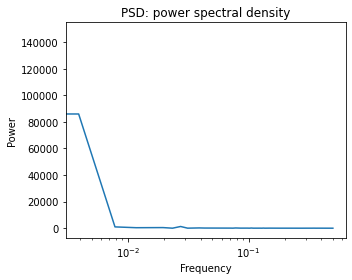

In [ ]:
freqs, psd = signal.welch(segnaleHC)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([ 36.41391251, 128.16515325,  11.23782486, 191.38313323,
        413.30923249, 258.65673247,  37.60957946, 269.70145666,
        200.01911934]))

In [ ]:
energiesegnaliAD=np.arange(0,len(pazientiAD),1.0)
energiesegnaliMCI=np.arange(0,len(pazientiMCI),1.0)
energiesegnaliHC=np.arange(0,len(pazientiHC),1.0)

In [ ]:
for i in range(len(energiesegnaliAD)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceAD[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliAD[i]=energia

In [ ]:
for i in range(len(energiesegnaliMCI)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceMCI[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliMCI[i]=energia

In [ ]:
for i in range(len(energiesegnaliHC)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceHC[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliHC[i]=energia

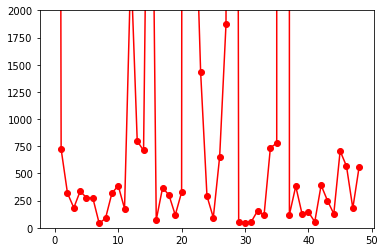

In [ ]:
x=np.arange(0,len(energiesegnaliAD),1)
plt.plot(x,energiesegnaliAD, color="red", marker="o")
#plt.ylim(0,2000)
plt.show()

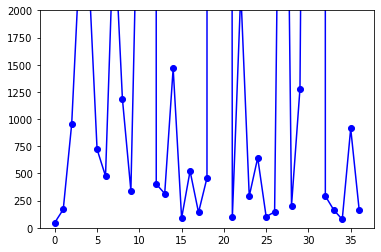

In [ ]:
x=np.arange(0,len(energiesegnaliMCI),1)
plt.plot(x,energiesegnaliMCI, color="blue", marker="o")
#plt.ylim(0,2000)
plt.show()

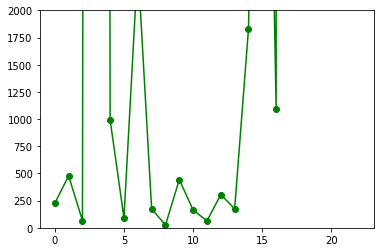

In [ ]:
x=np.arange(0,len(energiesegnaliHC),1)
plt.plot(x,energiesegnaliHC, color="green", marker="o")
#plt.ylim(0,2000)
plt.show()

In [ ]:
plt.magnitude_spectrum(2*fadp11,n)
plt.xlim(0,xmax)
plt.title("1 FP1")
plt.show()

NameError: ignored

In [ ]:
def spettro(f):
    N = len(f)                       # Lunghezza del vettore di partenza
    Nf = int( N / 2 )                # Frequenza di Nyquist
    om = np.linspace(0.0, Nf, Nf+1)  # Vettore di output contenente le frequenze
    sp = np.zeros(Nf+1)              # Vettore di output contenente lo spettro
    ak = np.fft.rfft(f) / N          # Trasformata del vettore di partenza (normalizzata!)
    for n in range(Nf+1):
        if n == 0:
            sp[n] = np.square(np.abs(ak[n]))
        else:
            sp[n] = 2.0 * np.square(np.abs(ak[n]))
    return om, sp



/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



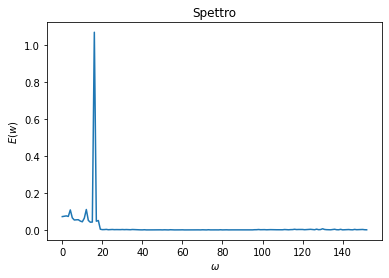

/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



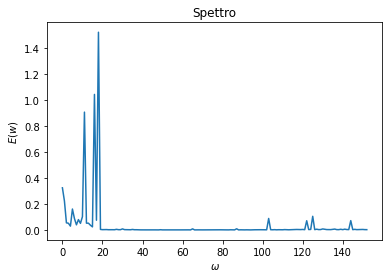

/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



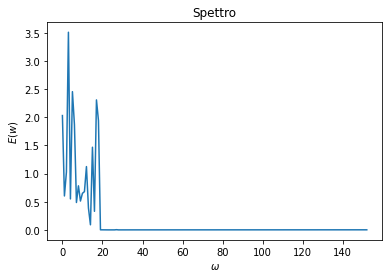

In [ ]:
y1=ifft(segnaleAD)
y2=ifft(segnaleMCI)
y3=ifft(segnaleHC)

w, Ew = spettro(y1)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y2)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y3)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()

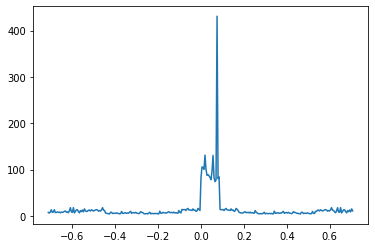

In [ ]:
ps = np.abs(segnaleAD)

time_step = 180/256
freqs = fftfreq(304, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

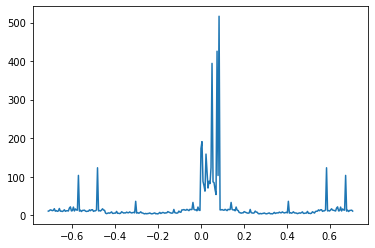

In [ ]:
ps = np.abs(segnaleMCI)

time_step = 180/256
freqs = fftfreq(304, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

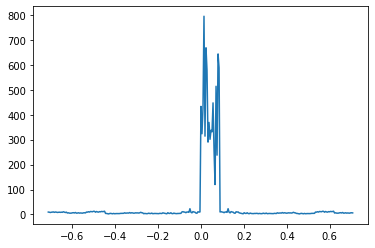

In [ ]:
ps = np.abs(segnaleHC)

time_step = 180/256
freqs = fftfreq(304, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

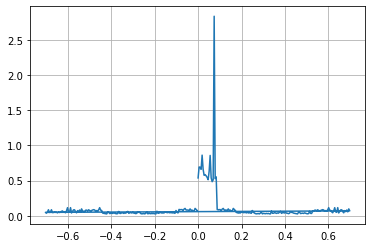

In [ ]:

# Number of sample points
N = 304
# sample spacing
T = 1.0 / 180.0
T = 128.0 / 180.0
x = np.linspace(0.0, N*T, N, endpoint=False)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = segnaleAD
#xf = fftfreq(N, T)[:N//2]
xf = fftfreq(N, T)

#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf))
plt.grid()
plt.show()

## prova 4 segnale paziente come l'unione dei segnali dei singoli elettrodi facendi la mediana, e segnale totale classe come media dei segnali, con valori assoluti

In [ ]:
pazientiAD=df_AD.loc[:, "Four_1":"Four_304"]
pazientiMCI=df_MCI.loc[:, "Four_1":"Four_304"]
pazientiHC=df_HC.loc[:, "Four_1":"Four_304"]

In [ ]:
pazienteAD=pazientiAD.iloc[0,]
pazienteMCI=pazientiMCI.iloc[0,]
pazienteHC=pazientiHC.iloc[0,]

In [ ]:
n=len(pazientiHC)
n

23

In [ ]:
matriceAD = np.zeros((len(pazientiAD),304))
matriceMCI = np.zeros((len(pazientiMCI),304))
matriceHC = np.zeros((len(pazientiHC),304))


In [ ]:
segnaleAD=np.arange(0,304,1.0)
segnaleMCI=np.arange(0,304,1.0)
segnaleHC=np.arange(0,304,1.0)

304

In [ ]:
def media_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")
    if ntest==2:
       dati=pazientiMCI   
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
    
    n=len(dati)
    if n==304:
       n=1 

    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()

        if ntest==1:
               matriceAD[riga,]=abs(pvettore)
        if ntest==2:
               matriceMCI[riga,]=abs(pvettore)
        if ntest==3:
               matriceHC[riga,]=abs(pvettore)

        
        
    
    if ntest==1:
       for z in range(len(segnaleAD)):
             segnaleAD[z]=np.mean(matriceAD[:,z])    
    if ntest==2:
       for z in range(len(segnaleMCI)):
             segnaleMCI[z]=np.mean(matriceMCI[:,z])       
    if ntest==3:
       for z in range(len(segnaleHC)):
             segnaleHC[z]=np.mean(matriceHC[:,z])        
   

In [ ]:
media_Fourier(1)


AD


In [ ]:
media_Fourier(2)

MCI


In [ ]:
media_Fourier(3)

HC


In [ ]:
segnaleAD,segnaleMCI,segnaleHC

In [ ]:
energiaAD=0
for i in range(len(segnaleAD)):
         energiaAD=energiaAD+pow(segnaleAD[i],2) 
energiaAD            

370578.84168975154

In [ ]:
energiaMCI=0
for i in range(len(segnaleMCI)):
         energiaMCI=energiaMCI+pow(segnaleMCI[i],2) 
energiaMCI   

877487.2279242593

In [ ]:
energiaHC=0
for i in range(len(segnaleHC)):
         energiaHC=energiaHC+pow(segnaleHC[i],2) 
energiaHC   

3895974.758966754

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



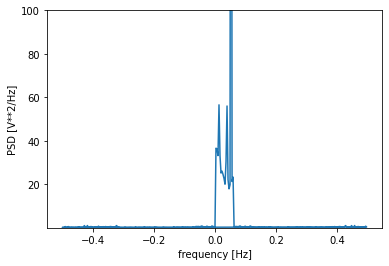

In [ ]:
f, Pxx_den = signal.periodogram(ifft(segnaleAD))
#plt.semilogy(f, Pxx_den)
plt.plot(f,Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



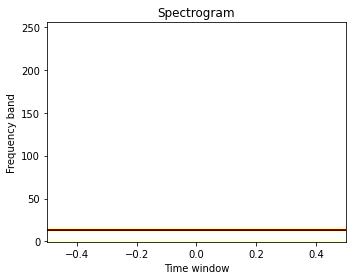

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnaleAD))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

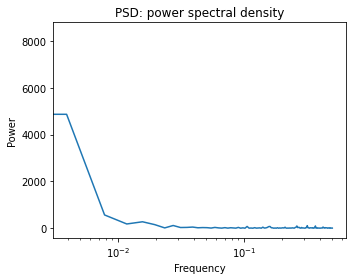

In [ ]:
freqs, psd = signal.welch(segnaleAD)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



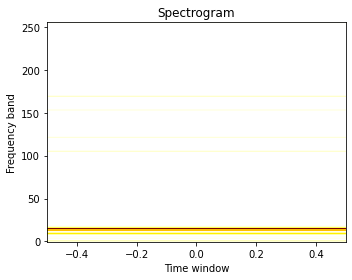

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnaleMCI))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

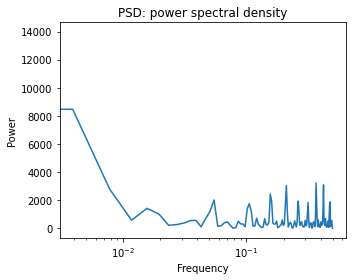

In [ ]:
freqs, psd = signal.welch(segnaleMCI)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



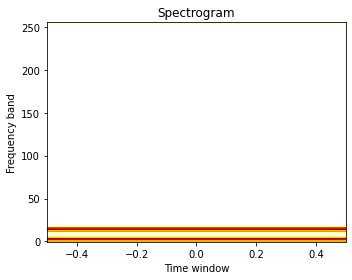

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnaleHC))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

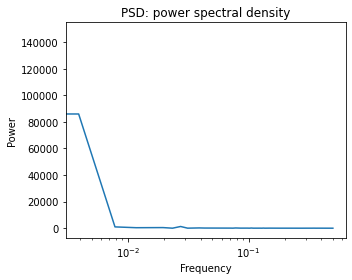

In [ ]:
freqs, psd = signal.welch(segnaleHC)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([ 36.41391251, 128.16515325,  11.23782486, 191.38313323,
        413.30923249, 258.65673247,  37.60957946, 269.70145666,
        200.01911934]))

In [ ]:
energiesegnaliAD=np.arange(0,len(pazientiAD),1.0)
energiesegnaliMCI=np.arange(0,len(pazientiMCI),1.0)
energiesegnaliHC=np.arange(0,len(pazientiHC),1.0)

In [ ]:
for i in range(len(energiesegnaliAD)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceAD[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliAD[i]=energia

In [ ]:
for i in range(len(energiesegnaliMCI)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceMCI[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliMCI[i]=energia

In [ ]:
for i in range(len(energiesegnaliHC)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceHC[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliHC[i]=energia

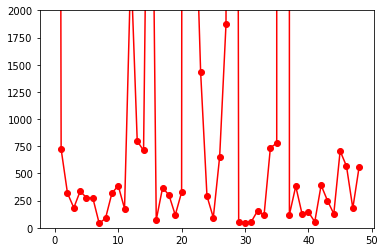

In [ ]:
x=np.arange(0,len(energiesegnaliAD),1)
plt.plot(x,energiesegnaliAD, color="red", marker="o")
#plt.ylim(0,2000)
plt.show()

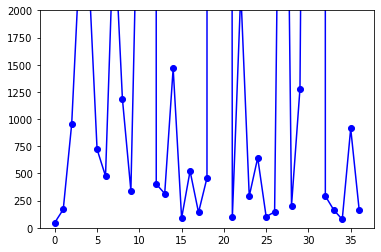

In [ ]:
x=np.arange(0,len(energiesegnaliMCI),1)
plt.plot(x,energiesegnaliMCI, color="blue", marker="o")
#plt.ylim(0,2000)
plt.show()

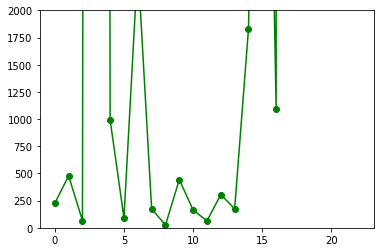

In [ ]:
x=np.arange(0,len(energiesegnaliHC),1)
plt.plot(x,energiesegnaliHC, color="green", marker="o")
#plt.ylim(0,2000)
plt.show()

In [ ]:
plt.magnitude_spectrum(2*fadp11,n)
plt.xlim(0,xmax)
plt.title("1 FP1")
plt.show()

NameError: ignored

In [ ]:
def spettro(f):
    N = len(f)                       # Lunghezza del vettore di partenza
    Nf = int( N / 2 )                # Frequenza di Nyquist
    om = np.linspace(0.0, Nf, Nf+1)  # Vettore di output contenente le frequenze
    sp = np.zeros(Nf+1)              # Vettore di output contenente lo spettro
    ak = np.fft.rfft(f) / N          # Trasformata del vettore di partenza (normalizzata!)
    for n in range(Nf+1):
        if n == 0:
            sp[n] = np.square(np.abs(ak[n]))
        else:
            sp[n] = 2.0 * np.square(np.abs(ak[n]))
    return om, sp



/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



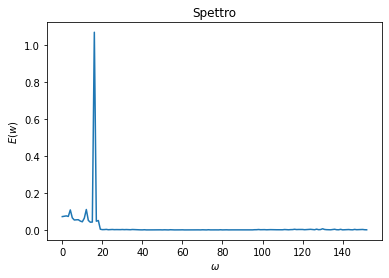

/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



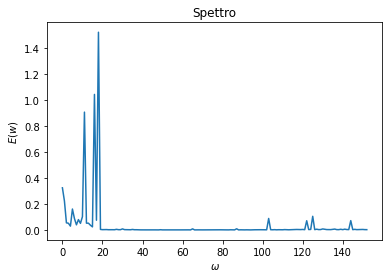

/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



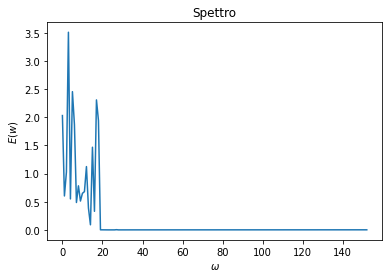

In [ ]:
y1=ifft(segnaleAD)
y2=ifft(segnaleMCI)
y3=ifft(segnaleHC)

w, Ew = spettro(y1)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y2)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y3)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()

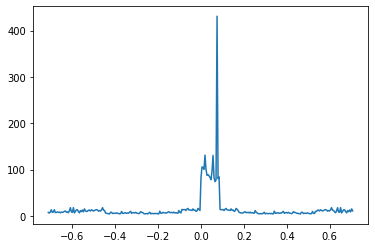

In [ ]:
ps = np.abs(segnaleAD)

time_step = 180/256
freqs = fftfreq(304, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

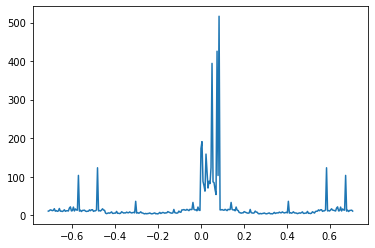

In [ ]:
ps = np.abs(segnaleMCI)

time_step = 180/256
freqs = fftfreq(304, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

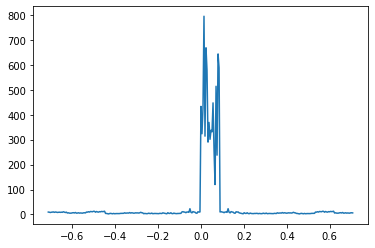

In [ ]:
ps = np.abs(segnaleHC)

time_step = 180/256
freqs = fftfreq(304, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

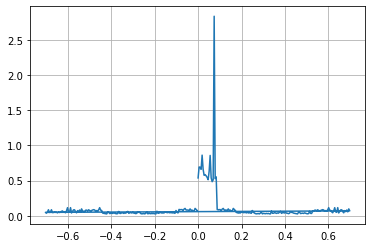

In [ ]:

# Number of sample points
N = 304
# sample spacing
T = 1.0 / 180.0
T = 128.0 / 180.0
x = np.linspace(0.0, N*T, N, endpoint=False)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = segnaleAD
#xf = fftfreq(N, T)[:N//2]
xf = fftfreq(N, T)

#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf))
plt.grid()
plt.show()

In [ ]:
pazientiAD=df_AD.loc[:, "Four_1":"Four_304"]
pazientiMCI=df_MCI.loc[:, "Four_1":"Four_304"]
pazientiHC=df_HC.loc[:, "Four_1":"Four_304"]

In [ ]:
pazienteAD=pazientiAD.iloc[0,]
pazienteMCI=pazientiMCI.iloc[0,]
pazienteHC=pazientiHC.iloc[0,]

In [ ]:
n=len(pazientiHC)
n

23

In [ ]:
matriceAD = np.zeros((len(pazientiAD),304))
matriceMCI = np.zeros((len(pazientiMCI),304))
matriceHC = np.zeros((len(pazientiHC),304))


In [ ]:
segnaleAD=np.arange(0,304,1.0)
segnaleMCI=np.arange(0,304,1.0)
segnaleHC=np.arange(0,304,1.0)

304

In [ ]:
def media_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")
    if ntest==2:
       dati=pazientiMCI   
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
    
    n=len(dati)
    if n==304:
       n=1 

    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()

        if ntest==1:
               matriceAD[riga,]=abs(pvettore)
        if ntest==2:
               matriceMCI[riga,]=abs(pvettore)
        if ntest==3:
               matriceHC[riga,]=abs(pvettore)

        
        
    
    if ntest==1:
       for z in range(len(segnaleAD)):
             segnaleAD[z]=np.mean(matriceAD[:,z])    
    if ntest==2:
       for z in range(len(segnaleMCI)):
             segnaleMCI[z]=np.mean(matriceMCI[:,z])       
    if ntest==3:
       for z in range(len(segnaleHC)):
             segnaleHC[z]=np.mean(matriceHC[:,z])        
   

In [ ]:
media_Fourier(1)


AD


In [ ]:
media_Fourier(2)

MCI


In [ ]:
media_Fourier(3)

HC


In [ ]:
segnaleAD,segnaleMCI,segnaleHC

In [ ]:
energiaAD=0
for i in range(len(segnaleAD)):
         energiaAD=energiaAD+pow(segnaleAD[i],2) 
energiaAD            

370578.84168975154

In [ ]:
energiaMCI=0
for i in range(len(segnaleMCI)):
         energiaMCI=energiaMCI+pow(segnaleMCI[i],2) 
energiaMCI   

877487.2279242593

In [ ]:
energiaHC=0
for i in range(len(segnaleHC)):
         energiaHC=energiaHC+pow(segnaleHC[i],2) 
energiaHC   

3895974.758966754

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



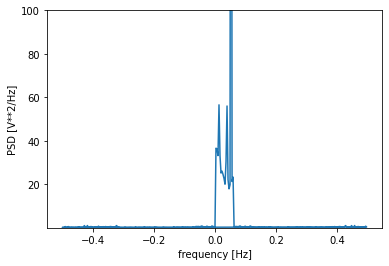

In [ ]:
f, Pxx_den = signal.periodogram(ifft(segnaleAD))
#plt.semilogy(f, Pxx_den)
plt.plot(f,Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



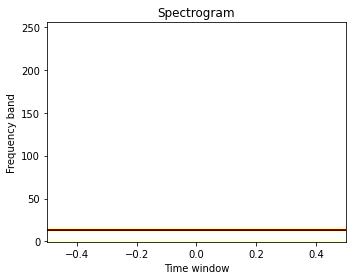

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnaleAD))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

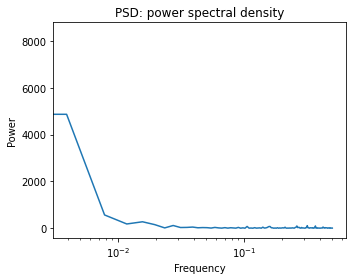

In [ ]:
freqs, psd = signal.welch(segnaleAD)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



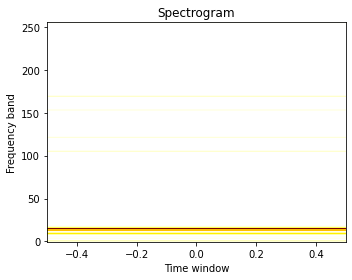

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnaleMCI))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

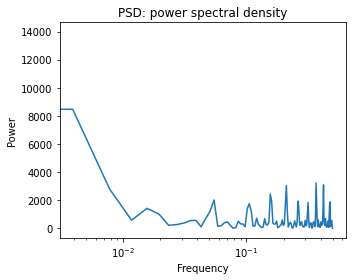

In [ ]:
freqs, psd = signal.welch(segnaleMCI)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd 

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



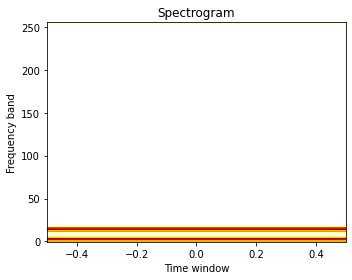

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(segnaleHC))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [ ]:
freqs, times, spectrogram

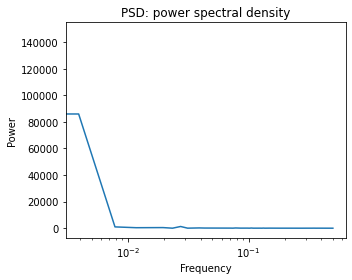

In [ ]:
freqs, psd = signal.welch(segnaleHC)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs, psd

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   ]),
 array([ 36.41391251, 128.16515325,  11.23782486, 191.38313323,
        413.30923249, 258.65673247,  37.60957946, 269.70145666,
        200.01911934]))

In [ ]:
energiesegnaliAD=np.arange(0,len(pazientiAD),1.0)
energiesegnaliMCI=np.arange(0,len(pazientiMCI),1.0)
energiesegnaliHC=np.arange(0,len(pazientiHC),1.0)

In [ ]:
for i in range(len(energiesegnaliAD)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceAD[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliAD[i]=energia

In [ ]:
for i in range(len(energiesegnaliMCI)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceMCI[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliMCI[i]=energia

In [ ]:
for i in range(len(energiesegnaliHC)):
      energia=0
      for k in range(16):
          energia=energia+pow(abs(matriceHC[i,k]),2)
      #print("paziente :", i,energia) 
      energiesegnaliHC[i]=energia

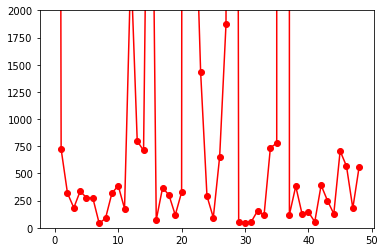

In [ ]:
x=np.arange(0,len(energiesegnaliAD),1)
plt.plot(x,energiesegnaliAD, color="red", marker="o")
#plt.ylim(0,2000)
plt.show()

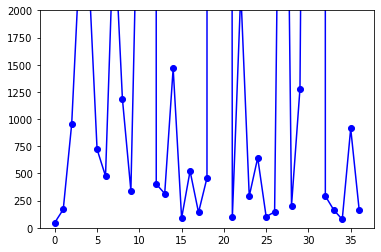

In [ ]:
x=np.arange(0,len(energiesegnaliMCI),1)
plt.plot(x,energiesegnaliMCI, color="blue", marker="o")
#plt.ylim(0,2000)
plt.show()

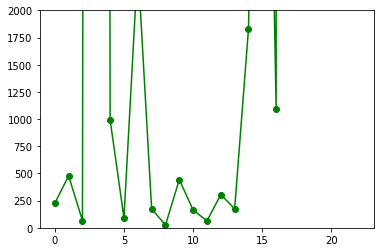

In [ ]:
x=np.arange(0,len(energiesegnaliHC),1)
plt.plot(x,energiesegnaliHC, color="green", marker="o")
#plt.ylim(0,2000)
plt.show()

In [ ]:
plt.magnitude_spectrum(2*fadp11,n)
plt.xlim(0,xmax)
plt.title("1 FP1")
plt.show()

NameError: ignored

In [ ]:
def spettro(f):
    N = len(f)                       # Lunghezza del vettore di partenza
    Nf = int( N / 2 )                # Frequenza di Nyquist
    om = np.linspace(0.0, Nf, Nf+1)  # Vettore di output contenente le frequenze
    sp = np.zeros(Nf+1)              # Vettore di output contenente lo spettro
    ak = np.fft.rfft(f) / N          # Trasformata del vettore di partenza (normalizzata!)
    for n in range(Nf+1):
        if n == 0:
            sp[n] = np.square(np.abs(ak[n]))
        else:
            sp[n] = 2.0 * np.square(np.abs(ak[n]))
    return om, sp



/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



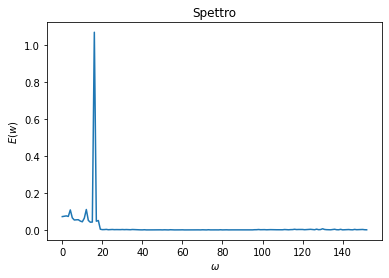

/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



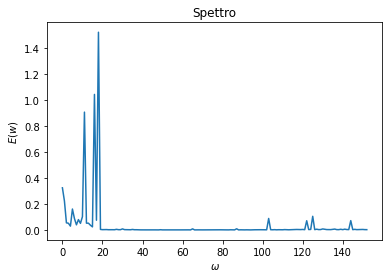

/usr/local/lib/python3.7/dist-packages/numpy/fft/_pocketfft.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part



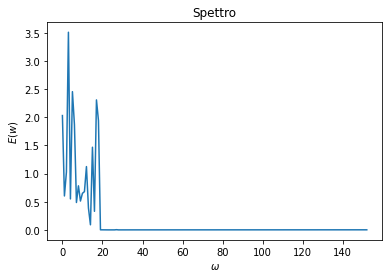

In [ ]:
y1=ifft(segnaleAD)
y2=ifft(segnaleMCI)
y3=ifft(segnaleHC)

w, Ew = spettro(y1)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y2)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()
w, Ew = spettro(y3)
plt.title("Spettro")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")
plt.plot(w,Ew,'-')
plt.show()

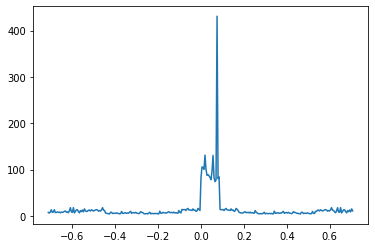

In [ ]:
ps = np.abs(segnaleAD)

time_step = 180/256
freqs = fftfreq(304, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

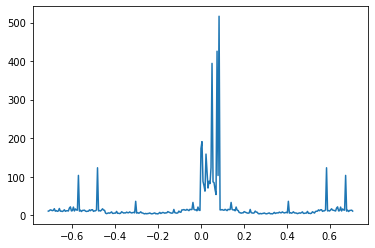

In [ ]:
ps = np.abs(segnaleMCI)

time_step = 180/256
freqs = fftfreq(304, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

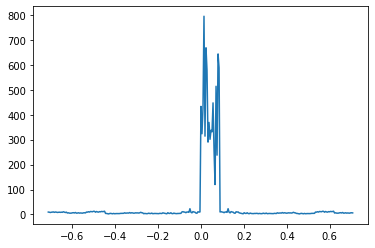

In [ ]:
ps = np.abs(segnaleHC)

time_step = 180/256
freqs = fftfreq(304, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

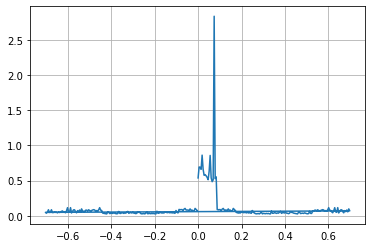

In [ ]:

# Number of sample points
N = 304
# sample spacing
T = 1.0 / 180.0
T = 128.0 / 180.0
x = np.linspace(0.0, N*T, N, endpoint=False)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = segnaleAD
#xf = fftfreq(N, T)[:N//2]
xf = fftfreq(N, T)

#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf))
plt.grid()
plt.show()

# prove ML per verifica *ipotesi*

In [ ]:
f_AD_HC = pd.read_csv("/content/drive/MyDrive/Dati Fourier/ADvsHCFourier.csv", sep=",")

f_CASE_HC = pd.read_csv("/content/drive/MyDrive/Dati Fourier/CASEVsHCFourier.csv", sep=",")
f_MCI_AD = pd.read_csv("/content/drive/MyDrive/Dati Fourier/MCIvsADFourier.csv", sep=",")
f_MCI_HC = pd.read_csv("/content/drive/MyDrive/Dati Fourier/MCIvsHCFourier.csv", sep=",")

In [ ]:
AD_HC=f_AD_HC.loc[:, "Four_1":"class"]
CASE_HC=f_CASE_HC.loc[:, "Four_1":"class"]
MCI_AD=f_MCI_AD.loc[:, "Four_1":"class"]
MCI_HC=f_MCI_HC.loc[:, "Four_1":"class"]

In [ ]:

pazientiADHC=AD_HC.loc[:, "Four_1":"Four_304"]
pazientiCASEHC=CASE_HC.loc[:, "Four_1":"Four_304"]
pazientiMCIAD=MCI_AD.loc[:, "Four_1":"Four_304"]
pazientiMCIHC=MCI_HC.loc[:, "Four_1":"Four_304"]


In [ ]:
pazienteAD=pazientiAD.iloc[2,]
pazienteMCI=pazientiMCI.iloc[2,]
pazienteHC=pazientiHC.iloc[3,]

In [ ]:
matriceADHC = np.zeros((len(AD_HC),17))
matriceCASEHC = np.zeros((len(CASE_HC),17))
matriceMCIAD = np.zeros((len(MCI_AD),17))
matriceMCIHC = np.zeros((len(MCI_HC),17))



In [ ]:
segnalemedioAD=np.arange(0,16,1.0)
segnalemedioMCI=np.arange(0,16,1.0)
segnalemedioHC=np.arange(0,16,1.0)

In [ ]:
def media_Fourier1(ntest):
       
    if ntest==1:
       dati=AD_HC.loc[:, "Four_1":"Four_304"]
       print("ADHC")
    if ntest==2:
       dati=CASE_HC.loc[:, "Four_1":"Four_304"]  
       print("CASEHC")
    if ntest==3:
       dati=MCI_AD.loc[:, "Four_1":"Four_304"]
       print("MCIAD") 
    if ntest==4:
       dati=MCI_HC.loc[:, "Four_1":"Four_304"]
       print("MCIHC")    
    
    n=len(dati)
    if n==304:
       n=1 

    for riga in range(n):
        #print("riga", riga)
        pmedio=dati.iloc[riga,]
        pvettore=pmedio[0:304].to_numpy()
        e=19
        i=0
        f=16
        indice=0
        matricesegnale = np.zeros((19,16))
        for elettrodo in range(e):
            vettore=np.array(pvettore[i:f])
            #print("indici", i,f,elettrodo,len(vettore)) 
            #print(vettore)  
            matricesegnale[elettrodo,]=vettore
            i=f
            f=f+16
            indice=indice+1
    
        signmedio=np.arange(0,16,1.0)
        
        for k in range(len(signmedio)):
              signmedio[k]=np.mean(matricesegnale[:,k])    

        if ntest==1:
               matriceADHC[riga,0:16]=signmedio
               flag=AD_HC.loc[riga,"class"]
               print(flag)
               if flag==' AD':
                  matriceADHC[riga,16]=1
               else:
                  matriceADHC[riga,16]=3   
        if ntest==2:
               matriceCASEHC[riga,0:16]=signmedio
               flag=CASE_HC.loc[riga,"class"]
               print(flag)
               if flag=='Case':
                  matriceCASEHC[riga,16]=4
               else:
                  matriceCASEHC[riga,16]=3 
        if ntest==3:
               matriceMCIAD[riga,0:16]=signmedio
               flag=MCI_AD.loc[riga,"class"]
               print(flag)
               if flag==' MCI':
                  matriceMCIAD[riga,16]=2
               else:
                  matriceMCIAD[riga,16]=1
        if ntest==4:
               matriceMCIHC[riga,0:16]=signmedio
               flag=MCI_HC.loc[riga,"class"]
               print(flag)
               if flag==' MCI':
                  matriceMCIHC[riga,16]=2
               else:
                  matriceMCIHC[riga,16]=3       

    
    #if ntest==1:
    #   for z in range(len(segnalemedioAD)):
    #         segnalemedioAD[z]=np.mean(matriceAD[:,z])    
    #if ntest==2:
    #   for z in range(len(segnalemedioMCI)):
    #         segnalemedioMCI[z]=np.mean(matriceMCI[:,z])       
    #if ntest==3:
    #   for z in range(len(segnalemedioHC)):
    #         segnalemedioHC[z]=np.mean(matriceHC[:,z])        
   

In [ ]:
segnalemedioADtot=np.arange(0,304,1.0)
segnalemedioMCItot=np.arange(0,304,1.0)
segnalemedioHCtot=np.arange(0,304,1.0)


In [ ]:
def mediatot_Fourier(ntest):
       
    if ntest==1:
       dati=pazientiAD
       print("AD")

    if ntest==2:
       dati=pazientiMCI 
       print("MCI")
    if ntest==3:
       dati=pazientiHC
       print("HC") 
 
    n=len(dati)
    if n==304:
       n=1 
    segnalemediotot=np.arange(0,304,1.0)

    for colonna in range(304):
        #print("riga", riga)
        segnalemediotot[colonna]=np.mean(dati.iloc[:,colonna])
        
    
    if ntest==1:
       segnalemedioADtot=segnalemediotot
       print(segnalemedioADtot)   
    if ntest==2:
       segnalemedioMCItot=segnalemediotot
       print(segnalemedioMCItot) 
    if ntest==3:
       segnalemedioHCtot=segnalemediotot
       print(segnalemedioHCtot) 

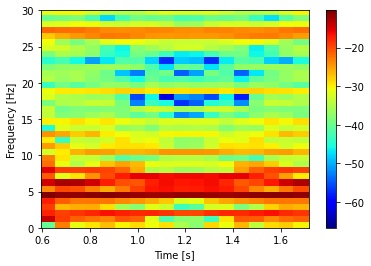

In [ ]:
from scipy.signal import spectrogram
from pylab import *
#Fs = 1 / dt                # Define the sampling frequency,
Fs=256
#interval = int(Fs)        # ... the interval size,
#overlap = int(Fs * 0.95)  # ... and the overlap intervals
interval = int(304)        # ... the interval size,
overlap = int(304*0.95)          # ... and the overlap intervals
EEG=irfft(pazienteAD)
                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * np.log10(Sxx),cmap='jet')
#pcolormesh(t, f, Sxx,cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
plt.ylim([0, 30])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')
#savefig('imgs/3-14')
show()

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(pazienteAD))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



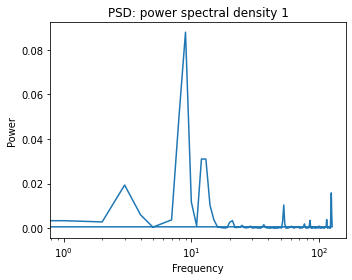

In [ ]:
freqs, psd = signal.welch(ifft(pazienteAD),256)

#print(freqs, psd)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()


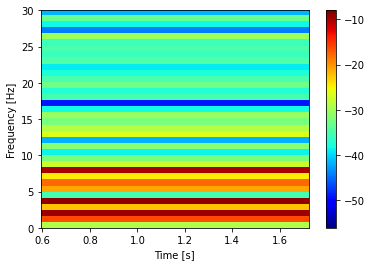

In [ ]:
from scipy.signal import spectrogram
from pylab import *
#Fs = 1 / dt                # Define the sampling frequency,
Fs=256
#interval = int(Fs)        # ... the interval size,
#overlap = int(Fs * 0.95)  # ... and the overlap intervals
interval = int(304)        # ... the interval size,
overlap = int(16*0.95)          # ... and the overlap intervals
EEG=irfft(pazienteMCI)
                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * np.log10(Sxx),cmap='jet')
#pcolormesh(t, f, Sxx,cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
plt.ylim([0, 30])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')
#savefig('imgs/3-14')
show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



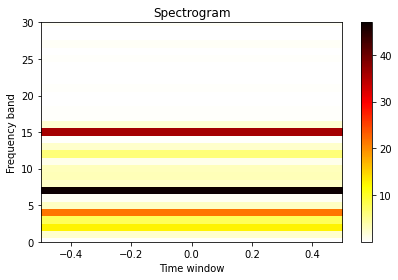

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(pazienteMCI))

#plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

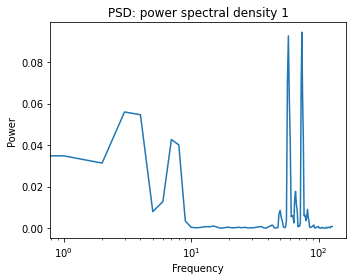

In [ ]:
freqs, psd = signal.welch(irfft(pazienteMCI),256)

#print(freqs, psd)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()


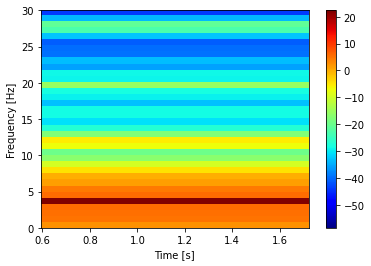

In [ ]:
from scipy.signal import spectrogram
from pylab import *
#Fs = 1 / dt                # Define the sampling frequency,
Fs=256
#interval = int(Fs)        # ... the interval size,
#overlap = int(Fs * 0.95)  # ... and the overlap intervals
interval = int(304)        # ... the interval size,
overlap = int(16*0.95)          # ... and the overlap intervals
EEG=irfft(pazienteHC)
                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * np.log10(Sxx),cmap='jet')
#pcolormesh(t, f, Sxx,cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
plt.ylim([0, 30])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')
#savefig('imgs/3-14')
show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



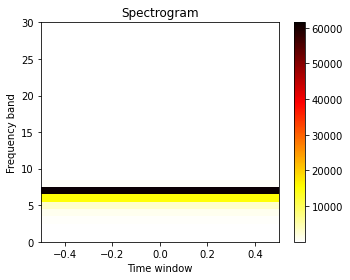

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(pazienteHC))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



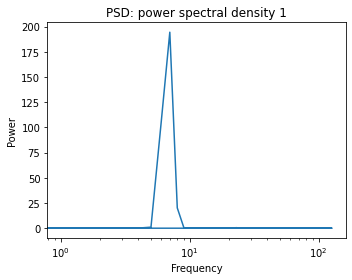

In [ ]:
freqs, psd = signal.welch(ifft(pazienteHC),256)

#print(freqs, psd)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()


In [ ]:
media_Fourier1(1)

ADHC
 Control
 Control
 Control
 Control
 Control
 AD
 Control
 AD
 AD
 AD
 AD
 AD
 Control
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 Control
 AD
 AD
 AD
 AD
 AD
 Control
 AD
 AD
 AD
 AD
 AD
 Control
 AD
 AD
 AD
 AD
 Control
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 Control
 AD
 AD
 AD
 AD
 AD
 AD
 Control
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control


In [ ]:
media_Fourier1(2)

CASEHC
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control


In [ ]:
media_Fourier1(3)

MCIAD
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD
 AD


In [ ]:
media_Fourier1(4)

MCIHC
 Control
 MCI
 Control
 MCI
 Control
 MCI
 Control
 MCI
 Control
 MCI
 Control
 MCI
 Control
 MCI
 MCI
 MCI
 Control
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 Control
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 Control
 MCI
 MCI
 MCI
 MCI
 MCI
 MCI
 Control
 MCI
 MCI
 MCI
 Control
 MCI
 MCI
 MCI
 MCI
 Control
 MCI
 MCI
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control
 Control


In [ ]:
matriceMCIHC[:,16]

array([3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 2., 2., 3.,
       2., 2., 2., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 3., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 3., 2., 2., 2., 2., 3., 2., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3.])

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 17, using nperseg = 17

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



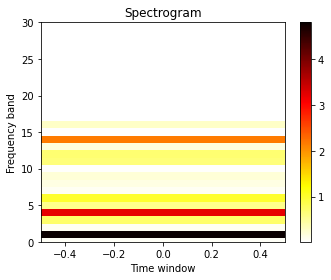

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(matriceADHC[0,:]))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 17, using nperseg = 17

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



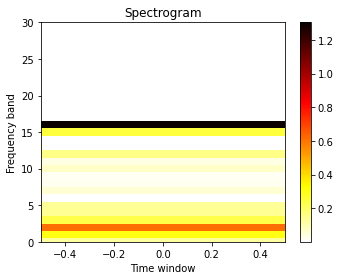

In [ ]:
freqs, times, spectrogram = signal.spectrogram(ifft(matriceADHC[6,:]))

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 30])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



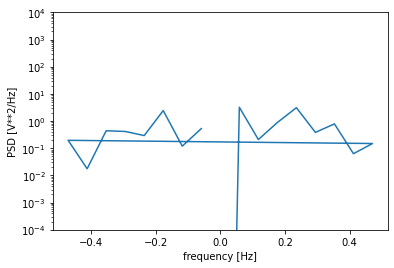

In [ ]:
f, Pxx_den = signal.periodogram(ifft(matriceADHC[0,:]))
plt.semilogy(f, Pxx_den)
plt.ylim([1e-4, 1e4])
#plt.xlim(0,40)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1815: UserWarning:

Input data is complex, switching to return_onesided=False



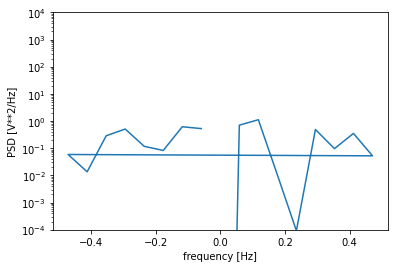

In [ ]:
f, Pxx_den = signal.periodogram(ifft(matriceADHC[6,:]))
plt.semilogy(f, Pxx_den)
plt.ylim([1e-4, 1e4])
#plt.xlim(0,40)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

# nuovi test partendo dai segnali nel dominio del tempo


In [ ]:
import pywt
from pylab import *

In [ ]:
df_AD = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_14_AD.txt", sep="\t",header=None)

df_MCI = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_10_MCI.txt",sep="\t",header=None)
df_HC = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_1.txt",sep="\t",header=None)


In [ ]:
df_AD2 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_27_AD.txt", sep="\t",header=None)

df_MCI2 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_48_MCI.txt",sep="\t",header=None)
df_HC2= pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_20.txt",sep="\t",header=None)


In [ ]:
AD1 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_14_AD.txt", sep="\t",header=None)
AD2 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_15_AD.txt", sep="\t",header=None)
AD3 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_16_AD.txt", sep="\t",header=None)
AD4 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_17_AD.txt", sep="\t",header=None)
AD5 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_18_AD.txt", sep="\t",header=None)
AD6 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_20_AD.txt", sep="\t",header=None)
AD7 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_21_AD.txt", sep="\t",header=None)
AD8 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_22_AD.txt", sep="\t",header=None)
AD9 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_24_AD.txt", sep="\t",header=None)
AD10 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_26_AD.txt", sep="\t",header=None)
AD11 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_27_AD.txt", sep="\t",header=None)
AD12 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_29_AD.txt", sep="\t",header=None)
AD13 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_2_AD.txt", sep="\t",header=None)
AD14 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_31_AD.txt", sep="\t",header=None)
AD15 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_36_AD.txt", sep="\t",header=None)
AD16 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_38_AD.txt", sep="\t",header=None)
AD17 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_39_AD.txt", sep="\t",header=None)
AD18 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_40_AD.txt", sep="\t",header=None)
AD19 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_46_AD.txt", sep="\t",header=None)
AD20 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_47_AD.txt", sep="\t",header=None)
AD21 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_4_AD.txt", sep="\t",header=None)
AD22 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_50_AD.txt", sep="\t",header=None)
AD23 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_52_AD.txt", sep="\t",header=None)
AD24 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_53_AD.txt", sep="\t",header=None)
AD25 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_54_AD.txt", sep="\t",header=None)
AD26 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_5_AD.txt", sep="\t",header=None)
AD27 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_60_AD.txt", sep="\t",header=None)
AD28 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_62_AD.txt", sep="\t",header=None)
AD29 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_63_AD.txt", sep="\t",header=None)
AD30 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_64_AD.txt", sep="\t",header=None)
AD31 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_65_AD.txt", sep="\t",header=None)
AD32 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_66_AD.txt", sep="\t",header=None)
AD33 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_67_AD.txt", sep="\t",header=None)
AD34 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_68_AD.txt", sep="\t",header=None)
AD35 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_73_AD.txt", sep="\t",header=None)
AD36 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_74_AD.txt", sep="\t",header=None)
AD37 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_75_AD.txt", sep="\t",header=None)
AD38 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_76_AD.txt", sep="\t",header=None)
AD39 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_78_AD.txt", sep="\t",header=None)
AD40 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_79_AD.txt", sep="\t",header=None)
AD41 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_7_AD.txt", sep="\t",header=None)
AD42 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_80_AD.txt", sep="\t",header=None)
AD42 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_81_AD.txt", sep="\t",header=None)
AD43 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_83_AD.txt", sep="\t",header=None)
AD44 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_84_AD.txt", sep="\t",header=None)
AD45 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_85_AD.txt", sep="\t",header=None)
AD46 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_86_AD.txt", sep="\t",header=None)
AD47 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/AD/Patient_9_AD.txt", sep="\t",header=None)


In [ ]:
MCI1 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_10_MCI.txt",sep="\t",header=None)
MCI2 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_11_MCI.txt",sep="\t",header=None)
MCI3 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_12_MCI.txt",sep="\t",header=None)
MCI4 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_13_MCI.txt",sep="\t",header=None)
MCI5 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_19_MCI.txt",sep="\t",header=None)
MCI6 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_1_MCI.txt",sep="\t",header=None)
MCI7 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_23_MCI.txt",sep="\t",header=None)
MCI8 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_25_MCI.txt",sep="\t",header=None)
MCI9 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_28_MCI.txt",sep="\t",header=None)
MCI10 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_30_MCI.txt",sep="\t",header=None)
MCI11 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_32_MCI.txt",sep="\t",header=None)
MCI12 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_33_MCI.txt",sep="\t",header=None)
MCI13 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_34_MCI.txt",sep="\t",header=None)
MCI14 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_35_MCI.txt",sep="\t",header=None)
MCI15 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_37_MCI.txt",sep="\t",header=None)
MCI16 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_3_MCI.txt",sep="\t",header=None)
MCI17 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_41_MCI.txt",sep="\t",header=None)
MCI18 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_42_MCI.txt",sep="\t",header=None)
MCI19 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_43_MCI.txt",sep="\t",header=None)
MCI20 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_44_MCI.txt",sep="\t",header=None)
MCI21 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_45_MCI.txt",sep="\t",header=None)
MCI22 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_48_MCI.txt",sep="\t",header=None)
MCI23 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_51_MCI.txt",sep="\t",header=None)
MCI24 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_55_MCI.txt",sep="\t",header=None)
MCI25 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_56_MCI.txt",sep="\t",header=None)
MCI26 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_57_MCI.txt",sep="\t",header=None)
MCI27 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_58_MCI.txt",sep="\t",header=None)
MCI28 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_59_MCI.txt",sep="\t",header=None)
MCI29 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_61_MCI.txt",sep="\t",header=None)
MCI30 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_69_MCI.txt",sep="\t",header=None)
MCI31 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_6_MCI.txt",sep="\t",header=None)
MCI32 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_70_MCI.txt",sep="\t",header=None)
MCI33 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_71_MCI.txt",sep="\t",header=None)
MCI34 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_72_MCI.txt",sep="\t",header=None)
MCI35 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_77_MCI.txt",sep="\t",header=None)
MCI36 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_82_MCI.txt",sep="\t",header=None)
MCI37 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/MCI/Patient_8_MCI.txt",sep="\t",header=None)


In [ ]:
HC1 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_1.txt",sep="\t",header=None)
HC2 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_10.txt",sep="\t",header=None)
HC3 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_11.txt",sep="\t",header=None)
HC4 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_12.txt",sep="\t",header=None)
HC5 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_13.txt",sep="\t",header=None)
HC6 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_14.txt",sep="\t",header=None)
HC7 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_16.txt",sep="\t",header=None)
HC8 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_17.txt",sep="\t",header=None)
HC9 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_18.txt",sep="\t",header=None)
HC10 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_2.txt",sep="\t",header=None)
HC11 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_20.txt",sep="\t",header=None)
HC12 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_21.txt",sep="\t",header=None)
HC13 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_22.txt",sep="\t",header=None)
HC14 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_3.txt",sep="\t",header=None)
HC15 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_4.txt",sep="\t",header=None)
HC16 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_5.txt",sep="\t",header=None)
HC17 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_6.txt",sep="\t",header=None)
HC18 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_7.txt",sep="\t",header=None)
HC19 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_8.txt",sep="\t",header=None)
HC20 = pd.read_csv("/content/drive/MyDrive/EEG dominio del tempo/Controlli-HC/Control_9.txt",sep="\t",header=None)


In [ ]:

xad=df_AD.loc[:,0]
xmci=df_MCI.loc[:,0]
xhc=df_HC.loc[:,0]

In [ ]:
df_AD.loc[0,:]

In [ ]:
mediaelettrodiAD1=np.arange(0,len(df_AD),1.0)
mediaelettrodiMCI1=np.arange(0,len(df_MCI),1.0)
mediaelettrodiHC1=np.arange(0,len(df_HC),1.0)


In [ ]:
mediaelettrodiAD2=np.arange(0,len(df_AD),1.0)
mediaelettrodiMCI2=np.arange(0,len(df_MCI),1.0)
mediaelettrodiHC2=np.arange(0,len(df_HC),1.0)

In [ ]:
mediaelettrodiAD1tot=np.arange(0,len(df_AD)*19,1.0)
mediaelettrodiMCI1tot=np.arange(0,len(df_MCI)*19,1.0)
mediaelettrodiHC1tot=np.arange(0,len(df_HC)*19,1.0)


In [ ]:
mediaelettrodiAD2tot=np.arange(0,len(df_AD)*19,1.0)
mediaelettrodiMCI2tot=np.arange(0,len(df_MCI)*19,1.0)
mediaelettrodiHC2tot=np.arange(0,len(df_HC)*19,1.0)

In [ ]:
for riga in range(len(df_AD)):
            mediaelettrodiAD1[riga]=np.mean(df_AD.loc[riga,:])
            

In [ ]:
for riga in range(len(df_AD2)):
            mediaelettrodiAD2[riga]=np.mean(df_AD2.loc[riga,:])

In [ ]:
for riga in range(len(df_MCI)):
            mediaelettrodiMCI1[riga]=np.mean(df_MCI.loc[riga,:])

In [ ]:
for riga in range(len(df_MCI2)):
            mediaelettrodiMCI2[riga]=np.mean(df_MCI2.loc[riga,:])

In [ ]:
for riga in range(len(df_HC)):
            mediaelettrodiHC1[riga]=np.mean(df_HC.loc[riga,:])

In [ ]:
for riga in range(len(df_HC2)):
            mediaelettrodiHC2[riga]=np.mean(df_HC2.loc[riga,:])

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(df_AD)):
                 mediaelettrodiAD1tot[i]=df_AD.loc[riga,colonna]  
                 i=i+1

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(df_AD2)):
                 mediaelettrodiAD2tot[i]=df_AD2.loc[riga,colonna]  
                 i=i+1

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(df_MCI)):
                 mediaelettrodiMCI1tot[i]=df_MCI.loc[riga,colonna]  
                 i=i+1

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(df_MCI2)):
                 mediaelettrodiMCI2tot[i]=df_MCI2.loc[riga,colonna]  
                 i=i+1

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(df_HC)):
                 mediaelettrodiHC1tot[i]=df_HC.loc[riga,colonna]  
                 i=i+1


In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(df_HC2)):
                 mediaelettrodiHC2tot[i]=df_HC2.loc[riga,colonna]  
                 i=i+1

In [ ]:
mediaelettrodiAD1tot

array([  3.3038, -43.3826, -80.0094, ..., -13.2761,  -6.0876,  -1.5103])

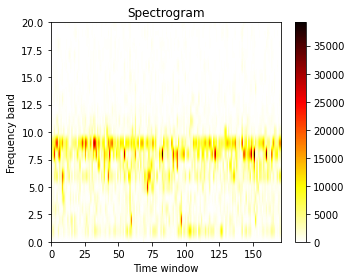

In [ ]:
freqs, times, spectrogram = signal.spectrogram(mediaelettrodiAD1)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

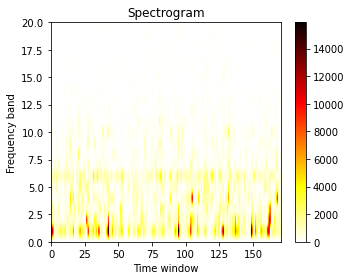

In [ ]:
freqs, times, spectrogram = signal.spectrogram(mediaelettrodiAD2)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

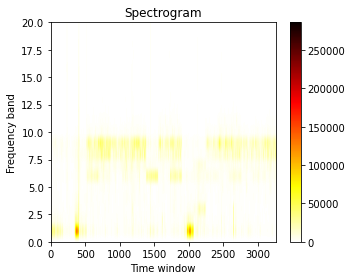

In [ ]:
freqs, times, spectrogram = signal.spectrogram(mediaelettrodiAD1tot)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])

plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

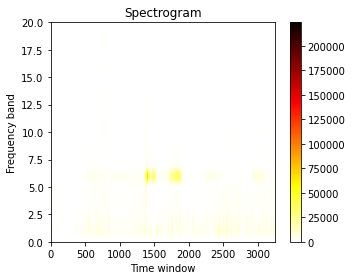

In [ ]:
freqs, times, spectrogram = signal.spectrogram(mediaelettrodiAD2tot)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])

plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

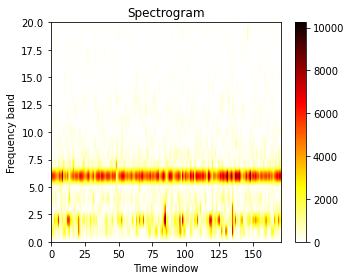

In [ ]:
freqs, times, spectrogram = signal.spectrogram(mediaelettrodiMCI1)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

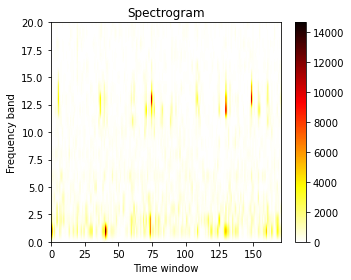

In [ ]:
freqs, times, spectrogram = signal.spectrogram(mediaelettrodiMCI2)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

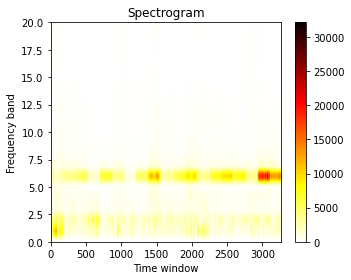

In [ ]:
freqs, times, spectrogram = signal.spectrogram(mediaelettrodiMCI1tot)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

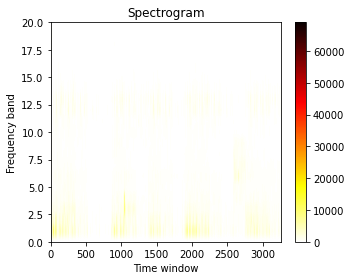

In [ ]:
freqs, times, spectrogram = signal.spectrogram(mediaelettrodiMCI2tot)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

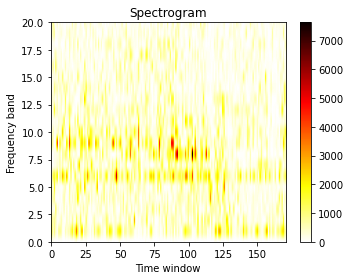

In [ ]:
freqs, times, spectrogram = signal.spectrogram(mediaelettrodiHC1)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

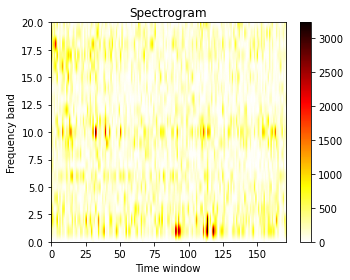

In [ ]:
freqs, times, spectrogram = signal.spectrogram(mediaelettrodiHC2)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

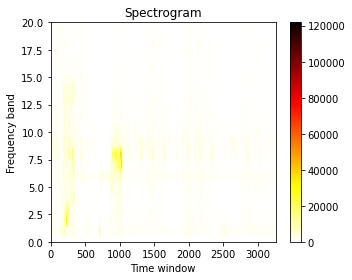

In [ ]:
freqs, times, spectrogram = signal.spectrogram(mediaelettrodiHC1tot)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

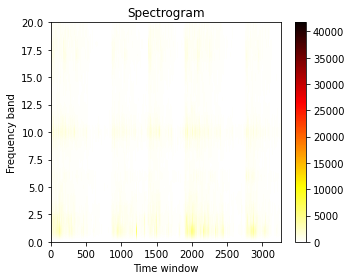

In [ ]:
freqs, times, spectrogram = signal.spectrogram(mediaelettrodiHC2tot)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.colorbar() 
plt.ylim([0, 20])
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

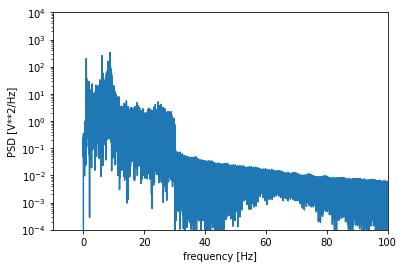

In [ ]:
f, Pxx_den = signal.periodogram(mediaelettrodiAD1,256)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-4, 1e4])
plt.xlim(-10,100)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

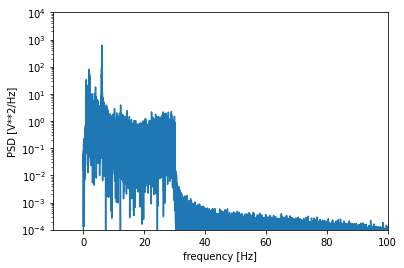

In [ ]:
f, Pxx_den = signal.periodogram(mediaelettrodiMCI1,256)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-4, 1e4])
plt.xlim(-10,100)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

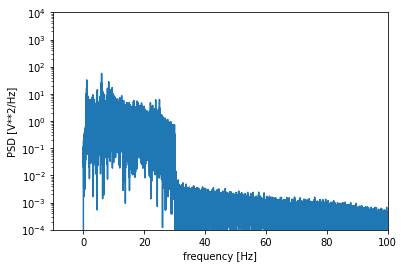

In [ ]:
f, Pxx_den = signal.periodogram(mediaelettrodiHC1,256)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-4, 1e4])
plt.xlim(-10,100)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

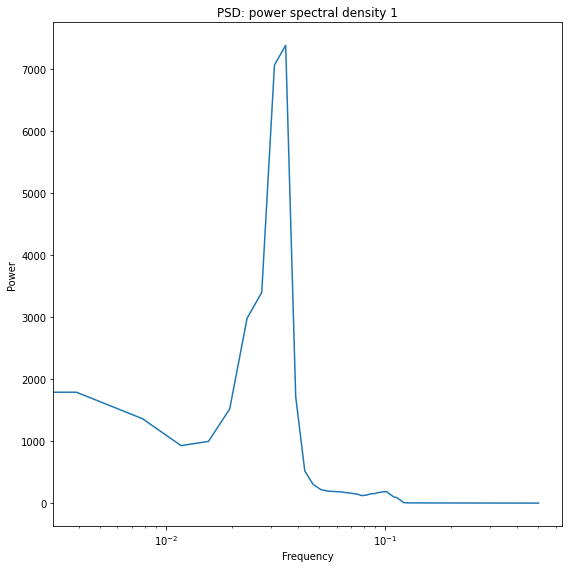

In [ ]:
freqs, psd = signal.welch(mediaelettrodiAD1)

#print(freqs, psd)

plt.figure(figsize=(8, 8))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

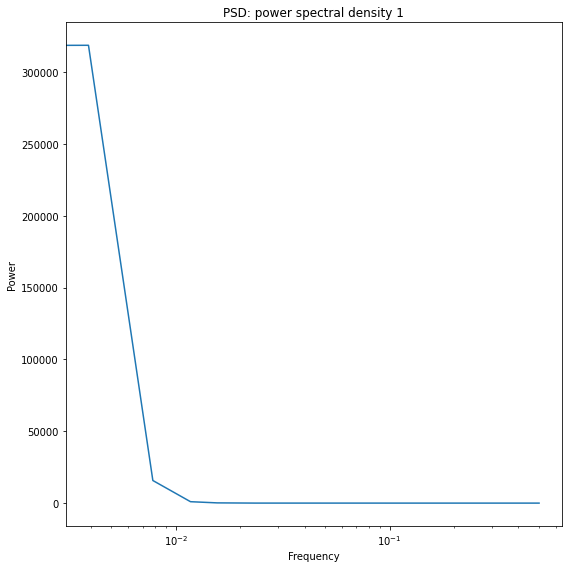

In [ ]:
freqs, psd = signal.welch(mediaelettrodiMCI)

#print(freqs, psd)

plt.figure(figsize=(8, 8))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

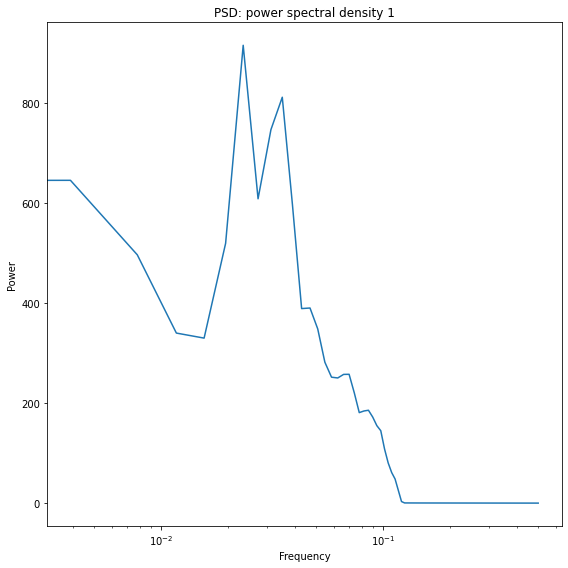

In [ ]:
freqs, psd = signal.welch(mediaelettrodiHC1)

#print(freqs, psd)

plt.figure(figsize=(8, 8))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

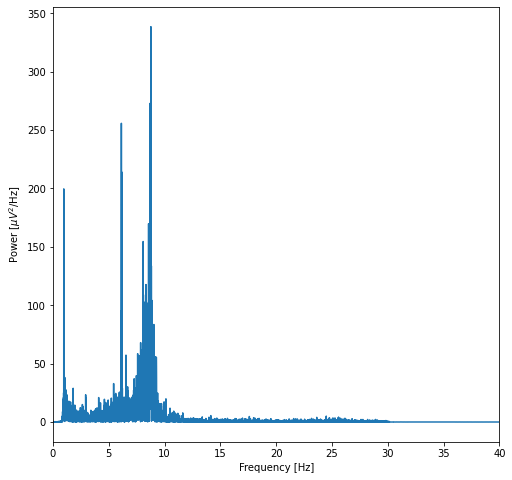

In [ ]:
x = mediaelettrodiAD1                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(8, 8))
plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

In [ ]:
len(Sxx)

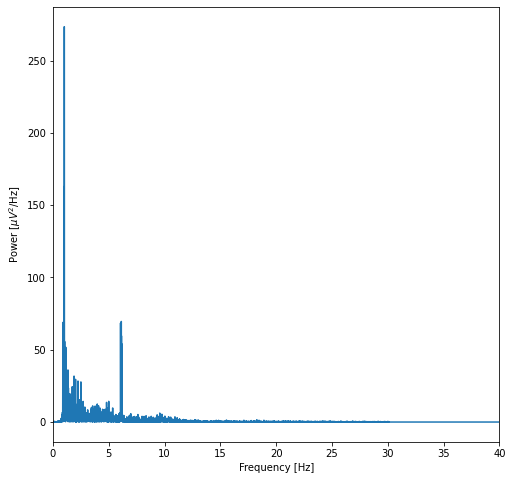

In [ ]:
x = mediaelettrodiAD2                               # Relabel the data variable
)dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(8, 8))
plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

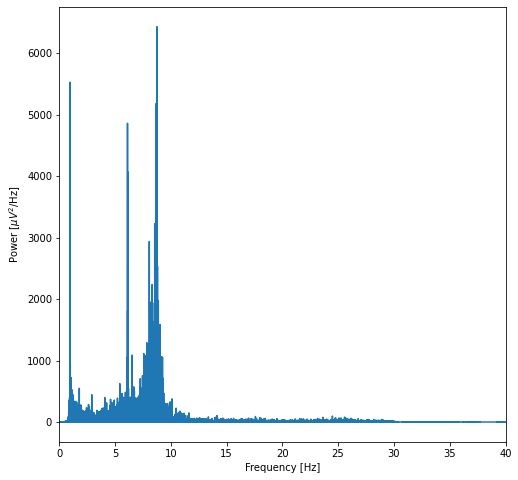

In [ ]:
x = mediaelettrodiAD1tot                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(8, 8))
plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

In [ ]:
len(Sxx)

364810

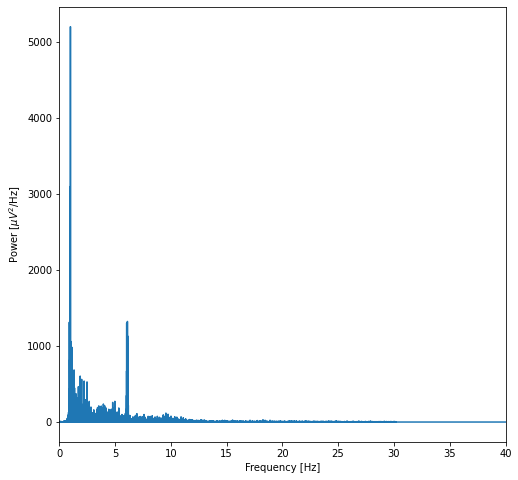

In [ ]:
x = mediaelettrodiAD2tot                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(8, 8))
plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

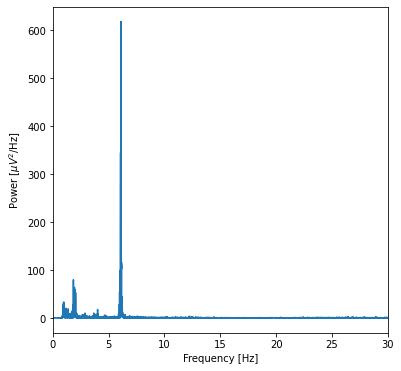

In [ ]:
x = mediaelettrodiMCI1                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(6, 6))
plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 30])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

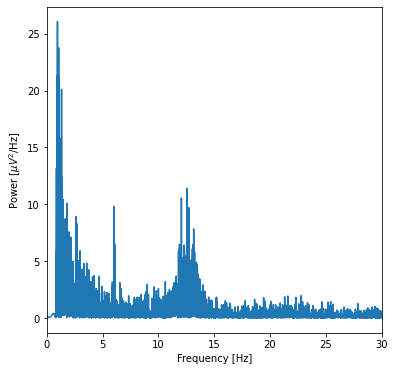

In [ ]:
x = mediaelettrodiMCI2                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(6, 6))
plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 30])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

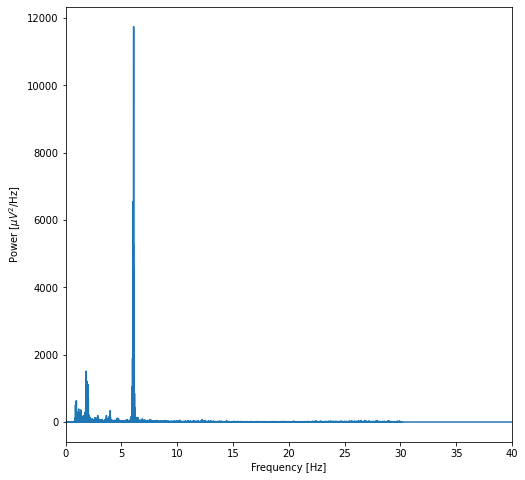

In [ ]:
x = mediaelettrodiMCI1tot                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(8, 8))
plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

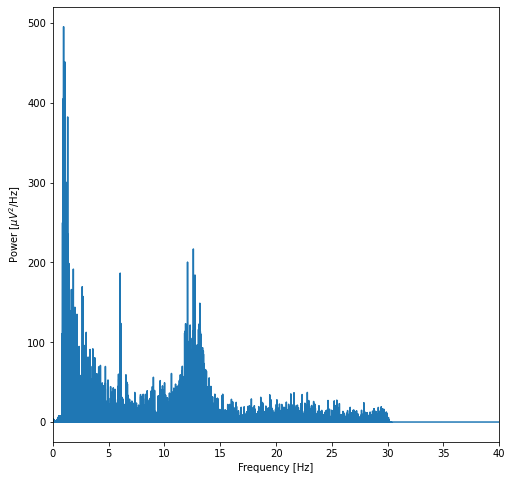

In [ ]:
x = mediaelettrodiMCI2tot                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(8, 8))
plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

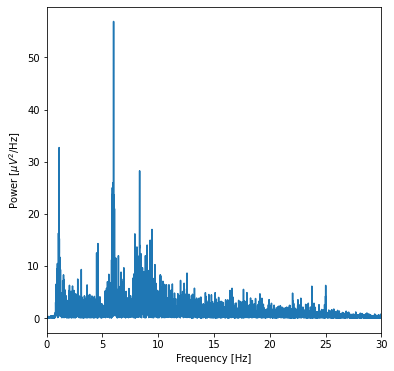

In [ ]:
x = mediaelettrodiHC1                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(6, 6))
plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 30])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

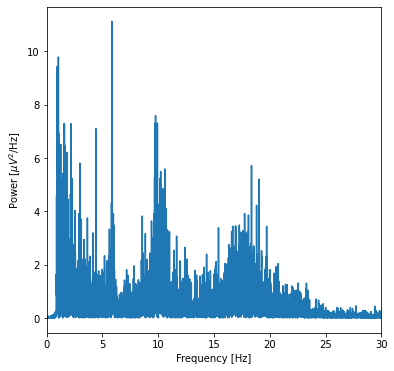

In [ ]:
x = mediaelettrodiHC2                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(6, 6))
plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 30])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

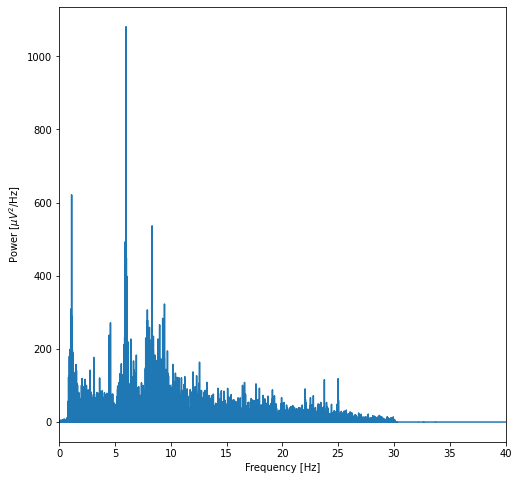

In [ ]:
x = mediaelettrodiHC1tot                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(8, 8))
plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

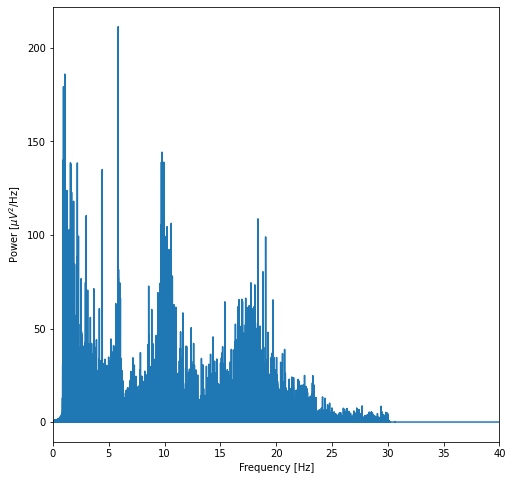

In [ ]:
x = mediaelettrodiHC2tot                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(8, 8))
plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

In [ ]:
from pylab import *
from scipy.signal import spectrogram

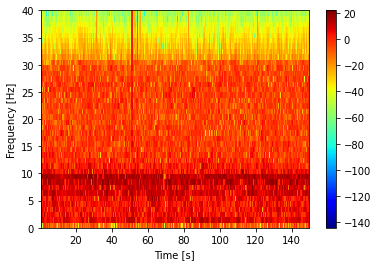

In [ ]:

EEG=mediaelettrodiAD1
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

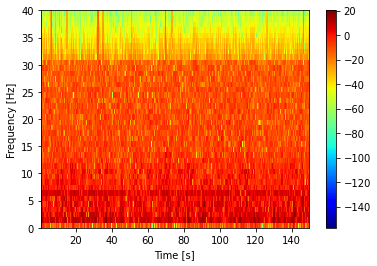

In [ ]:
EEG=mediaelettrodiAD2
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

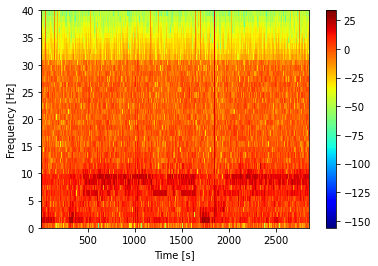

In [ ]:
EEG=mediaelettrodiAD1tot
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

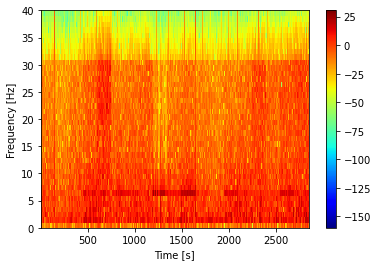

In [ ]:
EEG=mediaelettrodiAD2tot
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

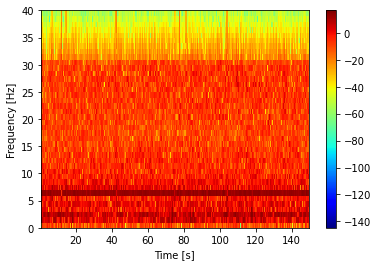

In [ ]:
EEG=mediaelettrodiMCI1
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

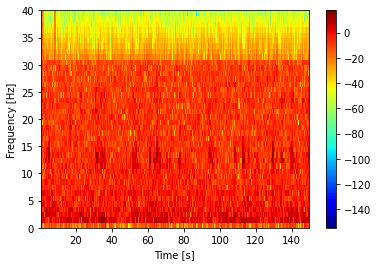

In [ ]:
EEG=mediaelettrodiMCI2
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

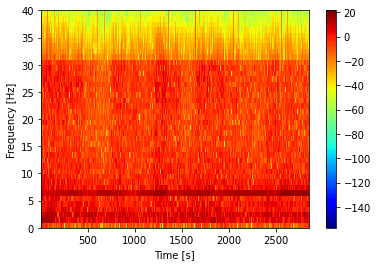

In [ ]:
EEG=mediaelettrodiMCI1tot
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

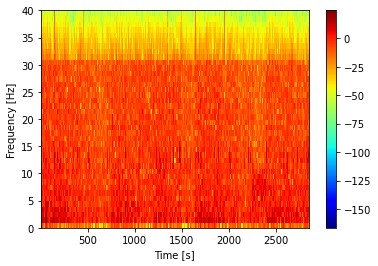

In [ ]:
EEG=mediaelettrodiMCI2tot
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

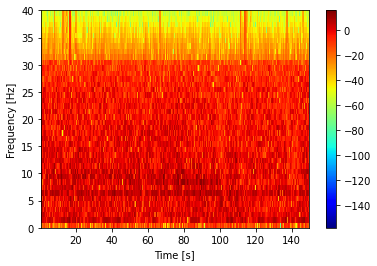

In [ ]:
EEG=mediaelettrodiHC1
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

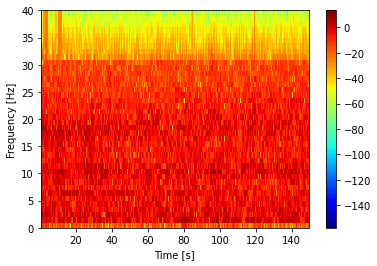

In [ ]:
EEG=mediaelettrodiHC2
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

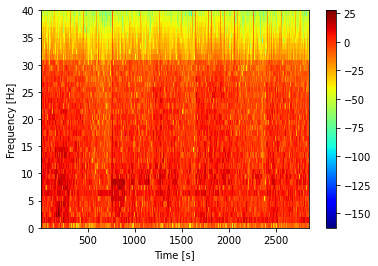

In [ ]:
EEG=mediaelettrodiHC1tot
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

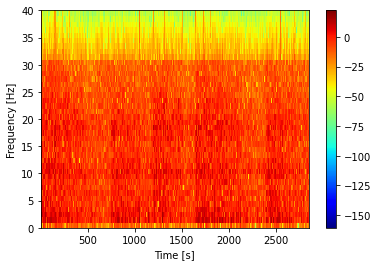

In [ ]:
EEG=mediaelettrodiHC2tot
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

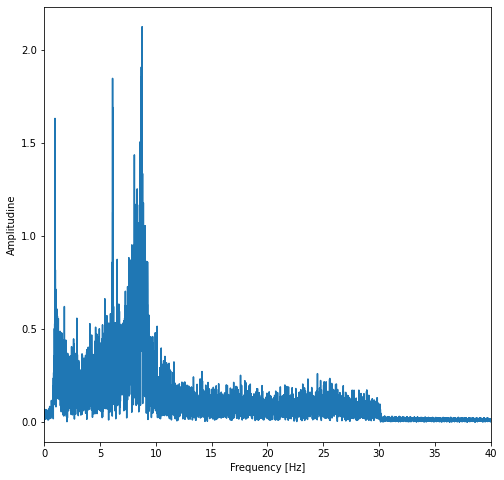

In [ ]:
x = mediaelettrodiAD1                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
#Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
yf=2*abs(xf[:N//2]/N)

#Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
fxt=fftfreq(N,1/256)
fx=fxt[:N//2]
plt.figure(figsize=(8, 8))
plt.plot(fx, yf)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Amplitudine')
plt.show()

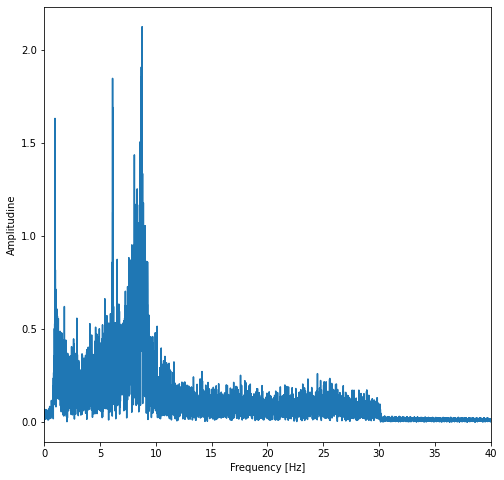

In [ ]:
x = mediaelettrodiAD1                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
#Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
yf=2*abs(xf[:(N//2)+1]/N)

#Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
fxt=fftfreq(N,1/256)
fx=fxt[:N//2]
plt.figure(figsize=(8, 8))
plt.plot(faxis, yf)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Amplitudine')
plt.show()

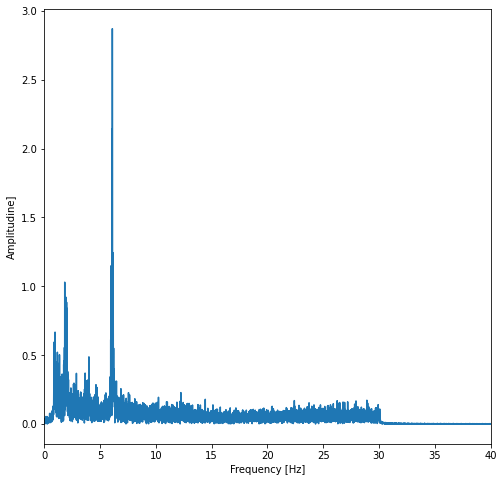

In [ ]:
x = mediaelettrodiMCI1                              # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
#Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum

#Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies
yf=2*abs(xf[:(N//2)+1]/N)
df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis

plt.figure(figsize=(8, 8))
plt.plot(faxis, yf)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Amplitudine]')
plt.show()

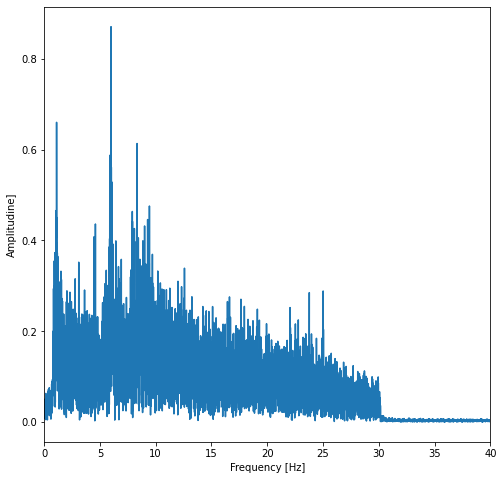

In [ ]:
x = mediaelettrodiHC1                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x)                # Compute Fourier transform of x
#Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
#Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies
yf=2*abs(xf[:(N//2)+1]/N)
df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(8, 8))
plt.plot(faxis, yf)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Amplitudine]')
plt.show()

In [ ]:
len(xf)

## costruzione del segnale totale per ogni classe di pazienti- ogni paziente come uno segnale composto dai segnali dei singoli elettrodi disposti in modo contiguo- unico segnale per classe di pazienti ricavato come media dei segnali dei singoli pazienti

In [ ]:
AD1tot = np.arange(0,len(AD1)*19,1.0)
AD2tot = np.arange(0,len(AD2)*19,1.0)
AD3tot = np.arange(0,len(AD3)*19,1.0)
AD4tot = np.arange(0,len(AD4)*19,1.0)
AD5tot = np.arange(0,len(AD5)*19,1.0)
AD6tot = np.arange(0,len(AD6)*19,1.0)
AD7tot = np.arange(0,len(AD7)*19,1.0)
AD8tot = np.arange(0,len(AD8)*19,1.0)
AD9tot = np.arange(0,len(AD9)*19,1.0)
AD10tot = np.arange(0,len(AD10)*19,1.0)
AD11tot = np.arange(0,len(AD11)*19,1.0)
AD12tot = np.arange(0,len(AD12)*19,1.0)
AD13tot = np.arange(0,len(AD13)*19,1.0)
AD14tot = np.arange(0,len(AD14)*19,1.0)
AD15tot = np.arange(0,len(AD15)*19,1.0)
AD16tot = np.arange(0,len(AD16)*19,1.0)
AD17tot = np.arange(0,len(AD17)*19,1.0)
AD18tot = np.arange(0,len(AD18)*19,1.0)
AD19tot = np.arange(0,len(AD19)*19,1.0)
AD20tot = np.arange(0,len(AD20)*19,1.0)
AD21tot = np.arange(0,len(AD21)*19,1.0)
AD22tot = np.arange(0,len(AD22)*19,1.0)
AD23tot = np.arange(0,len(AD23)*19,1.0)
AD24tot = np.arange(0,len(AD24)*19,1.0)
AD25tot = np.arange(0,len(AD25)*19,1.0)
AD26tot = np.arange(0,len(AD26)*19,1.0)
AD27tot = np.arange(0,len(AD27)*19,1.0)
AD28tot = np.arange(0,len(AD28)*19,1.0)
AD29tot = np.arange(0,len(AD29)*19,1.0)
AD30tot = np.arange(0,len(AD30)*19,1.0)
AD31tot = np.arange(0,len(AD31)*19,1.0)
AD32tot = np.arange(0,len(AD32)*19,1.0)
AD33tot = np.arange(0,len(AD33)*19,1.0)
AD34tot = np.arange(0,len(AD34)*19,1.0)
AD35tot = np.arange(0,len(AD35)*19,1.0)
AD36tot = np.arange(0,len(AD36)*19,1.0)
AD37tot = np.arange(0,len(AD37)*19,1.0)
AD38tot = np.arange(0,len(AD38)*19,1.0)
AD39tot = np.arange(0,len(AD39)*19,1.0)
AD40tot = np.arange(0,len(AD40)*19,1.0)
AD41tot = np.arange(0,len(AD41)*19,1.0)
AD42tot = np.arange(0,len(AD42)*19,1.0)
AD43tot = np.arange(0,len(AD43)*19,1.0)
AD44tot = np.arange(0,len(AD44)*19,1.0)
AD45tot = np.arange(0,len(AD45)*19,1.0)
AD46tot = np.arange(0,len(AD46)*19,1.0)
AD47tot = np.arange(0,len(AD47)*19,1.0)





In [ ]:
MCI1tot = np.arange(0,len(MCI1)*19,1.0)
MCI2tot = np.arange(0,len(MCI2)*19,1.0)
MCI3tot = np.arange(0,len(MCI3)*19,1.0)
MCI4tot = np.arange(0,len(MCI4)*19,1.0)
MCI5tot = np.arange(0,len(MCI5)*19,1.0)
MCI6tot = np.arange(0,len(MCI6)*19,1.0)
MCI7tot = np.arange(0,len(MCI7)*19,1.0)
MCI8tot = np.arange(0,len(MCI8)*19,1.0)
MCI9tot = np.arange(0,len(MCI9)*19,1.0)
MCI10tot = np.arange(0,len(MCI10)*19,1.0)
MCI11tot = np.arange(0,len(MCI11)*19,1.0)
MCI12tot = np.arange(0,len(MCI12)*19,1.0)
MCI13tot = np.arange(0,len(MCI13)*19,1.0)
MCI14tot = np.arange(0,len(MCI14)*19,1.0)
MCI15tot = np.arange(0,len(MCI15)*19,1.0)
MCI16tot = np.arange(0,len(MCI16)*19,1.0)
MCI17tot = np.arange(0,len(MCI17)*19,1.0)
MCI18tot = np.arange(0,len(MCI18)*19,1.0)
MCI19tot = np.arange(0,len(MCI19)*19,1.0)
MCI20tot = np.arange(0,len(MCI20)*19,1.0)
MCI21tot = np.arange(0,len(MCI21)*19,1.0)
MCI22tot = np.arange(0,len(MCI22)*19,1.0)
MCI23tot = np.arange(0,len(MCI23)*19,1.0)
MCI24tot = np.arange(0,len(MCI24)*19,1.0)
MCI25tot = np.arange(0,len(MCI25)*19,1.0)
MCI26tot = np.arange(0,len(MCI26)*19,1.0)
MCI27tot = np.arange(0,len(MCI27)*19,1.0)
MCI28tot = np.arange(0,len(MCI28)*19,1.0)
MCI29tot = np.arange(0,len(MCI29)*19,1.0)
MCI30tot = np.arange(0,len(MCI30)*19,1.0)
MCI31tot = np.arange(0,len(MCI31)*19,1.0)
MCI32tot = np.arange(0,len(MCI32)*19,1.0)
MCI33tot = np.arange(0,len(MCI33)*19,1.0)
MCI34tot = np.arange(0,len(MCI34)*19,1.0)
MCI35tot = np.arange(0,len(MCI35)*19,1.0)
MCI36tot = np.arange(0,len(MCI36)*19,1.0)
MCI37tot = np.arange(0,len(MCI37)*19,1.0)

In [ ]:
HC1tot = np.arange(0,len(HC1)*19,1.0)
HC2tot = np.arange(0,len(HC2)*19,1.0)
HC3tot = np.arange(0,len(HC3)*19,1.0)
HC4tot = np.arange(0,len(HC4)*19,1.0)
HC5tot = np.arange(0,len(HC5)*19,1.0)
HC6tot = np.arange(0,len(HC6)*19,1.0)
HC7tot = np.arange(0,len(HC7)*19,1.0)
HC8tot = np.arange(0,len(HC8)*19,1.0)
HC9tot = np.arange(0,len(HC9)*19,1.0)
HC10tot = np.arange(0,len(HC10)*19,1.0)
HC11tot = np.arange(0,len(HC11)*19,1.0)
HC12tot = np.arange(0,len(HC12)*19,1.0)
HC13tot = np.arange(0,len(HC13)*19,1.0)
HC14tot = np.arange(0,len(HC14)*19,1.0)
HC15tot = np.arange(0,len(HC15)*19,1.0)
HC16tot = np.arange(0,len(HC16)*19,1.0)
HC17tot = np.arange(0,len(HC17)*19,1.0)
HC18tot = np.arange(0,len(HC18)*19,1.0)
HC19tot = np.arange(0,len(HC19)*19,1.0)
HC20tot = np.arange(0,len(HC20)*19,1.0)



In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(AD1)):
                 AD1tot[i]=AD1.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD2)):
                 AD2tot[i]=AD2.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(AD3)):
                 AD3tot[i]=AD3.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD4)):
                 AD4tot[i]=AD4.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD5)):
                 AD5tot[i]=AD5.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD6)):
                 AD6tot[i]=AD6.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD7)):
                 AD7tot[i]=AD7.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(AD8)):
                 AD8tot[i]=AD8.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD9)):
                 AD9tot[i]=AD9.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD10)):
                 AD10tot[i]=AD10.loc[riga,colonna]  
                 i=i+1

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(AD11)):
                 AD11tot[i]=AD11.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD12)):
                 AD12tot[i]=AD12.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(AD13)):
                 AD13tot[i]=AD13.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD14)):
                 AD14tot[i]=AD14.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD15)):
                 AD15tot[i]=AD15.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD16)):
                 AD16tot[i]=AD16.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD17)):
                 AD17tot[i]=AD17.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(AD18)):
                 AD18tot[i]=AD18.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD19)):
                 AD19tot[i]=AD19.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD20)):
                 AD20tot[i]=AD20.loc[riga,colonna]  
                 i=i+1

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(AD21)):
                 AD11tot[i]=AD11.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD22)):
                 AD22tot[i]=AD22.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(AD23)):
                 AD23tot[i]=AD23.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD24)):
                 AD24tot[i]=AD24.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD25)):
                 AD25tot[i]=AD25.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD26)):
                 AD26tot[i]=AD26.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD27)):
                 AD27tot[i]=AD27.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(AD28)):
                 AD28tot[i]=AD28.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD29)):
                 AD29tot[i]=AD29.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD30)):
                 AD30tot[i]=AD30.loc[riga,colonna]  
                 i=i+1

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(AD31)):
                 AD31tot[i]=AD31.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD32)):
                 AD32tot[i]=AD32.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(AD33)):
                 AD33tot[i]=AD33.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD34)):
                 AD34tot[i]=AD34.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD35)):
                 AD35tot[i]=AD35.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD36)):
                 AD36tot[i]=AD36.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD37)):
                 AD37tot[i]=AD37.loc[riga,colonna]  
                 i=i+1
        

i=0
for colonna in range(19):
            for riga in range(len(AD38)):
                 AD38tot[i]=AD38.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD39)):
                 AD39tot[i]=AD39.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD40)):
                 AD40tot[i]=AD40.loc[riga,colonna]  
                 i=i+1

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(AD41)):
                 AD41tot[i]=AD41.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD42)):
                 AD42tot[i]=AD42.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(AD43)):
                 AD43tot[i]=AD43.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD44)):
                 AD44tot[i]=AD44.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD45)):
                 AD45tot[i]=AD45.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD46)):
                 AD46tot[i]=AD46.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(AD47)):
                 AD47tot[i]=AD47.loc[riga,colonna]  
                 i=i+1
        



In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(MCI1)):
                 MCI1tot[i]=MCI1.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI2)):
                 MCI2tot[i]=MCI2.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(MCI3)):
                 MCI3tot[i]=MCI3.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI4)):
                 MCI4tot[i]=MCI4.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI5)):
                 MCI5tot[i]=MCI5.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI6)):
                 MCI6tot[i]=MCI6.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI7)):
                 MCI7tot[i]=MCI7.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(MCI8)):
                 MCI8tot[i]=MCI8.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI9)):
                 MCI9tot[i]=MCI9.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI10)):
                 MCI10tot[i]=MCI10.loc[riga,colonna]  
                 i=i+1

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(MCI11)):
                 MCI11tot[i]=MCI11.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI12)):
                 MCI12tot[i]=MCI12.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(MCI13)):
                 MCI13tot[i]=MCI13.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI14)):
                 MCI14tot[i]=MCI14.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI15)):
                 MCI15tot[i]=MCI15.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI16)):
                 MCI16tot[i]=MCI16.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI17)):
                 MCI17tot[i]=MCI17.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(MCI18)):
                 MCI18tot[i]=MCI18.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI19)):
                 MCI19tot[i]=MCI19.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI20)):
                 MCI20tot[i]=MCI20.loc[riga,colonna]  
                 i=i+1

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(MCI21)):
                 MCI21tot[i]=MCI21.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI22)):
                 MCI22tot[i]=MCI22.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(MCI23)):
                 MCI23tot[i]=MCI23.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI24)):
                 MCI24tot[i]=MCI24.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI25)):
                 MCI25tot[i]=MCI25.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI26)):
                 MCI26tot[i]=MCI26.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI27)):
                 MCI27tot[i]=MCI27.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(MCI28)):
                 MCI28tot[i]=MCI28.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI29)):
                 MCI29tot[i]=MCI29.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI30)):
                 MCI30tot[i]=MCI30.loc[riga,colonna]  
                 i=i+1

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(MCI31)):
                 MCI31tot[i]=MCI31.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI32)):
                 MCI32tot[i]=MCI32.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(MCI33)):
                 MCI33tot[i]=MCI33.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI34)):
                 MCI34tot[i]=MCI34.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI35)):
                 MCI35tot[i]=MCI35.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI36)):
                 MCI36tot[i]=MCI36.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(MCI37)):
                 MCI37tot[i]=MCI37.loc[riga,colonna]  
                 i=i+1
        


In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(HC1)):
                 HC1tot[i]=HC1.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC2)):
                 HC2tot[i]=HC2.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(HC3)):
                 HC3tot[i]=HC3.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC4)):
                 HC4tot[i]=HC4.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC5)):
                 HC5tot[i]=HC5.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC6)):
                 HC6tot[i]=HC6.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC7)):
                 HC7tot[i]=HC7.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(HC8)):
                 HC8tot[i]=HC8.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC9)):
                 HC9tot[i]=HC9.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC10)):
                 HC10tot[i]=HC10.loc[riga,colonna]  
                 i=i+1

In [ ]:
i=0
for colonna in range(19):
            for riga in range(len(HC11)):
                 HC11tot[i]=HC11.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC12)):
                 HC12tot[i]=HC12.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(HC13)):
                 HC13tot[i]=HC13.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC14)):
                 HC14tot[i]=HC14.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC15)):
                 HC15tot[i]=HC15.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC16)):
                 HC16tot[i]=HC16.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC17)):
                 HC17tot[i]=HC17.loc[riga,colonna]  
                 i=i+1
        
i=0
for colonna in range(19):
            for riga in range(len(HC18)):
                 HC18tot[i]=HC18.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC19)):
                 HC19tot[i]=HC19.loc[riga,colonna]  
                 i=i+1

i=0
for colonna in range(19):
            for riga in range(len(HC20)):
                 HC20tot[i]=HC20.loc[riga,colonna]  
                 i=i+1

In [ ]:
totmatriceAD = np.zeros((47,len(AD1)*19))
totmatriceMCI = np.zeros((37,len(MCI1)*19))
totmatriceHC = np.zeros((20,len(HC1)*19))

In [ ]:
totmatriceAD[0,:]=AD1tot
totmatriceAD[1,:]=AD2tot
totmatriceAD[2,:]=AD3tot
totmatriceAD[3,:]=AD4tot
totmatriceAD[4,:]=AD5tot
totmatriceAD[5,:]=AD6tot
totmatriceAD[6,:]=AD7tot
totmatriceAD[7,:]=AD8tot
totmatriceAD[8,:]=AD9tot
totmatriceAD[9,:]=AD10tot


In [ ]:
totmatriceAD[10,:]=AD11tot
totmatriceAD[11,:]=AD12tot
totmatriceAD[12,:]=AD13tot
totmatriceAD[13,:]=AD14tot
totmatriceAD[14,:]=AD15tot
totmatriceAD[15,:]=AD16tot
totmatriceAD[16,:]=AD17tot
totmatriceAD[17,:]=AD18tot
totmatriceAD[18,:]=AD19tot
totmatriceAD[19,:]=AD20tot

In [ ]:
totmatriceAD[20,:]=AD21tot
totmatriceAD[21,:]=AD22tot
totmatriceAD[22,:]=AD23tot
totmatriceAD[23,:]=AD24tot
totmatriceAD[24,:]=AD25tot
totmatriceAD[25,:]=AD26tot
totmatriceAD[26,:]=AD27tot
totmatriceAD[27,:]=AD28tot
totmatriceAD[28,:]=AD29tot
totmatriceAD[29,:]=AD30tot

In [ ]:
totmatriceAD[30,:]=AD31tot
totmatriceAD[31,:]=AD32tot
totmatriceAD[32,:]=AD33tot
totmatriceAD[33,:]=AD34tot
totmatriceAD[34,:]=AD35tot
totmatriceAD[35,:]=AD36tot
totmatriceAD[36,:]=AD37tot
totmatriceAD[37,:]=AD38tot
totmatriceAD[38,:]=AD39tot
totmatriceAD[39,:]=AD40tot

In [ ]:
totmatriceAD[40,:]=AD41tot
totmatriceAD[41,:]=AD42tot
totmatriceAD[42,:]=AD43tot
totmatriceAD[43,:]=AD44tot
totmatriceAD[44,:]=AD45tot
totmatriceAD[45,:]=AD46tot
totmatriceAD[46,:]=AD47tot


In [ ]:
totmatriceMCI[0,:]=MCI1tot
totmatriceMCI[1,:]=MCI2tot
totmatriceMCI[2,:]=MCI3tot
totmatriceMCI[3,:]=MCI4tot
totmatriceMCI[4,:]=MCI5tot
totmatriceMCI[5,:]=MCI6tot
totmatriceMCI[6,:]=MCI7tot
totmatriceMCI[7,:]=MCI8tot
totmatriceMCI[8,:]=MCI9tot
totmatriceMCI[9,:]=MCI10tot

In [ ]:
totmatriceMCI[10,:]=MCI11tot
totmatriceMCI[11,:]=MCI12tot
totmatriceMCI[12,:]=MCI13tot
totmatriceMCI[13,:]=MCI14tot
totmatriceMCI[14,:]=MCI15tot
totmatriceMCI[15,:]=MCI16tot
totmatriceMCI[16,:]=MCI17tot
totmatriceMCI[17,:]=MCI18tot
totmatriceMCI[18,:]=MCI19tot
totmatriceMCI[19,:]=MCI20tot

In [ ]:
totmatriceMCI[20,:]=MCI21tot
totmatriceMCI[21,:]=MCI22tot
totmatriceMCI[22,:]=MCI23tot
totmatriceMCI[23,:]=MCI24tot
totmatriceMCI[24,:]=MCI25tot
totmatriceMCI[25,:]=MCI26tot
totmatriceMCI[26,:]=MCI27tot
totmatriceMCI[27,:]=MCI28tot
totmatriceMCI[28,:]=MCI29tot
totmatriceMCI[29,:]=MCI30tot

In [ ]:
totmatriceMCI[30,:]=MCI31tot
totmatriceMCI[31,:]=MCI32tot
totmatriceMCI[32,:]=MCI33tot
totmatriceMCI[33,:]=MCI34tot
totmatriceMCI[34,:]=MCI35tot
totmatriceMCI[35,:]=MCI36tot
totmatriceMCI[36,:]=MCI37tot


In [ ]:
totmatriceHC[0,:]=HC1tot
totmatriceHC[1,:]=HC2tot
totmatriceHC[2,:]=HC3tot
totmatriceHC[3,:]=HC4tot
totmatriceHC[4,:]=HC5tot
totmatriceHC[5,:]=HC6tot
totmatriceHC[6,:]=HC7tot
totmatriceHC[7,:]=HC8tot
totmatriceHC[8,:]=HC9tot
totmatriceHC[9,:]=HC10tot

In [ ]:
totmatriceHC[10,:]=HC11tot
totmatriceHC[11,:]=HC12tot
totmatriceHC[12,:]=HC13tot
totmatriceHC[13,:]=HC14tot
totmatriceHC[14,:]=HC15tot
totmatriceHC[15,:]=HC16tot
totmatriceHC[16,:]=HC17tot
totmatriceHC[17,:]=HC18tot
totmatriceHC[18,:]=HC19tot
totmatriceHC[19,:]=HC20tot

In [ ]:
totmatriceAD[:,0]

array([  3.3038,   3.2983,  -2.7726,   5.193 ,   9.6933,  -4.5591,
         2.874 ,  -3.5686,   1.2073,  -0.8065,   6.3645,  -2.2394,
       -19.1205,   1.4326,  -2.9672,   3.3222,  -4.5944,  -3.2197,
        -6.3879,   6.7774,   0.    ,  12.6024,   0.9943,  -5.6605,
         1.2299,  -3.6285,  -0.4393,   2.3709,   7.0746,   2.7895,
         7.9408,   1.8898,   3.0089,  -0.2845,   2.3583,  -8.4658,
        -9.7319,   7.9349,   0.0575,   1.9161,   5.8876,  -1.0754,
        -1.4656,   7.1542,   0.9036,   1.9317,   5.4488])

In [ ]:
mediaADtot = np.arange(0,len(AD1)*19,1.0)
mediaMCItot= np.arange(0,len(MCI1)*19,1.0)
mediaHCtot = np.arange(0,len(HC1)*19,1.0)

In [ ]:
for colonna in range(len(mediaADtot)):
              mediaADtot[colonna]=np.mean(totmatriceAD[:,colonna])

In [ ]:
for colonna in range(len(mediaMCItot)):
              mediaMCItot[colonna]=np.mean(totmatriceMCI[:,colonna])

In [ ]:
for colonna in range(len(mediaHCtot)):
              mediaHCtot[colonna]=np.mean(totmatriceHC[:,colonna])

In [ ]:
dfAD=pd.DataFrame(mediaADtot)
dfAD.to_csv('/content/drive/MyDrive/Dati EEG\mediaADtot.csv',index=False,sep='\t')

In [ ]:
dfMCI=pd.DataFrame(mediaMCItot)
dfMCI.to_csv('/content/drive/MyDrive/Dati EEG\mediaMCItot.csv',index=False,sep='\t')

In [ ]:
dfHC=pd.DataFrame(mediaHCtot)
dfHC.to_csv('/content/drive/MyDrive/Dati EEG\mediaHCtot.csv',index=False,sep='\t')

In [ ]:
dfHC

In [ ]:
emediaADtot= pd.read_csv('/content/drive/MyDrive/Dati EEG\mediaADtot.csv',sep='\t')

In [ ]:
emediaMCItot= pd.read_csv('/content/drive/MyDrive/Dati EEG\mediaMCItot.csv',sep='\t')

In [ ]:
emediaHCtot= pd.read_csv('/content/drive/MyDrive/Dati EEG\mediaHCtot.csv',sep='\t')

In [ ]:
emediaADtot.loc[:,'0']

0             0.765379
1             2.904726
2             4.224077
3             5.295664
4             5.710606
              ...     
729614    15524.217860
729615    15524.599279
729616    15525.029502
729617    15525.380179
729618    15525.561979
Name: 0, Length: 729619, dtype: float64

In [ ]:
eADtot=np.array(emediaADtot.loc[:,'0'])

In [ ]:
eMCItot=np.array(emediaMCItot.loc[:,'0'])

In [ ]:
eHCtot=np.array(emediaHCtot.loc[:,'0'])

In [ ]:
eADtot

array([7.65378723e-01, 2.90472553e+00, 4.22407660e+00, ...,
       1.55250295e+04, 1.55253802e+04, 1.55255620e+04])

In [ ]:
l=38401
elettrodo1ADtot=eADtot[0:l]
elettrodo2ADtot=eADtot[l:l*2]
elettrodo3ADtot=eADtot[l*2:l*3]
elettrodo4ADtot=eADtot[l*3:l*4]
elettrodo5ADtot=eADtot[l*4:l*5]

In [ ]:
elettrodo6ADtot=eADtot[l*5:l*6]
elettrodo7ADtot=eADtot[l*6:l*7]
elettrodo8ADtot=eADtot[l*7:l*8]
elettrodo90ADtot=eADtot[l*8:l*9]
elettrodo10ADtot=eADtot[l*9:l*10]

In [ ]:
elettrodo11ADtot=eADtot[l*10:l*11]
elettrodo12ADtot=eADtot[l*11:l*12]
elettrodo13ADtot=eADtot[l*12:l*13]
elettrodo14ADtot=eADtot[l*13:l*14]
elettrodo15ADtot=eADtot[l*14:l*15]

In [ ]:
elettrodo16ADtot=eADtot[l*15:l*16]
elettrodo17ADtot=eADtot[l*16:l*17]
elettrodo18ADtot=eADtot[l*17:l*18]
elettrodo19ADtot=eADtot[l*18:l*19]


In [ ]:
l=38401
elettrodo1MCItot=eMCItot[0:l]
elettrodo2MCItot=eMCItot[l:l*2]
elettrodo3MCItot=eMCItot[l*2:l*3]
elettrodo4MCItot=eMCItot[l*3:l*4]
elettrodo5MCItot=eMCItot[l*4:l*5]

In [ ]:
elettrodo6MCItot=eMCItot[l*5:l*6]
elettrodo7MCItot=eMCItot[l*6:l*7]
elettrodo8MCItot=eMCItot[l*7:l*8]
elettrodo90MCItot=eMCItot[l*8:l*9]
elettrodo10MCItot=eMCItot[l*9:l*10]

In [ ]:
elettrodo11MCItot=eMCItot[l*10:l*11]
elettrodo12MCItot=eMCItot[l*11:l*12]
elettrodo13MCItot=eMCItot[l*12:l*13]
elettrodo14MCItot=eMCItot[l*13:l*14]
elettrodo15MCItot=eMCItot[l*14:l*15]

In [ ]:
elettrodo16MCItot=eMCItot[l*15:l*16]
elettrodo17MCItot=eMCItot[l*16:l*17]
elettrodo18MCItot=eMCItot[l*17:l*18]
elettrodo19MCItot=eMCItot[l*18:l*19]


In [ ]:
l=38401
elettrodo1HCtot=eHCtot[0:l]
elettrodo2HCtot=eHCtot[l:l*2]
elettrodo3HCtot=eHCtot[l*2:l*3]
elettrodo4HCtot=eHCtot[l*3:l*4]
elettrodo5HCtot=eHCtot[l*4:l*5]

In [ ]:
elettrodo6HCtot=eHCtot[l*5:l*6]
elettrodo7HCtot=eHCtot[l*6:l*7]
elettrodo8HCtot=eHCtot[l*7:l*8]
elettrodo90HCtot=eHCtot[l*8:l*9]
elettrodo10HCtot=eHCtot[l*9:l*10]

In [ ]:
elettrodo11HCtot=eHCtot[l*10:l*11]
elettrodo12HCtot=eHCtot[l*11:l*12]
elettrodo13HCtot=eHCtot[l*12:l*13]
elettrodo14HCtot=eHCtot[l*13:l*14]
elettrodo15HCtot=eHCtot[l*14:l*15]

In [ ]:
elettrodo16HCtot=eHCtot[l*15:l*16]
elettrodo17HCtot=eHCtot[l*16:l*17]
elettrodo18HCtot=eHCtot[l*17:l*18]
elettrodo19HCtot=eHCtot[l*18:l*19]


### Calcolo potenza media si segnali filtrati (elettrodi)

In [ ]:
x = elettrodo1ADtot                              # Relabel the data variable


In [ ]:
x.shape

(38401,)

(-0.1, 1.1)

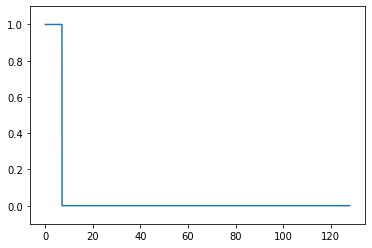

In [ ]:

dt = 1/256    
fs=256                  # Define the sampling interval
N = len(x)
f_posbas = np.arange(0, fs / 2, step=fs / N)
H_posbas = 1. * (f_posbas <= 7)
plt.plot(f_posbas, H_posbas)
plt.ylim(-.1, 1.1)

(-0.1, 1.1)

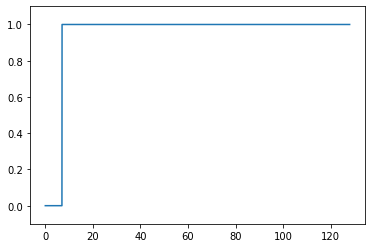

In [ ]:

dt = 1/256    
fs=256                  # Define the sampling interval
N = len(x)
f_posalt = np.arange(0, fs / 2, step=fs / N)
H_posalt = 1. * (f_posalt > 7)
plt.plot(f_posalt, H_posalt)
plt.ylim(-.1, 1.1)

(-0.1, 1.1)

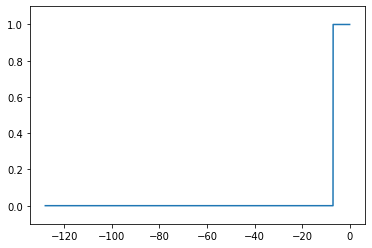

In [ ]:
f_negbas = np.arange(-fs / 2, 0, step=fs / N)
H_negbas = 1. * (f_negbas >= -7)
plt.plot(f_negbas, H_negbas)
plt.ylim(-.1, 1.1)

(-0.1, 1.1)

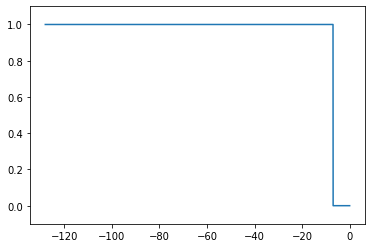

In [ ]:
f_negalt = np.arange(-fs / 2, 0, step=fs / N)
H_negalt = 1. * (f_negalt <-7)
plt.plot(f_negalt, H_negalt)
plt.ylim(-.1, 1.1)

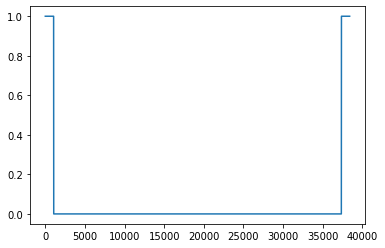

In [ ]:
Hbas = np.concatenate([H_posbas, H_negbas])
plt.plot(Hbas)

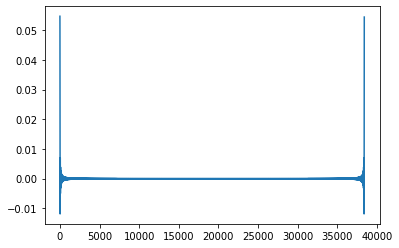

In [ ]:
hbas = np.real(np.fft.ifft(Hbas)) # The IFFT should automatically be real-valued. We take np.real just to be safe.
plt.plot(hbas)

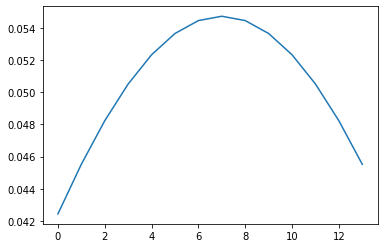

In [ ]:
hbas_trunc = np.concatenate([hbas[-7:], hbas[:7]])
plt.plot(hbas_trunc)

In [ ]:
y = np.convolve(x, hbas_trunc)

# y has an odd number of samples, so we lop off the last one.
y = y[:-1]

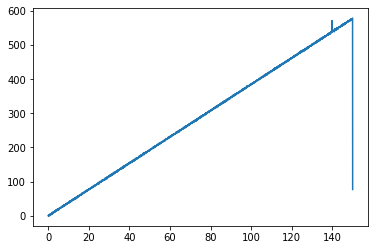

In [ ]:
N = len(y)
t = np.arange(0, N / fs, step=1 / fs)
plt.plot(t, y)


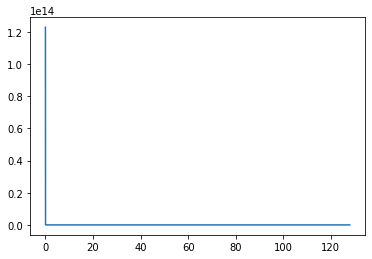

In [ ]:
f_pos = np.arange(0, fs / 2, step=fs / N)
Y = np.fft.fft(y)
Y_pow = np.abs(Y) ** 2

plt.plot(f_pos, Y_pow[:(N // 2)+1])

In [ ]:
elettrodo1ADtot

In [ ]:
np.mean(totmatriceAD[:,2])

4.224076595744682

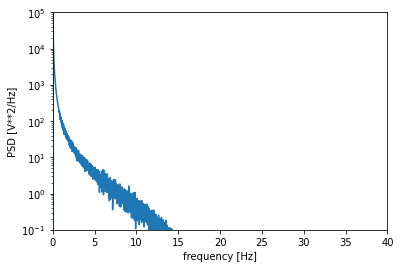

In [ ]:
f, Pxx_den = signal.periodogram(y,256)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-1, 1e5])
plt.xlim(0,40)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
potmedia=np.mean(Pxx_den)

In [ ]:
potmedia

216.9532894342012

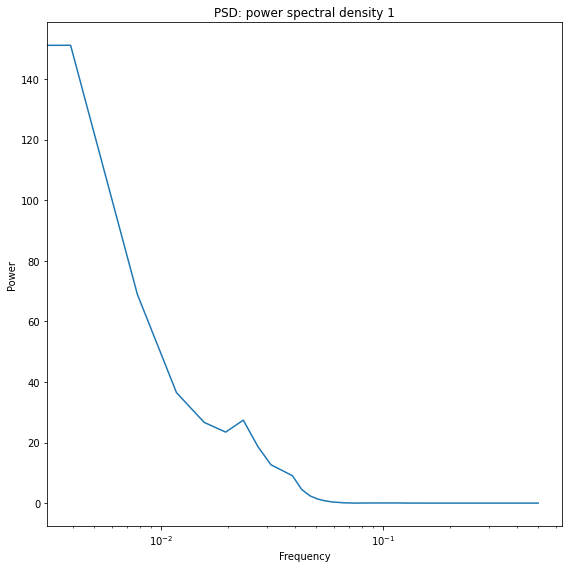

In [ ]:
freqs, psd = signal.welch(y)

#print(freqs, psd)

plt.figure(figsize=(8, 8))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

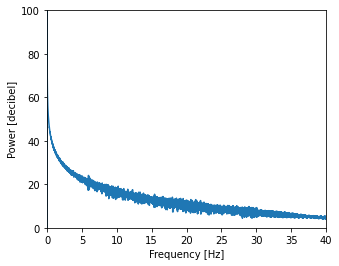

In [ ]:
x = mediaADtot                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(5, 4))
plt.plot(faxis, 10 * log10(Sxx.real) )                # Plot spectrum vs frequency
plt.ylim([0, 100])
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [decibel]')
plt.show()

In [ ]:
len(Sxx)

364810

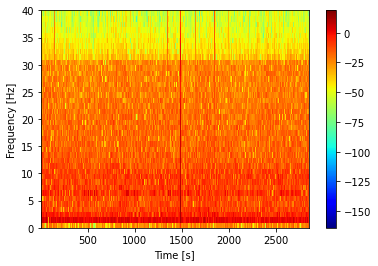

In [ ]:

EEG=mediaADtot
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = signal.spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

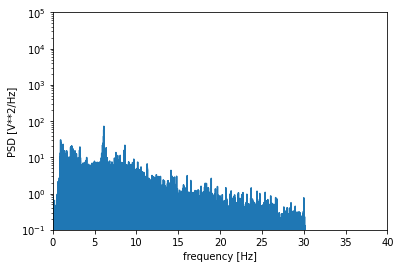

In [ ]:
f, Pxx_den = signal.periodogram(mediaMCItot,256)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-1, 1e5])
plt.xlim(0,40)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

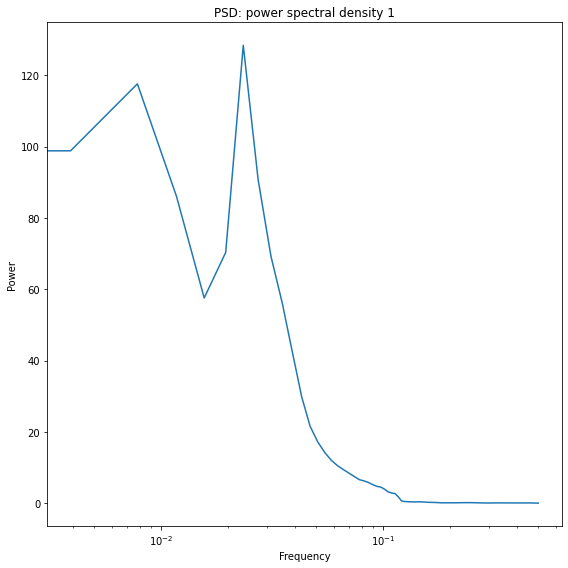

In [ ]:
freqs, psd = signal.welch(mediaMCItot)

#print(freqs, psd)

plt.figure(figsize=(8, 8))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

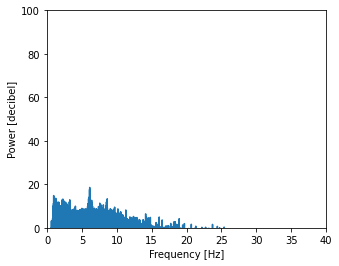

In [ ]:
x = mediaMCItot                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(5, 4))
plt.plot(faxis, 10 * log10(Sxx.real) )                # Plot spectrum vs frequency
plt.ylim([0, 100])
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [decibel]')
plt.show()

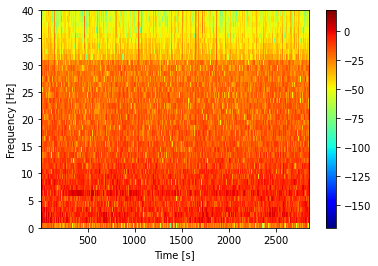

In [ ]:

EEG=mediaMCItot
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = signal.spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

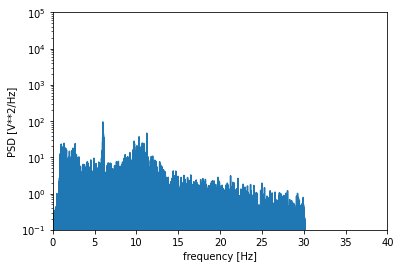

In [ ]:
f, Pxx_den = signal.periodogram(mediaHCtot,256)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-1, 1e5])
plt.xlim(0,40)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

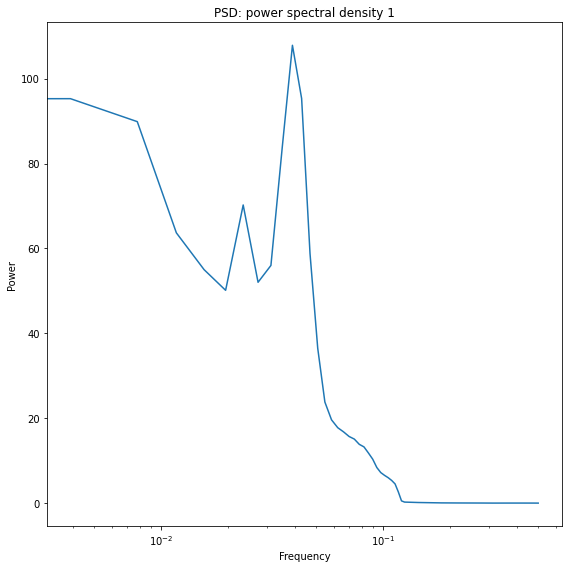

In [ ]:
freqs, psd = signal.welch(mediaHCtot)

#print(freqs, psd)

plt.figure(figsize=(8, 8))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density 1')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

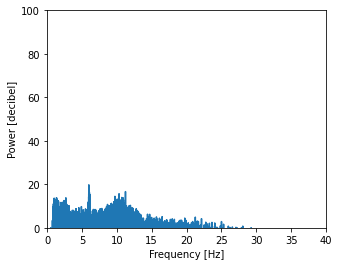

In [ ]:
x = mediaHCtot                               # Relabel the data variable
dt = 1/256                      # Define the sampling interval
N = len(x)                         # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int((len(x) / 2)+1)]           # Ignore negative frequencies

df = 1 / T                       # Determine frequency resolution
fNQ = 1 / dt / 2                     # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis
plt.figure(figsize=(5, 4))
plt.plot(faxis, 10 * log10(Sxx.real) )                # Plot spectrum vs frequency
plt.ylim([0, 100])
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [decibel]')
plt.show()

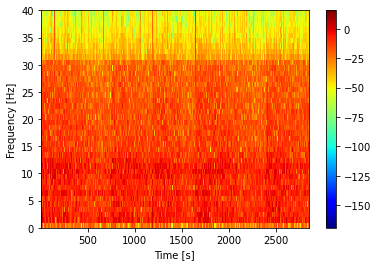

In [ ]:

EEG=mediaHCtot
dt = 1/256
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = signal.spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
ylim([0, 40])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')

show()

# ML

In [ ]:
pmAD=pd.read_csv("/content/drive/MyDrive/Dati EEG/mean_PxxAD_2.txt", sep=",",header=None)
pmMCI=pd.read_csv("/content/drive/MyDrive/Dati EEG/mean_PxxMCI_2.txt", sep=",",header=None)
pmHC=pd.read_csv("/content/drive/MyDrive/Dati EEG/mean_PxxHC_2.txt", sep=",",header=None)

In [ ]:
pmAD,pmHC

(             0              1   ...            17           18
 0  27187.048768  228267.599744  ...  25583.927534  6262.366897
 
 [1 rows x 19 columns],
             0           1           2   ...           16          17          18
 0  1325.616869  903.384104  553.514419  ...  2720.572696  395.833474  307.821774
 
 [1 rows x 19 columns])

In [ ]:

y1=pmAD.iloc[0,:].to_numpy()
y2=pmMCI.iloc[0,:].to_numpy()
y3=pmHC.iloc[0,:].to_numpy()



19

In [ ]:
x1 = np.linspace(0, 30, len(y1), endpoint=True)
x2 = np.linspace(0, 30,len(y2), endpoint=False)
x3 = np.linspace(0, 30,len(y3), endpoint=False)

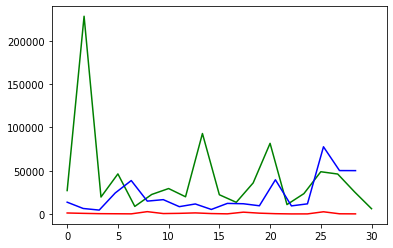

In [ ]:
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'b')
plt.plot(x3, y3, 'r')

plt.show()

In [ ]:
x = mediaMCItot                               # Relabel the data variable
dt = 1/256    
fs=256                  # Define the sampling interval
N = len(x)

(-0.1, 1.1)

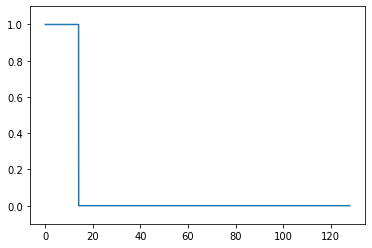

In [ ]:
f_pos = np.arange(0, fs / 2, step=fs / N)
H_pos = 1. * (f_pos <= 7)
plt.plot(f_pos, H_pos)
plt.ylim(-.1, 1.1)

(-0.1, 1.1)

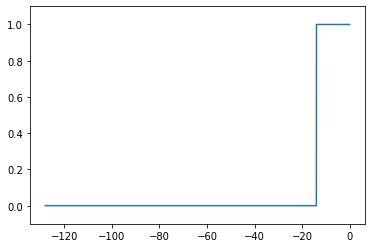

In [ ]:
f_neg = np.arange(-fs / 2, 0, step=fs / N)
H_neg = 1. * (f_neg >= -7)
plt.plot(f_neg, H_neg)
plt.ylim(-.1, 1.1)

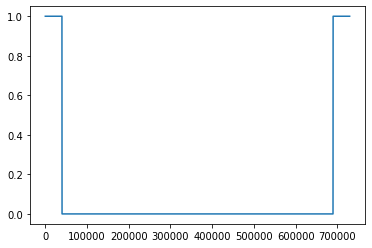

In [ ]:
H = np.concatenate([H_pos, H_neg])
plt.plot(H)

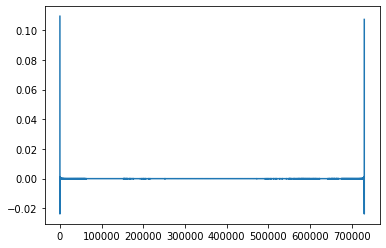

In [ ]:
h = np.real(np.fft.ifft(H)) # The IFFT should automatically be real-valued. We take np.real just to be safe.
plt.plot(h)

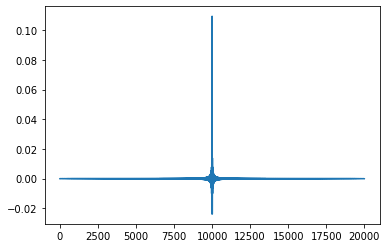

In [ ]:
h_trunc = np.concatenate([h[-10000:], h[:10000]])
plt.plot(h_trunc)

In [ ]:
y = np.convolve(x, h_trunc)

# y has an odd number of samples, so we lop off the last one.
y = y[:-1]

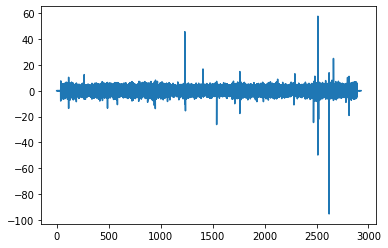

In [ ]:
N = len(y)
t = np.arange(0, N / fs, step=1 / fs)
plt.plot(t, y)


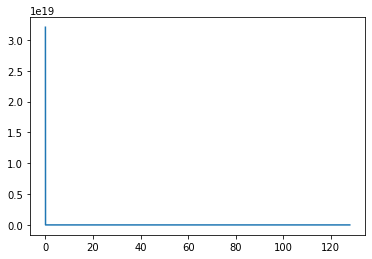

In [ ]:
f_pos = np.arange(0, fs / 2, step=fs / N)
Y = np.fft.fft(y)
Y_pow = np.abs(Y) ** 2

plt.plot(f_pos, Y_pow[:(N // 2)+1])

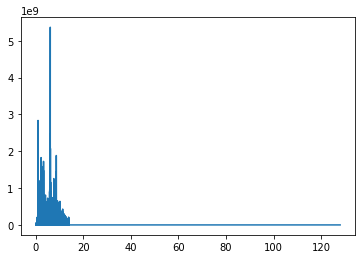

In [ ]:
f_pos = np.arange(0, fs / 2, step=fs / N)
Y = np.fft.fft(y)
Y_pow = np.abs(Y) ** 2

plt.plot(f_pos, Y_pow[:(N // 2)+1])

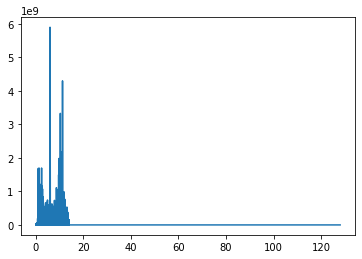

In [ ]:
f_pos = np.arange(0, fs / 2, step=fs / N)
Y = np.fft.fft(y)
Y_pow = np.abs(Y) ** 2

plt.plot(f_pos, Y_pow[:(N // 2)+1])

# Prove con filtro FIR

In [ ]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show


#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------
x=
sample_rate = 256.0
nsamples = len(x)
#t = arange(nsamples) / sample_rate
#x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
#        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
#            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 7.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
(0.0, 0.0025)
grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()


# Prove1 filtro Fir

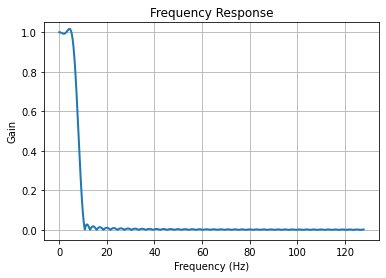

In [ ]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz, firwin2
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show

# Nyquist rate.
nyq_rate = 256 / 2
# Width of the roll-off region.
width = 5 / nyq_rate
# Attenuation in the stop band.
ripple_db = 31.0
num_of_taps, beta = kaiserord(ripple_db, width)
# Cut-off frequency.
cutoff_hz = 8.0
# Estimate the filter coefficients.
if num_of_taps % 2 == 0:
    num_of_taps = num_of_taps + 1
taps = firwin(num_of_taps, cutoff_hz/nyq_rate, window=('kaiser', beta), pass_zero='lowpass')
w, h = freqz(taps, worN=1024)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)
show()

Osservando la risposta in frequenza non ottengo l'attenuazione della banda di arresto come previsto. Voglio un'attenuazione di 12 dB e non la ottengo. Che cosa sto facendo di sbagliato?

Cambia l' pass_zeroargomento di firwinin False. Questo argomento deve essere un booleano (cioè Vero o Falso). Impostandolo su False, si seleziona il comportamento del filtro in modo che sia un filtro passa-alto (cioè il filtro non supera la frequenza 0 del segnale).

Ecco una variazione del tuo copione. Ho aggiunto linee tratteggiate orizzontali che mostrano l'attenuazione desiderata nella banda di arresto (ciano) e i limiti di ondulazione desiderati nella banda passante (rosso) come determinato dalla tua scelta di ripple_db. Traccio anche delle linee tratteggiate verticali (verdi) per indicare la regione di transizione dalla banda di arresto alla banda passante.


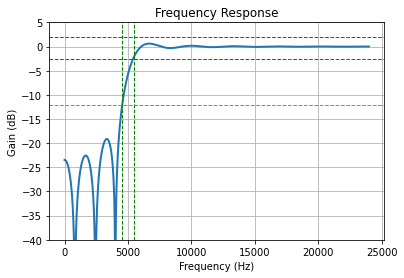

In [ ]:
import numpy as np
from scipy.signal import kaiserord, lfilter, firwin, freqz, firwin2
import matplotlib.pyplot as plt

# Nyquist rate.
nyq_rate = 48000 / 2

# Width of the roll-off region.
width = 500 / nyq_rate

# Attenuation in the stop band.
ripple_db = 12.0

num_of_taps, beta = kaiserord(ripple_db, width)
if num_of_taps % 2 == 0:
    num_of_taps = num_of_taps + 1

# Cut-off frequency.
cutoff_hz = 5000.0

# Estimate the filter coefficients.
taps = firwin(num_of_taps, cutoff_hz/nyq_rate, window=('kaiser', beta), pass_zero=False)

w, h = freqz(taps, worN=4000)

plt.plot((w/np.pi)*nyq_rate, 20*np.log10(np.abs(h)), linewidth=2)

plt.axvline(cutoff_hz + width*nyq_rate, linestyle='--', linewidth=1, color='g')
plt.axvline(cutoff_hz - width*nyq_rate, linestyle='--', linewidth=1, color='g')
plt.axhline(-ripple_db, linestyle='--', linewidth=1, color='c')
delta = 10**(-ripple_db/20)
plt.axhline(20*np.log10(1 + delta), linestyle='--', linewidth=1, color='r')
plt.axhline(20*np.log10(1 - delta), linestyle='--', linewidth=1, color='r')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Frequency Response')
plt.ylim(-40, 5)
plt.grid(True)
plt.show()

Ecco la trama che genera. Se guardi da vicino, vedrai che la risposta in frequenza è vicina agli angoli della regione che definisce il comportamento desiderato del filtro.

Ecco la trama quando ripple_dbviene modificata in 21:

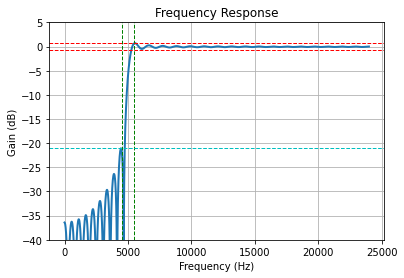

In [ ]:
# Nyquist rate.
nyq_rate = 48000 / 2

# Width of the roll-off region.
width = 500 / nyq_rate

# Attenuation in the stop band.
ripple_db = 21.0

num_of_taps, beta = kaiserord(ripple_db, width)
if num_of_taps % 2 == 0:
    num_of_taps = num_of_taps + 1

# Cut-off frequency.
cutoff_hz = 5000.0

# Estimate the filter coefficients.
taps = firwin(num_of_taps, cutoff_hz/nyq_rate, window=('kaiser', beta), pass_zero=False)

w, h = freqz(taps, worN=4000)

plt.plot((w/np.pi)*nyq_rate, 20*np.log10(np.abs(h)), linewidth=2)

plt.axvline(cutoff_hz + width*nyq_rate, linestyle='--', linewidth=1, color='g')
plt.axvline(cutoff_hz - width*nyq_rate, linestyle='--', linewidth=1, color='g')
plt.axhline(-ripple_db, linestyle='--', linewidth=1, color='c')
delta = 10**(-ripple_db/20)
plt.axhline(20*np.log10(1 + delta), linestyle='--', linewidth=1, color='r')
plt.axhline(20*np.log10(1 - delta), linestyle='--', linewidth=1, color='r')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Frequency Response')
plt.ylim(-40, 5)
plt.grid(True)
plt.show()

# prove con diverse frequenza di taglio

In [ ]:
hz1=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_1_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz2=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_2_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz3=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_3_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz4=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_4_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz5=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_5_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz6=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_6_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz8=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_8_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz9=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_9_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz10=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_10_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz11=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_11_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz12=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_12_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz13=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_13_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz14=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_14_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz15=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_15_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz16=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_16_Avg_PxxAdMciHc_2.txt",sep="|",header=None)




## prova 1HZ 

In [ ]:

y1=hz1.iloc[:,0].to_numpy()
y2=hz1.iloc[:,1].to_numpy()
y3=hz1.iloc[:,2].to_numpy()



In [ ]:
x1 = np.linspace(0, 30, len(y1), endpoint=True)
x2 = np.linspace(0, 30,len(y2), endpoint=False)
x3 = np.linspace(0, 30,len(y3), endpoint=False)

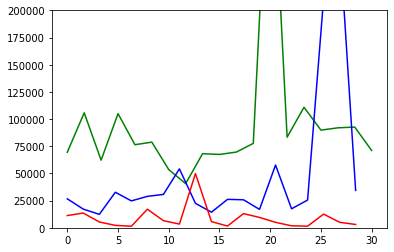

In [ ]:
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'b')
plt.plot(x3, y3, 'r')
plt.ylim(0,200000)
plt.show()